# Status + LTD

In this file, I combine best results for WikiElections and Slashdot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import matplotlib
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

# import matplotlib.pyplot as plt

# pgf_with_latex = {
#     "text.usetex": True,            # use LaTeX to write all text
#     "pgf.rcfonts": False,           # Ignore Matplotlibrc
#     "pgf.preamble": [
#         '\\usepackage{color}'     # xcolor for colours
#     ]
# }
# matplotlib.rcParams.update(pgf_with_latex)

from analyze_simulations_funs import *

In [2]:

outputs_wiki_rhoinits_2000 = Path("../../outputs/LtdReal/outputs/wiki2-rhoinits-triads-s2000")
outputs_slash_rhoinits = Path("../../outputs/LtdReal/outputs/slash-rhoinits-triads")

outputs_epi_rhoinits = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads")

outputs_dir = Path("../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed")
outputs_dir_single = Path("../../outputs/LtdReal/outputs/spanish-highschools-controldown-processed")
# outputs_dir_classes = Path("../../outputs/LtdReal/outputs/spanish-highschools-classes")
# outputs_dir_single = Path("../../outputs/LtdReal/outputs/bitcoin-alpha-rhoinits-triads/")

specific_schools = ["t11_10", "t11_9", "t11_8", "t11_7", "t11_6", "t11_5", "t11_4", "t11_3", "t11_2", "t11_1", "t1", "t2", "t6"]

# Read real data

In [3]:
meandata_path = Path('../../../triad-statistics/mean_data.h5')
mean_data = pd.read_hdf(meandata_path)
stddata_path = Path('../../../triad-statistics/std_data.h5')
std_data = pd.read_hdf(stddata_path)

realnet_path = Path('../../../triad-statistics/results_realnet2.h5')
results_realnet = pd.read_hdf(realnet_path)
results_realnet

realnet2_path = Path('../../../triad-statistics/results_realnet_spanish.h5')
realnet2_class_path = Path('../../../triad-statistics/results_realnet_spanish_class.h5')

results_realnet2 = pd.read_hdf(realnet2_path, key = 'results_realnet2')
results_realnet2

results_realnet_class = pd.read_hdf(realnet2_class_path, key = 'results_realnet2')
results_realnet_class

# wikielections
# results_realnet

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
school_class,,,,,,,,,,,,,,,,,,,,
t11_10_1,0.017712,0.073244,0.016983,0.065222,0.039071,0.056574,0.100438,0.630756,9598.0,1169.0,1486.0,0.786676,170.0,703.0,163.0,626.0,375.0,543.0,964.0,6054.0
t11_10_2,0.074722,0.193853,0.035317,0.054420,0.075708,0.071620,0.093684,0.400677,14186.0,1134.0,1760.0,0.644318,1060.0,2750.0,501.0,772.0,1074.0,1016.0,1329.0,5684.0
t11_10_3,0.105604,0.256378,0.041092,0.052175,0.062526,0.050293,0.056880,0.375052,9564.0,927.0,1545.0,0.600000,1010.0,2452.0,393.0,499.0,598.0,481.0,544.0,3587.0
t11_10_4,0.055911,0.153856,0.026955,0.036563,0.081532,0.034294,0.058714,0.552175,7494.0,886.0,1325.0,0.668679,419.0,1153.0,202.0,274.0,611.0,257.0,440.0,4138.0
t11_9_1,0.010484,0.037934,0.014678,0.047846,0.024400,0.060999,0.074914,0.728746,5246.0,689.0,838.0,0.822196,55.0,199.0,77.0,251.0,128.0,320.0,393.0,3823.0
t11_9_2,0.029462,0.084423,0.030255,0.062360,0.035408,0.054565,0.091822,0.611706,7569.0,989.0,1309.0,0.755539,223.0,639.0,229.0,472.0,268.0,413.0,695.0,4630.0
t11_9_3,0.065827,0.201575,0.013228,0.052283,0.043465,0.040945,0.070236,0.512441,3175.0,544.0,782.0,0.695652,209.0,640.0,42.0,166.0,138.0,130.0,223.0,1627.0
t11_9_4,0.004717,0.029717,0.004009,0.036557,0.018868,0.026651,0.037500,0.841981,4240.0,817.0,934.0,0.874732,20.0,126.0,17.0,155.0,80.0,113.0,159.0,3570.0
t11_8_1,0.003891,0.026265,0.005512,0.036641,0.011997,0.040856,0.088197,0.786641,3084.0,500.0,568.0,0.880282,12.0,81.0,17.0,113.0,37.0,126.0,272.0,2426.0


In [4]:
real_datasets = [pd.DataFrame(results_realnet2.loc[school]).transpose() for school in specific_schools]
real_datasets_cl = [pd.DataFrame(results_realnet_class.loc[school]).transpose() for school in results_realnet_class.index]

In [5]:
# real_datasets_cl.loc["t11_2_4"]
inds = np.where(results_realnet_class.index == "t11_2_4")[0][0]
real_datasets_cl[inds]

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
t11_2_4,0.027319,0.116104,0.01267,0.049094,0.030585,0.035039,0.048204,0.680986,10103.0,1314.0,1736.0,0.756912,276.0,1173.0,128.0,496.0,309.0,354.0,487.0,6880.0


In [6]:
results_realnet['wiki elections']

tr0            0.012461
tr1            0.027505
tr2            0.010724
tr3            0.072158
tr4            0.049625
tr5            0.065085
tr6            0.077725
tr7            0.684716
T         745129.000000
L_plus     75446.000000
L          94933.000000
rho            0.794729
Tr0         9285.000000
Tr1        20495.000000
Tr2         7991.000000
Tr3        53767.000000
Tr4        36977.000000
Tr5        48497.000000
Tr6        57915.000000
Tr7       510202.000000
Name: wiki elections, dtype: float64

In [7]:
pd.DataFrame(results_realnet['wiki elections']).transpose()

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
wiki elections,0.012461,0.027505,0.010724,0.072158,0.049625,0.065085,0.077725,0.684716,745129.0,75446.0,94933.0,0.794729,9285.0,20495.0,7991.0,53767.0,36977.0,48497.0,57915.0,510202.0


In [8]:
# wiki = pd.DataFrame()

# d = {}

# for i in range(8):
#     lab = "tr" + str(i)
#     d[lab] = results_realnet.loc[lab]['wiki elections']
#     # print(results_realnet.loc[lab].epinions)

# wiki = wiki.append(d, ignore_index=True)
# # epinions.rho = 0.794
# wiki = wiki.assign(rho=0.7947289140762432)
# wiki
wiki = pd.DataFrame(results_realnet['wiki elections']).transpose()
wiki

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
wiki elections,0.012461,0.027505,0.010724,0.072158,0.049625,0.065085,0.077725,0.684716,745129.0,75446.0,94933.0,0.794729,9285.0,20495.0,7991.0,53767.0,36977.0,48497.0,57915.0,510202.0


In [9]:
epinions = pd.DataFrame(results_realnet['epinions']).transpose()
epinions

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
epinions,0.007489,0.02701,0.004779,0.018902,0.02477,0.011846,0.029978,0.875227,10961993.0,583088.0,667110.0,0.874051,82094.0,296078.0,52385.0,207201.0,271534.0,129852.0,328616.0,9594233.0


In [10]:
slash = pd.DataFrame(results_realnet['slashdot']).transpose()
slash

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
slashdot,0.012361,0.051867,0.014518,0.024771,0.020277,0.020386,0.029772,0.826048,1251925.0,221397.0,285003.0,0.776823,15475.0,64934.0,18176.0,31011.0,25385.0,25522.0,37272.0,1034150.0


# Error functions

That are used in finding parameters closest to real network stats. 

In [11]:

n2_triads = ["tr1", "tr2", "tr4"]
n1_triads = ["tr3", "tr5", "tr6"]
deg_triads = [*n1_triads, *n2_triads]
all_triads = ["tr" + str(i) for i in range(8)]

# def normalize(data):
#     triads = ["tr" + str(i) for i in range(8)]
#     if data.shape[0] > 1:
#         if data.shape[1] > 1:
#             return data[triads].values.transpose() / np.sum(data[triads], axis=1).values
#     return ValueError("Not implemented")

def transform_data(data, triads = None, triads_groups = None):
    if triads_groups is None:
        T = len(triads)
        if data.shape[0] > 1:
            if data.shape[1] > 1:
                return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T
            else:
                return data[triads] / np.sum(data[triads]) - 1/T
        else:
            return data[triads] / np.sum(data[triads], axis=1).values[0] - 1/T
    else:
        if type(data) == pd.DataFrame:
            df = data.copy(deep=True)
            for triads in triads_groups:
                nn = transform_data(data, triads)
                
                if np.where(np.array(nn.shape) == 3)[0][0] == 0:
                    nn = nn.transpose()

                new_df = pd.DataFrame(nn, index = data.index, columns=triads)
                df.update(new_df)
            df = df.drop(columns=['tr0', 'tr7'])
            return df
        else:
            ValueError("Not implemented")

def closest_to_six_triads(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[deg_triads].transpose() - original_data[deg_triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[deg_triads].subtract(original_data[deg_triads].values)**2).sum(axis=1, min_count=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (original_data[triad] - model_data[triad])**2
    return err

def closest_to_six_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_six_triads(original_data, model_data)
    
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_six_triads(original_data_trans, model_data_trans)
    
    # model    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    # p1_m = pd.DataFrame(p1_m.transpose(), columns = n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    # p2_m = pd.DataFrame(p2_m.transpose(), columns = n1_triads)
    
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = np.sum((original_data[triads] - model_data[triads])**2, axis = 1).values[0]
    return err

def closest_to_four_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_four_triads(original_data, model_data)
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_four_triads(original_data_trans, model_data_trans)
    
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err

def closest_to_high_underrepresentation(original_data, model_data):
    triads = ["tr2"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    err += (original_data["tr2"] - model_data["tr2"])**2
    return err

def closest_to_high_underrepresentation_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_high_underrepresentation(original_data, model_data)
    
    # p1_r = transform_data(original_data, n1_triads)
    # p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    if any(np.isnan(p2_r[["tr2"]])):
        return np.nan
    
    err = 0
    err += np.sum((p2_r["tr2"] - p2_m["tr2"])**2)
    return err

def closest_to_rho(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == pd.DataFrame:
            err = model_data["rho"].subtract(original_data["rho"].values[0])**2
            return err
    
    err = 0
    err += (original_data["rho"] - model_data["rho"])**2
    return err

"""New error functions"""

"""Assuming we must have proper sign of deviations. """

def closest_to_six_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[deg_triads] * (original_data[deg_triads].values)  > 0, axis = 1) != 6
        return err
    
    raise ValueError("Not implemented")

    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        triads = ["tr1", "tr2", "tr5", "tr6"]
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[triads] * (original_data[triads].values)  > 0, axis = 1) != 4
        return err
    
    raise ValueError("Not implemented")
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err


"""Combination of triad densities and rho"""

def closest_to_six_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_six_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_six_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_six_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_four_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_four_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_six_triads_relative(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(ap.abs((model_data[deg_triads].transpose() - original_data[deg_triads].values)/ original_data[deg_triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_four_triads_relative(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]

    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(np.abs((model_data[triads].transpose() - original_data[triads].values)/ original_data[triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[triads].subtract(original_data[triads].values) / original_data[triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    for triad in triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
                   closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]
error_functions.extend([closest_to_six_triads_corrdevs_transformed, closest_to_four_triads_corrdevs_transformed, 
                        closest_to_six_triads_rho, closest_to_six_triads_rho_transformed, closest_to_four_triads_rho, closest_to_four_triads_rho_transformed,
                        closest_to_six_triads_relative, closest_to_four_triads_relative])

# error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
#                    closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]

In [12]:
wiki_trans = transform_data(wiki, triads_groups=(n1_triads, n2_triads))

slash_trans = transform_data(slash, triads_groups=(n1_triads, n2_triads))

epinions_trans = transform_data(epinions, triads_groups=(n1_triads, n2_triads))

real_datasets_trans = [transform_data(real_data, triads_groups=(n1_triads, n2_triads)) for real_data in real_datasets]
real_datasets_cl_trans = [transform_data(real_data, triads_groups=(n1_triads, n2_triads)) for real_data in real_datasets_cl]


In [13]:
real_datasets_trans = [transform_data(real_data, triads_groups=(n1_triads, n2_triads)) for real_data in real_datasets]
real_datasets_cl_trans = [transform_data(real_data, triads_groups=(n1_triads, n2_triads)) for real_data in real_datasets_cl]

real_datasets_cl_trans[inds] + 1/3

,tr1,tr2,tr3,tr4,tr5,tr6,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
t11_2_4,0.728571,0.079503,0.37098,0.191925,0.264772,0.364248,10103.333333,1314.333333,1736.333333,1.090246,276.333333,1173.333333,128.333333,496.333333,309.333333,354.333333,487.333333,6880.333333


# Finding simulations closest to real-world data results

In [14]:
n1_triads = ['tr3', 'tr5', 'tr6']
n1_nohierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


## Finding quasi-stationary level

In [15]:
try:
    path = Path("../../outputs/LtdReal/outputs/wiki2-rhoinits-triads-s2000/qs_levels2.h5")
    df2_wrho = pd.read_hdf(path)
except FileNotFoundError:
    print("FileNotFoundError")
    df2_wrho = get_quasilevels(df_wrho)
print(len(df2_wrho))
df2_wrho.head(5)
    

FileNotFoundError


NameError: name 'df_wrho' is not defined

In [ ]:
try:
    path = Path("../../outputs/LtdReal/outputs/slash-rhoinits-triads/qs_levels_all.h5")
    df2_srho = pd.read_hdf(path, key = 'df2_srho')
    
    # df2_srho.drop(columns = ["index"], inplace = True)
except FileNotFoundError:
    print("FileNotFoundError")
    df2_srho = get_quasilevels(df_srho)
print(len(df2_srho))
df2_srho.head(5)
    

3498


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0,0.4,0.0,1.0,0.9,1000,"[0, 10]","[0.8993589541162724, 0.649996666701754]","[0.000995267288375901, 0.05026099806298301]","[0.009059648141861533, 0.10598078958404057]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.8,0.4,0.7,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.8994642161661456, 0.8834433321754508, 0.872...","[0.0011094913832697647, 0.002274097889250554, ...","[0.00925534676598039, 0.01586836272140903, 0.0...",...,0.079795,0.002516,0.700983,0.006500,0.700983,0.006500,0.700087,0.007330,0.700565,0.007527
2,1,0.8,0.4,0.7,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.7998687733111581, 0.7903109791826752, 0.786...","[0.008208159434470915, 0.008706591848553227, 0...","[0.03239331429598418, 0.03977474688978972, 0.0...",...,0.080645,0.002111,0.693733,0.007021,0.693733,0.007021,0.693626,0.006993,0.693626,0.006993
3,2,0.8,0.4,0.7,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.5993550945077771, 0.6448388262579692, 0.659...","[0.06339836651556603, 0.040308325179223996, 0....","[0.0958819418096132, 0.08624078918465564, 0.07...",...,0.090752,0.001390,0.656759,0.005482,0.656759,0.005482,0.655151,0.005047,0.654833,0.004582
4,3,0.8,0.4,0.7,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3994168482437027, 0.5233418595593731, 0.561...","[0.21631727140204085, 0.1093452083790962, 0.07...","[0.14216107194919825, 0.12586936118377698, 0.1...",...,0.096865,0.002086,0.633604,0.007446,0.633604,0.007446,0.633068,0.008283,0.632899,0.007888


In [16]:
try:
    path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads/qs_levels_all.h5")
    df2_erho = pd.read_hdf(path, key = "df2_erho")
    
    # df2_erho.drop(columns = ["index"], inplace = True)
    
except FileNotFoundError:
    print("FileNotFoundError")
    df2_erho = get_quasilevels(df_erho)
    save_df2 = True
print(len(df2_erho))
df2_erho.head(5)
    

# try:
#     path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000/qs_levels2.h5")
#     df2_erho_s2000 = pd.read_hdf(path, key = "df2_erho")
#     # save_df2_s2000 = False
# except FileNotFoundError:
#     print("FileNotFoundError")
#     df2_erho_s2000 = get_quasilevels(df_erho_s2000)
#     # save_df2_s2000 = True
    
#     df2_erho_s2000.reset_index(drop = True, inplace = True)
    
#     path = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000/qs_levels2.h5")
#     df2_erho_s2000.to_hdf(path, key = 'df2_erho', mode ="w")
# print(len(df2_erho_s2000))
# # df2_erho_s2000.head(5)

# df2_erho = pd.concat([df2_erho, df2_erho_s2000])
# df2_erho.reset_index(drop = True, inplace = True)

    

3872


,index,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0,0.1,0.8,0.0,0.9,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.9003642577685839, 0.910299650732263, 0.9173...","[0.0010117685716456851, 0.0009675247922526496,...","[0.009039414639290502, 0.008582654632237039, 0...",...,0.010159,0.000726,0.966237,0.002870,0.966237,0.002870,0.967011,0.001865,0.966823,0.002122
1,1,0.1,0.8,0.0,0.8,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.799317953560882, 0.8260466789584926, 0.8410...","[0.008099804478984798, 0.006178347313303338, 0...","[0.032280717566595785, 0.027615781181396484, 0...",...,0.019410,0.000653,0.935877,0.002873,0.935877,0.002873,0.935557,0.002917,0.937623,0.001909
2,2,0.1,0.8,0.0,0.6,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.600610094287299, 0.6918694068444484, 0.7276...","[0.06386931646462464, 0.035355888295130276, 0....","[0.09626972029630014, 0.07338163780983988, 0.0...",...,0.038759,0.001558,0.878210,0.006188,0.878210,0.006188,0.882157,0.004693,0.873513,0.004917
3,3,0.1,0.8,0.0,0.4,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.3997736505224026, 0.5924765031254215, 0.650...","[0.21809738429863987, 0.08556847281329226, 0.0...","[0.1441482401968328, 0.11075914753822594, 0.08...",...,0.051973,0.001712,0.835402,0.009781,0.835402,0.009781,0.852274,0.001992,0.826806,0.005853
4,4,0.1,0.8,0.0,0.2,1000,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.1995982671523437, 0.5168068234623975, 0.590...","[0.5135383684335504, 0.1380434196591806, 0.077...","[0.12823480182846314, 0.13290010311081205, 0.1...",...,0.059118,0.001070,0.799251,0.003219,0.799251,0.003219,0.799785,0.003156,0.799785,0.003156


In [17]:
chosen_cols = ['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs2_m', 'rho_qs2_s',
       'rho_qs2_b', 'rho_qs2_f']

df2_wrho[['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs3_m', 'rho_qs3_s',
       'rho_qs3_b', 'rho_qs3_f']]

NameError: name 'df2_wrho' is not defined

In [22]:
df2_wrho.reset_index(inplace=True, drop=True)
# df2_wrho.drop(columns=["index"], inplace=True)
df2_srho.reset_index(inplace=True, drop=True)
df2_srho.drop(columns="index", inplace=True)
df2_erho.reset_index(inplace=True, drop=True)
df2_erho.drop(columns="index", inplace=True)

len(df2_wrho.index.values), len(np.unique(df2_wrho.index.values)), len(df2_srho.index.values), len(np.unique(df2_srho.index.values)), len(df2_erho.index.values), len(np.unique(df2_erho.index.values))

(14278, 14278, 3498, 3498, 3460, 3460)

In [23]:
for ind, row in df2_wrho.iterrows():
    q = round(row.q, 5)
    psbt = round(row.p, 5)
    pst = round(row.ps, 5)
    rho_init = round(row.rho_init, 5)
    
    df2_wrho.at[ind, "q"] = q
    df2_wrho.at[ind, "p"] = psbt
    df2_wrho.at[ind, "ps"] = pst
    df2_wrho.at[ind, "rho_init"] = rho_init


In [24]:
for ind, row in df2_srho.iterrows():
    q = round(row.q, 5)
    psbt = round(row.p, 5)
    pst = round(row.ps, 5)
    rho_init = round(row.rho_init, 5)
    
    df2_srho.at[ind, "q"] = q
    df2_srho.at[ind, "p"] = psbt
    df2_srho.at[ind, "ps"] = pst
    df2_srho.at[ind, "rho_init"] = rho_init


In [25]:
for ind, row in df2_erho.iterrows():
    q = round(row.q, 5)
    psbt = round(row.p, 5)
    pst = round(row.ps, 5)
    rho_init = round(row.rho_init, 5)
    
    df2_erho.at[ind, "q"] = q
    df2_erho.at[ind, "p"] = psbt
    df2_erho.at[ind, "ps"] = pst
    df2_erho.at[ind, "rho_init"] = rho_init


In [26]:
inds = [row.cur_steps[-1] == row.steps for ind,row in df2_wrho.iterrows()]

df2_wrho_correct = df2_wrho.iloc[inds]
df2_wrho_correct.reset_index(drop = True, inplace = True)

inds = [row.cur_steps[-1] == row.steps for ind,row in df2_srho.iterrows()]

df2_srho_correct = df2_srho.iloc[inds]
df2_srho_correct.reset_index(drop = True, inplace = True)

inds = [row.cur_steps[-1] == row.steps for ind,row in df2_erho.iterrows()]

df2_erho_correct = df2_erho.iloc[inds]
df2_erho_correct.reset_index(drop = True, inplace = True)

In [27]:
df2_wrho_g = group_quasilevels2(df2_wrho, cols = ['q', 'p', 'ps', 'rho_init'])
df2_wrho_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


q    p   ps  rho_init  repetitions   rho_lvl  \
0.75 0.0 0.0 0.9  0.75  0.0  0.0       0.9            5       NaN   
         0.1 0.9  0.75  0.0  0.1       0.9            5       NaN   
         0.2 0.9  0.75  0.0  0.2       0.9            5       NaN   
         0.3 0.9  0.75  0.0  0.3       0.9            5       NaN   
         0.4 0.9  0.75  0.0  0.4       0.9            5       NaN   
...                ...  ...  ...       ...          ...       ...   
0.95 1.0 0.9 0.2  0.95  1.0  0.9       0.2            5       NaN   
             0.9  0.95  1.0  0.9       0.9            5       NaN   
         1.0 0.0  0.95  1.0  1.0       0.0            5  0.887526   
             0.2  0.95  1.0  1.0       0.2            5       NaN   
             0.9  0.95  1.0  1.0       0.9            5       NaN   

                  rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.75 0.0 0.0 0.9          NaN              0     0.000000       NaN  ...   
         0.1 0.9          NaN              0     0.000000       NaN  ...   
         0.2 0.9          NaN              0     0.000000       NaN  ...   
         0.3 0.9          NaN              0     0.000000       NaN  ...   
         0.4 0.9          NaN              0     0.000000       NaN  ...   
...                       ...            ...          ...       ...  ...   
0.95 1.0 0.9 0.2          NaN              0     0.000000       NaN  ...   
             0.9          NaN              0     0.000000       NaN  ...   
         1.0 0.0     0.002594              5     0.002775  0.887526  ...   
             0.2          NaN              0     0.000000       NaN  ...   
             0.9          NaN              0     0.000000       NaN  ...   

                  tr4_sim_std3  tr5_lvl3  tr5_lvl3_std  tr5_sim_std3  \
0.75 0.0 0.0 0.9      0.000000       NaN           NaN      0.000000   
         0.1 0.9      0.000000       NaN           NaN      0.000000   
         0.2 0.9      0.000000       NaN           NaN      0.000000   
         0.3 0.9      0.000000       NaN           NaN      0.000000   
         0.4 0.9      0.000000       NaN           NaN      0.000000   
...                        ...       ...           ...           ...   
0.95 1.0 0.9 0.2      0.000000       NaN           NaN      0.000000   
             0.9      0.000000       NaN           NaN      0.000000   
         1.0 0.0      0.000242  0.005119           0.0      0.001051   
             0.2      0.000000       NaN           NaN      0.000000   
             0.9      0.000000       NaN           NaN      0.000000   

                  tr6_lvl3  tr6_lvl3_std  tr6_sim_std3  tr7_lvl3  \
0.75 0.0 0.0 0.9       NaN           NaN       0.00000       NaN   
         0.1 0.9       NaN           NaN       0.00000       NaN   
         0.2 0.9       NaN           NaN       0.00000       NaN   
         0.3 0.9       NaN           NaN       0.00000       NaN   
         0.4 0.9       NaN           NaN       0.00000       NaN   
...                    ...           ...           ...       ...   
0.95 1.0 0.9 0.2       NaN           NaN       0.00000       NaN   
             0.9       NaN           NaN       0.00000       NaN   
         1.0 0.0  0.026634           0.0       0.00096  0.933671   
             0.2       NaN           NaN       0.00000       NaN   
             0.9       NaN           NaN       0.00000       NaN   

                  tr7_lvl3_std  tr7_sim_std3  
0.75 0.0 0.0 0.9           NaN      0.000000  
         0.1 0.9           NaN      0.000000  
         0.2 0.9           NaN      0.000000  
         0.3 0.9           NaN      0.000000  
         0.4 0.9           NaN      0.000000  
...                        ...           ...  
0.95 1.0 0.9 0.2           NaN      0.000000  
             0.9           NaN      0.000000  
         1.0 0.0           0.0      0.002375  
             0.2           NaN      0.000000  
             0.9           NaN      0.000000  

[2759 rows x 66 columns]

In [28]:
df2_srho_g = group_quasilevels2(df2_srho, cols = ['q', 'p', 'ps', 'rho_init'])
df2_srho_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.5 0.0 0.9  0.0  0.5  0.0       0.9            1  0.650462          0.0   
        0.1 0.9  0.0  0.5  0.1       0.9            1  0.681223          0.0   
        0.2 0.9  0.0  0.5  0.2       0.9            1  0.650232          0.0   
        0.3 0.9  0.0  0.5  0.3       0.9            1  0.681851          0.0   
        0.4 0.9  0.0  0.5  0.4       0.9            1  0.682514          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.9 0.5 0.8  1.0  0.9  0.5       0.8            1  0.798857          0.0   
            0.9  1.0  0.9  0.5       0.9            1  0.901068          0.0   
    1.0 0.5 0.6  1.0  1.0  0.5       0.6            1  0.599947          0.0   
            0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
            0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.0 0.5 0.0 0.9              1     0.000657       NaN  ...      0.000000   
        0.1 0.9              1     0.044160       NaN  ...      0.000000   
        0.2 0.9              1     0.000332       NaN  ...      0.000000   
        0.3 0.9              1     0.045048       NaN  ...      0.000000   
        0.4 0.9              1     0.045986       NaN  ...      0.000000   
...                        ...          ...       ...  ...           ...   
1.0 0.9 0.5 0.8              1     0.001067  0.798857  ...      0.001449   
            0.9              1     0.000403  0.901068  ...      0.000563   
    1.0 0.5 0.6              1     0.000185  0.599947  ...      0.000000   
            0.8              1     0.002285  0.800090  ...      0.003974   
            0.9              1     0.001996  0.898277  ...      0.000298   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.0 0.5 0.0 0.9       NaN           NaN      0.000000       NaN           NaN   
        0.1 0.9       NaN           NaN      0.000000       NaN           NaN   
        0.2 0.9       NaN           NaN      0.000000       NaN           NaN   
        0.3 0.9       NaN           NaN      0.000000       NaN           NaN   
        0.4 0.9       NaN           NaN      0.000000       NaN           NaN   
...                   ...           ...           ...       ...           ...   
1.0 0.9 0.5 0.8  0.034531           0.0      0.009814  0.116625           0.0   
            0.9  0.014385           0.0      0.006127  0.056702           0.0   
    1.0 0.5 0.6       NaN           NaN      0.000000       NaN           NaN   
            0.8  0.033132           0.0      0.019688  0.113932           0.0   
            0.9  0.022951           0.0      0.002217  0.068488           0.0   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.0 0.5 0.0 0.9      0.000000       NaN           NaN      0.000000  
        0.1 0.9      0.000000       NaN           NaN      0.000000  
        0.2 0.9      0.000000       NaN           NaN      0.000000  
        0.3 0.9      0.000000       NaN           NaN      0.000000  
        0.4 0.9      0.000000       NaN           NaN      0.000000  
...                       ...       ...           ...           ...  
1.0 0.9 0.5 0.8      0.008653  0.637120           0.0      0.014258  
            0.9      0.004416  0.839344           0.0      0.013570  
    1.0 0.5 0.6      0.000000       NaN           NaN      0.000000  
            0.8      0.017190  0.645457           0.0      0.036443  
            0.9      0.003326  0.799980           0.0      0.006924  

[3498 rows x 94 columns]

In [29]:
df2_erho_g = group_quasilevels2(df2_erho, cols = ['q', 'p', 'ps', 'rho_init'])
df2_erho_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.0 0.5 0.9  0.0  0.0  0.5       0.9            1       NaN          NaN   
    0.1 0.5 0.9  0.0  0.1  0.5       0.9            1       NaN          NaN   
    0.2 0.5 0.9  0.0  0.2  0.5       0.9            1       NaN          NaN   
    0.3 0.5 0.9  0.0  0.3  0.5       0.9            1       NaN          NaN   
    0.4 0.5 0.9  0.0  0.4  0.5       0.9            1       NaN          NaN   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.2  1.0  0.5  1.0       0.2            1  0.848664          0.0   
            0.4  1.0  0.5  1.0       0.4            1  0.903658          0.0   
            0.6  1.0  0.5  1.0       0.6            1  0.941769          0.0   
            0.8  1.0  0.5  1.0       0.8            1  0.973366          0.0   
            0.9  1.0  0.5  1.0       0.9            1  0.979834          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.0 0.0 0.5 0.9              0     0.000000       NaN  ...           0.0   
    0.1 0.5 0.9              0     0.000000       NaN  ...           0.0   
    0.2 0.5 0.9              0     0.000000       NaN  ...           0.0   
    0.3 0.5 0.9              0     0.000000       NaN  ...           0.0   
    0.4 0.5 0.9              0     0.000000       NaN  ...           0.0   
...                        ...          ...       ...  ...           ...   
1.0 0.5 1.0 0.2              1     0.000049       NaN  ...           0.0   
            0.4              1     0.000023       NaN  ...           0.0   
            0.6              1     0.000020       NaN  ...           0.0   
            0.8              1     0.000008       NaN  ...           0.0   
            0.9              1     0.000235       NaN  ...           0.0   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.0 0.0 0.5 0.9       NaN           NaN           0.0       NaN           NaN   
    0.1 0.5 0.9       NaN           NaN           0.0       NaN           NaN   
    0.2 0.5 0.9       NaN           NaN           0.0       NaN           NaN   
    0.3 0.5 0.9       NaN           NaN           0.0       NaN           NaN   
    0.4 0.5 0.9       NaN           NaN           0.0       NaN           NaN   
...                   ...           ...           ...       ...           ...   
1.0 0.5 1.0 0.2       NaN           NaN           0.0       NaN           NaN   
            0.4       NaN           NaN           0.0       NaN           NaN   
            0.6       NaN           NaN           0.0       NaN           NaN   
            0.8       NaN           NaN           0.0       NaN           NaN   
            0.9       NaN           NaN           0.0       NaN           NaN   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.0 0.0 0.5 0.9           0.0       NaN           NaN           0.0  
    0.1 0.5 0.9           0.0       NaN           NaN           0.0  
    0.2 0.5 0.9           0.0       NaN           NaN           0.0  
    0.3 0.5 0.9           0.0       NaN           NaN           0.0  
    0.4 0.5 0.9           0.0       NaN           NaN           0.0  
...                       ...       ...           ...           ...  
1.0 0.5 1.0 0.2           0.0       NaN           NaN           0.0  
            0.4           0.0       NaN           NaN           0.0  
            0.6           0.0       NaN           NaN           0.0  
            0.8           0.0       NaN           NaN           0.0  
            0.9           0.0       NaN           NaN           0.0  

[3119 rows x 94 columns]

In [30]:
df2_wrho_correct_g = group_quasilevels2(df2_wrho_correct, cols = ['q', 'p', 'ps', 'rho_init'])
df2_wrho_correct_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

In [ ]:
df2_srho_correct_g = group_quasilevels2(df2_srho_correct, cols = ['q', 'p', 'ps', 'rho_init'])
df2_srho_correct_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.6 0.6 0.9  0.1  0.6  0.6       0.9            1  0.658227          0.0   
        0.7 0.9  0.1  0.6  0.7       0.9            1  0.666658          0.0   
        0.8 0.9  0.1  0.6  0.8       0.9            1  0.675579          0.0   
        0.9 0.8  0.1  0.6  0.9       0.8            1  0.660932          0.0   
            0.9  0.1  0.6  0.9       0.9            1  0.683131          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9            1  0.899687          0.0   
    0.9 0.5 0.8  1.0  0.9  0.5       0.8            1  0.798857          0.0   
            0.9  1.0  0.9  0.5       0.9            1  0.901068          0.0   
    1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
            0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.1 0.6 0.6 0.9              1     0.011524       NaN  ...      0.007511   
        0.7 0.9              1     0.008475       NaN  ...      0.007570   
        0.8 0.9              1     0.010237       NaN  ...      0.007887   
        0.9 0.8              1     0.007709       NaN  ...      0.007264   
            0.9              1     0.009325       NaN  ...      0.008548   
...                        ...          ...       ...  ...           ...   
1.0 0.8 0.5 0.9              1     0.002027  0.899687  ...      0.000740   
    0.9 0.5 0.8              1     0.001067  0.798857  ...      0.001449   
            0.9              1     0.000403  0.901068  ...      0.000563   
    1.0 0.5 0.8              1     0.002285  0.800090  ...      0.003974   
            0.9              1     0.001996  0.898277  ...      0.000298   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.1 0.6 0.6 0.9  0.127554           0.0      0.004177  0.126952           0.0   
        0.7 0.9  0.128530           0.0      0.003327  0.128278           0.0   
        0.8 0.9  0.129531           0.0      0.004963  0.129278           0.0   
        0.9 0.8  0.129872           0.0      0.004293  0.130902           0.0   
            0.9  0.129971           0.0      0.003634  0.130217           0.0   
...                   ...           ...           ...       ...           ...   
1.0 0.8 0.5 0.9  0.017919           0.0      0.004925  0.054494           0.0   
    0.9 0.5 0.8  0.034531           0.0      0.009814  0.116625           0.0   
            0.9  0.014385           0.0      0.006127  0.056702           0.0   
    1.0 0.5 0.8  0.033132           0.0      0.019688  0.113932           0.0   
            0.9  0.022951           0.0      0.002217  0.068488           0.0   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.1 0.6 0.6 0.9      0.004953  0.232619           0.0      0.022450  
        0.7 0.9      0.004754  0.244998           0.0      0.020120  
        0.8 0.9      0.005269  0.256372           0.0      0.021870  
        0.9 0.8      0.005366  0.259509           0.0      0.021665  
            0.9      0.003560  0.266422           0.0      0.024663  
...                       ...       ...           ...           ...  
1.0 0.8 0.5 0.9      0.009939  0.833910           0.0      0.025416  
    0.9 0.5 0.8      0.008653  0.637120           0.0      0.014258  
            0.9      0.004416  0.839344           0.0      0.013570  
    1.0 0.5 0.8      0.017190  0.645457           0.0      0.036443  
            0.9      0.003326  0.799980           0.0      0.006924  

[2010 rows x 94 columns]

In [ ]:
df2_erho_correct_g = group_quasilevels2(df2_erho_correct, cols = ['q', 'p', 'ps', 'rho_init'])
df2_erho_correct_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470          0.0   
            0.2  0.0  0.8  0.5       0.2            1  0.883255          0.0   
            0.4  0.0  0.8  0.5       0.4            1  0.909530          0.0   
            0.6  0.0  0.8  0.5       0.6            1  0.935162          0.0   
            0.8  0.0  0.8  0.5       0.8            1  0.962786          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.2  1.0  0.5  1.0       0.2            1  0.848664          0.0   
            0.4  1.0  0.5  1.0       0.4            1  0.903658          0.0   
            0.6  1.0  0.5  1.0       0.6            1  0.941769          0.0   
            0.8  1.0  0.5  1.0       0.8            1  0.973366          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.0 0.8 0.5 0.0              1     0.007373  0.862470  ...      0.001090   
            0.2              1     0.006070  0.883255  ...      0.000703   
            0.4              1     0.003104  0.909530  ...      0.000696   
            0.6              1     0.003882  0.935162  ...      0.001971   
            0.8              1     0.003608  0.962786  ...      0.002129   
...                        ...          ...       ...  ...           ...   
1.0 0.5 1.0 0.0              0     0.000000       NaN  ...      0.000000   
            0.2              1     0.000049       NaN  ...      0.000000   
            0.4              1     0.000023       NaN  ...      0.000000   
            0.6              1     0.000020       NaN  ...      0.000000   
            0.8              1     0.000008       NaN  ...      0.000000   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.0 0.8 0.5 0.0  0.022820           0.0      0.002927  0.023352           0.0   
            0.2  0.020397           0.0      0.004427  0.020930           0.0   
            0.4  0.017458           0.0      0.003164  0.017824           0.0   
            0.6  0.014434           0.0      0.003372  0.014595           0.0   
            0.8  0.006385           0.0      0.003413  0.006441           0.0   
...                   ...           ...           ...       ...           ...   
1.0 0.5 1.0 0.0       NaN           NaN      0.000000       NaN           NaN   
            0.2       NaN           NaN      0.000000       NaN           NaN   
            0.4       NaN           NaN      0.000000       NaN           NaN   
            0.6       NaN           NaN      0.000000       NaN           NaN   
            0.8       NaN           NaN      0.000000       NaN           NaN   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.0 0.8 0.5 0.0      0.002842  0.916444           0.0      0.009429  
            0.2      0.004191  0.926495           0.0      0.013803  
            0.4      0.003239  0.939682           0.0      0.009526  
            0.6      0.003277  0.952116           0.0      0.011390  
            0.8      0.003549  0.977722           0.0      0.011362  
...                       ...       ...           ...           ...  
1.0 0.5 1.0 0.0      0.000000       NaN           NaN      0.000000  
            0.2      0.000000       NaN           NaN      0.000000  
            0.4      0.000000       NaN           NaN      0.000000  
            0.6      0.000000       NaN           NaN      0.000000  
            0.8      0.000000       NaN           NaN      0.000000  

[1966 rows x 94 columns]

In [14]:
df2s = [df2_wrho_g, df2_srho_g, df2_erho_g, df2_wrho_correct_g, df2_srho_correct_g, df2_erho_correct_g]

paths = [outputs_wiki_rhoinits_2000, outputs_slash_rhoinits, outputs_epi_rhoinits, outputs_wiki_rhoinits_2000, outputs_slash_rhoinits, outputs_epi_rhoinits]

paths2 = [Path(path, "df2_rho_g.h5") if i > 2 else Path(path, "df2_rho_correct_g.h5") for path in paths]
keys = ["df2_wrho_g", "df2_srho_g", "df2_erho_g", "df2_wrho_correct_g", "df2_srho_correct_g", "df2_erho_correct_g"]

for df2, path, key in zip(df2s, paths2, keys):
    df2.to_hdf(path, key=key)

NameError: name 'df2_wrho_g' is not defined

In [18]:
paths = [outputs_wiki_rhoinits_2000, outputs_slash_rhoinits, outputs_epi_rhoinits]

paths2 = [ Path(path, "qs_grouped_corr2.h5") for path in paths]
keys = ["df2_wrho_correct_g", "df2_srho_correct_g", "df2_erho_correct_g"]

df2s = [pd.read_hdf(path, key = key) for path, key in zip(paths2, keys)]

df2_wrho_correct_g = df2s[0]
df2_srho_correct_g = df2s[1]
df2_erho_correct_g = df2s[2]

In [19]:
try:
    if df2_rhos:
        pass
    for df2_rho_correct_g, school in zip(df2_rho_correct_gs, datanames):
        path = outputs_dir.joinpath("df2_rho_correct_g_" + school + ".h5")
        df2_rho_correct_g.to_hdf(path, key = 'df2_rho_correct_g', mode = "w")
except NameError:
    
    datanames = []
    paths = []
    single_data = []
    
    for school in specific_schools:
        i = 1
        added = False
        while True:
            filename2 = "df2_rho_g_2_" + school + "_" + str(i) + ".h5"
            filename1 = "df2_rho_g_" + school + "_" + str(i) + ".h5"
            if os.path.exists(outputs_dir.joinpath(filename2)):
                paths.append(outputs_dir.joinpath(filename2))
                datanames.append(school + "_" + str(i))
                single_data.append(False)
                added = True
                i += 1
            elif os.path.exists(outputs_dir.joinpath(filename1)):
                paths.append(outputs_dir.joinpath(filename1))
                datanames.append(school + "_" + str(i))
                single_data.append(False)
                added = True
                i += 1
            else:
                break
        
        if not added:
            filename2 = "df2_rho_g_2_" + school + ".h5"
            filename1 = "df2_rho_g_" + school + ".h5"
            if os.path.exists(outputs_dir_single.joinpath(filename2)):
                paths.append(outputs_dir_single.joinpath(filename2))
            elif os.path.exists(outputs_dir_single.joinpath(filename1)):
                paths.append(outputs_dir_single.joinpath(filename1))
            else:
                raise FileNotFoundError(filename1)
            datanames.append(school)
            single_data.append(True)
    
    df2_rho_gs = [pd.read_hdf(path, key = "df2_rho_g") for path in paths]
    

In [16]:
df2_rho_gs[0]

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.7 0.2 0.9  0.1  0.7  0.2       0.9            2  0.682032     0.000000   
        0.3 0.9  0.1  0.7  0.3       0.9            2  0.699893     0.002787   
        0.4 0.5  0.1  0.7  0.4       0.5            1  0.699399     0.000000   
            0.9  0.1  0.7  0.4       0.9            2  0.709921     0.002662   
        0.5 0.5  0.1  0.7  0.5       0.5            2  0.693136     0.000000   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9            2  0.847156     0.033310   
    0.9 0.5 0.5  1.0  0.9  0.5       0.5            2       NaN          NaN   
            0.9  1.0  0.9  0.5       0.9            2  0.823962     0.000000   
    1.0 0.5 0.5  1.0  1.0  0.5       0.5            2       NaN          NaN   
            0.9  1.0  1.0  0.5       0.9            2  0.855731     0.028821   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.1 0.7 0.2 0.9              1     0.001428  0.722813  ...      0.000000   
        0.3 0.9              2     0.208530  0.694876  ...      0.084177   
        0.4 0.5              1     0.206410  0.699650  ...      0.081258   
            0.9              2     0.314505  0.711036  ...      0.117578   
        0.5 0.5              1     0.150391  0.689173  ...      0.061163   
...                        ...          ...       ...  ...           ...   
1.0 0.8 0.5 0.9              2     0.023464  0.813846  ...      0.001432   
    0.9 0.5 0.5              0     0.000000  0.468540  ...      0.000000   
            0.9              1     0.048160  0.827241  ...      0.006552   
    1.0 0.5 0.5              0     0.000000  0.518674  ...      0.000000   
            0.9              2     0.140076  0.854800  ...      0.014839   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.1 0.7 0.2 0.9       NaN           NaN      0.000000       NaN           NaN   
        0.3 0.9  0.131858      0.002068      0.053998  0.133053      0.000499   
        0.4 0.5  0.131747      0.000000      0.048308  0.133970      0.000000   
            0.9  0.129895      0.000058      0.065869  0.132586      0.000051   
        0.5 0.5  0.131642      0.000000      0.030428  0.136142      0.000000   
...                   ...           ...           ...       ...           ...   
1.0 0.8 0.5 0.9  0.000051      0.000049      0.002556  0.121394      0.020554   
    0.9 0.5 0.5       NaN           NaN      0.000000       NaN           NaN   
            0.9  0.001826      0.001816      0.012531  0.113890      0.027199   
    1.0 0.5 0.5       NaN           NaN      0.000000       NaN           NaN   
            0.9  0.010266      0.003260      0.017809  0.125046      0.021291   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.1 0.7 0.2 0.9      0.000000       NaN           NaN      0.000000  
        0.3 0.9      0.063743  0.354267      0.002362      0.393001  
        0.4 0.5      0.054412  0.367884      0.000000      0.375706  
            0.9      0.081852  0.376531      0.003606      0.524727  
        0.5 0.5      0.049965  0.357835      0.000000      0.228525  
...                       ...       ...           ...           ...  
1.0 0.8 0.5 0.9      0.001793  0.686314      0.061672      0.003655  
    0.9 0.5 0.5      0.000000       NaN           NaN      0.000000  
            0.9      0.005758  0.738571      0.110011      0.042293  
    1.0 0.5 0.5      0.000000       NaN           NaN      0.000000  
            0.9      0.026202  0.690335      0.090731      0.102004  

[4881 rows x 94 columns]

### Applying error functions to QS results

In [20]:
"""Adjusting col names"""

for col in df2_wrho_correct_g.columns:
    if col.endswith("_lvl3"):
        new_col = col.split("_lvl3")[0]
        df2_wrho_correct_g[new_col] = df2_wrho_correct_g[col]


In [21]:
"""Adjusting col names"""

for col in df2_srho_correct_g.columns:
    if col.endswith("_lvl3"):
        new_col = col.split("_lvl3")[0]
        df2_srho_correct_g[new_col] = df2_srho_correct_g[col]


In [22]:
"""Adjusting col names"""

for col in df2_erho_correct_g.columns:
    if col.endswith("_lvl3"):
        new_col = col.split("_lvl3")[0]
        df2_erho_correct_g[new_col] = df2_erho_correct_g[col]


In [23]:
for df2_rho_g in df2_rho_gs:
    for col in df2_rho_g.columns:
        if col.endswith("_lvl4"):
            new_col = col.split("_lvl4")[0]
            df2_rho_g[new_col] = df2_rho_g[col]


In [24]:
# path = Path(outputs_slash_rhoinits, "qs_grouped_corr.h5")
# df2_srho_correct_g.to_hdf(path, key = 'df2_srho_correct_g')

# path = Path(outputs_wiki_rhoinits_2000, "qs_grouped_corr.h5")
# df2_wrho_correct_g.to_hdf(path, key = 'df2_wrho_correct_g')

# path = Path(outputs_epi_rhoinits, "qs_grouped_corr.h5")
# df2_erho_correct_g.to_hdf(path, key = 'df2_erho_correct_g')


In [25]:
df2_wrho_correct_g_trans = transform_data(df2_wrho_correct_g, triads_groups = (n1_triads, n2_triads))
df2_wrho_correct_g_trans

q    p   ps  rho_init  repetitions   rho_lvl  \
0.75 0.0 0.9 0.2  0.75  0.0  0.9       0.2            5  0.671249   
             0.4  0.75  0.0  0.9       0.4            5  0.678054   
             0.6  0.75  0.0  0.9       0.6            5  0.685312   
             0.8  0.75  0.0  0.9       0.8            5  0.690937   
             0.9  0.75  0.0  0.9       0.9            5  0.694049   
...                ...  ...  ...       ...          ...       ...   
0.95 1.0 0.6 0.0  0.95  1.0  0.6       0.0            5  0.886219   
         0.7 0.0  0.95  1.0  0.7       0.0            5  0.894946   
         0.8 0.0  0.95  1.0  0.8       0.0            5  0.894108   
         0.9 0.0  0.95  1.0  0.9       0.0            5  0.889293   
         1.0 0.0  0.95  1.0  1.0       0.0            5  0.887526   

                  rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.75 0.0 0.9 0.2     0.000514              5     0.006258       NaN  ...   
             0.4     0.000382              5     0.005146       NaN  ...   
             0.6     0.000821              5     0.006751       NaN  ...   
             0.8     0.000562              5     0.006628       NaN  ...   
             0.9     0.000788              5     0.006633       NaN  ...   
...                       ...            ...          ...       ...  ...   
0.95 1.0 0.6 0.0     0.002472              5     0.003146  0.886219  ...   
         0.7 0.0     0.001542              5     0.002252  0.894946  ...   
         0.8 0.0     0.004145              5     0.000690  0.894108  ...   
         0.9 0.0     0.002409              5     0.000992  0.889293  ...   
         1.0 0.0     0.002594              5     0.000573  0.887526  ...   

                  closest_to_four_triads_rho_transformed_mean  \
0.75 0.0 0.9 0.2                                     0.067032   
             0.4                                     0.064290   
             0.6                                     0.061312   
             0.8                                     0.058887   
             0.9                                     0.057744   
...                                                       ...   
0.95 1.0 0.6 0.0                                     0.063191   
         0.7 0.0                                     0.140436   
         0.8 0.0                                     0.203870   
         0.9 0.0                                          NaN   
         1.0 0.0                                     0.317998   

                  closest_to_four_triads_rho_transformed_std  \
0.75 0.0 0.9 0.2                                    0.000221   
             0.4                                    0.000396   
             0.6                                    0.000260   
             0.8                                    0.000303   
             0.9                                    0.000350   
...                                                      ...   
0.95 1.0 0.6 0.0                                    0.002247   
         0.7 0.0                                    0.003236   
         0.8 0.0                                    0.003924   
         0.9 0.0                                         NaN   
         1.0 0.0                                    0.009045   

                  closest_to_six_triads_relative_min  \
0.75 0.0 0.9 0.2                            9.134763   
             0.4                            9.033591   
             0.6                            8.907520   
             0.8                            8.818800   
             0.9                            8.747286   
...                                              ...   
0.95 1.0 0.6 0.0                            3.907438   
         0.7 0.0                            4.557194   
         0.8 0.0                            4.689680   
         0.9 0.0                                 NaN   
         1.0 0.0                            4.794081   

                  closest_to_six_triads_relative_max  \


In [26]:
df2_srho_correct_g_trans = transform_data(df2_srho_correct_g, triads_groups = (n1_triads, n2_triads))
df2_srho_correct_g_trans

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.6 0.6 0.9  0.1  0.6  0.6       0.9            1  0.658227          0.0   
        0.7 0.9  0.1  0.6  0.7       0.9            1  0.666658          0.0   
        0.8 0.9  0.1  0.6  0.8       0.9            1  0.675579          0.0   
        0.9 0.8  0.1  0.6  0.9       0.8            1  0.660932          0.0   
            0.9  0.1  0.6  0.9       0.9            1  0.683131          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9            1  0.899687          0.0   
    0.9 0.5 0.8  1.0  0.9  0.5       0.8            1  0.798857          0.0   
            0.9  1.0  0.9  0.5       0.9            1  0.901068          0.0   
    1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
            0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.1 0.6 0.6 0.9              1     0.001630       NaN  ...   
        0.7 0.9              1     0.001236       NaN  ...   
        0.8 0.9              1     0.001448       NaN  ...   
        0.9 0.8              1     0.001090       NaN  ...   
            0.9              1     0.001360       NaN  ...   
...                        ...          ...       ...  ...   
1.0 0.8 0.5 0.9              1     0.000302  0.899687  ...   
    0.9 0.5 0.8              1     0.000195  0.798857  ...   
            0.9              1     0.000086  0.901068  ...   
    1.0 0.5 0.8              1     0.000371  0.800090  ...   
            0.9              1     0.000337  0.898277  ...   

                 closest_to_four_triads_rho_transformed_mean  \
0.1 0.6 0.6 0.9                                     0.121986   
        0.7 0.9                                     0.117983   
        0.8 0.9                                     0.114146   
        0.9 0.8                                     0.122535   
            0.9                                     0.111056   
...                                                      ...   
1.0 0.8 0.5 0.9                                     0.153927   
    0.9 0.5 0.8                                     0.071529   
            0.9                                     0.172716   
    1.0 0.5 0.8                                     0.076134   
            0.9                                          NaN   

                 closest_to_four_triads_rho_transformed_std  \
0.1 0.6 0.6 0.9                                         0.0   
        0.7 0.9                                         0.0   
        0.8 0.9                                         0.0   
        0.9 0.8                                         0.0   
            0.9                                         0.0   
...                                                     ...   
1.0 0.8 0.5 0.9                                         0.0   
    0.9 0.5 0.8                                         0.0   
            0.9                                         0.0   
    1.0 0.5 0.8                                         0.0   
            0.9                                         NaN   

                 closest_to_six_triads_relative_min  \
0.1 0.6 0.6 0.9                           23.950309   
        0.7 0.9                           23.613736   
        0.8 0.9                           23.288739   
        0.9 0.8                           23.272160   
            0.9                           22.985563   
...                                             ...   
1.0 0.8 0.5 0.9                            4.371087   
    0.9 0.5 0.8                            8.033971   
            0.9                            4.334159   
    1.0 0.5 0.8                            7.864985   
            0.9                                 NaN   

                 closest_to_six_triads_relative_max  \
0.1 0.6 0.6 0.9                           23.950309   
        0.7 0.9 

In [27]:
df2_erho_correct_g_trans = transform_data(df2_erho_correct_g, triads_groups = (n1_triads, n2_triads))
df2_erho_correct_g_trans

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470          0.0   
            0.2  0.0  0.8  0.5       0.2            1  0.883255          0.0   
            0.4  0.0  0.8  0.5       0.4            1  0.909530          0.0   
            0.6  0.0  0.8  0.5       0.6            1  0.935162          0.0   
            0.8  0.0  0.8  0.5       0.8            1  0.962786          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.2  1.0  0.5  1.0       0.2            1  0.848664          0.0   
            0.4  1.0  0.5  1.0       0.4            1  0.903658          0.0   
            0.6  1.0  0.5  1.0       0.6            1  0.941769          0.0   
            0.8  1.0  0.5  1.0       0.8            1  0.973366          0.0   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.0 0.8 0.5 0.0              1     0.001138  0.862470  ...   
            0.2              1     0.000905  0.883255  ...   
            0.4              1     0.000532  0.909530  ...   
            0.6              1     0.000566  0.935162  ...   
            0.8              1     0.000510  0.962786  ...   
...                        ...          ...       ...  ...   
1.0 0.5 1.0 0.0              0          NaN       NaN  ...   
            0.2              1     0.000049       NaN  ...   
            0.4              1     0.000023       NaN  ...   
            0.6              1     0.000020       NaN  ...   
            0.8              1     0.000008       NaN  ...   

                 closest_to_four_triads_rho_transformed_mean  \
0.0 0.8 0.5 0.0                                     0.213053   
            0.2                                     0.203052   
            0.4                                     0.195325   
            0.6                                     0.187821   
            0.8                                     0.192251   
...                                                      ...   
1.0 0.5 1.0 0.0                                          NaN   
            0.2                                          NaN   
            0.4                                          NaN   
            0.6                                          NaN   
            0.8                                          NaN   

                 closest_to_four_triads_rho_transformed_std  \
0.0 0.8 0.5 0.0                                         0.0   
            0.2                                         0.0   
            0.4                                         0.0   
            0.6                                         0.0   
            0.8                                         0.0   
...                                                     ...   
1.0 0.5 1.0 0.0                                         NaN   
            0.2                                         NaN   
            0.4                                         NaN   
            0.6                                         NaN   
            0.8                                         NaN   

                 closest_to_six_triads_relative_min  \
0.0 0.8 0.5 0.0                            2.914652   
            0.2                            3.097803   
            0.4                            3.360398   
            0.6                            3.598596   
            0.8                            4.680522   
...                                             ...   
1.0 0.5 1.0 0.0                                 NaN   
            0.2                                 NaN   
            0.4                                 NaN   
            0.6                                 NaN   
            0.8                                 NaN   

                 closest_to_six_triads_relative_max  \
0.0 0.8 0.5 0.0                            2.914652   
            0.2 

In [28]:
# wiki_trans = transform_data(wiki, triads_groups=(n1_triads, n2_triads))

# df_w1000_trans = transform_data(df_w1000, triads_groups = (n1_triads, n2_triads))

datasets_wiki = []
for error_fun in error_functions:
    if error_fun.__name__.endswith("_transformed"):
        datasets_wiki.append((wiki_trans, df2_wrho_correct_g_trans, True, 2))
    else:
        datasets_wiki.append((wiki, df2_wrho_correct_g))


In [29]:
datasets_slash = []
for error_fun in error_functions:
    if error_fun.__name__.endswith("_transformed"):
        datasets_slash.append((slash_trans, df2_srho_correct_g_trans, True, 2))
    else:
        datasets_slash.append((slash, df2_srho_correct_g))


In [30]:
# wiki_trans = transform_data(wiki, triads_groups=(n1_triads, n2_triads))

# df_w1000_trans = transform_data(df_w1000, triads_groups = (n1_triads, n2_triads))

datasets_epinions = []
for error_fun in error_functions:
    if error_fun.__name__.endswith("_transformed"):
        datasets_epinions.append((epinions_trans, df2_erho_correct_g_trans, True, 2))
    else:
        datasets_epinions.append((epinions, df2_erho_correct_g))


In [31]:
datasets_all = []
real_datasets_all = []
for (dataname, df2_rho_g) in zip(datanames, df2_rho_gs):
    datasets = []
    
    if dataname.count("_") == 2:
        real_data = pd.DataFrame(results_realnet_class.loc[dataname]).transpose()
    else:
        real_data = pd.DataFrame(results_realnet2.loc[dataname]).transpose()
    
    real_data_trans = transform_data(real_data, triads_groups=(n1_triads, n2_triads)) 
    
    # for error_fun in error_functions:
    #     if error_fun.__name__.endswith("_transformed"):
    #         datasets.append((real_data_trans, df2_rho_g_trans, True, 2))
    #     else:
    #         datasets.append((real_data, df2_rho_g))
    datasets_all.append(datasets)
    real_datasets_all.append(real_data)

In [32]:

errs = {error_fun.__name__: np.zeros(len(df2_wrho_correct_g)) for error_fun in error_functions}

for ind, (dataset, error_fun) in enumerate(zip(datasets_wiki, error_functions)):
    # original_data, model_data, is_trans = dataset
    # if is_trans:
    # errs[error_fun.__name__] = error_fun(original_data, model_data)
    # print(ind)
    try:
        errs[error_fun.__name__] = error_fun(*dataset)
    except TypeError:
        errs[error_fun.__name__] = error_fun(*dataset[:3])
    
    # if len(dataset) > 2:
        

for error_fun in error_functions:
    df2_wrho_correct_g[error_fun.__name__] = errs[error_fun.__name__]

df2_wrho_correct_g

q    p   ps  rho_init  repetitions   rho_lvl  \
0.75 0.0 0.9 0.2  0.75  0.0  0.9       0.2            5  0.671249   
             0.4  0.75  0.0  0.9       0.4            5  0.678054   
             0.6  0.75  0.0  0.9       0.6            5  0.685312   
             0.8  0.75  0.0  0.9       0.8            5  0.690937   
             0.9  0.75  0.0  0.9       0.9            5  0.694049   
...                ...  ...  ...       ...          ...       ...   
0.95 1.0 0.6 0.0  0.95  1.0  0.6       0.0            5  0.886219   
         0.7 0.0  0.95  1.0  0.7       0.0            5  0.894946   
         0.8 0.0  0.95  1.0  0.8       0.0            5  0.894108   
         0.9 0.0  0.95  1.0  0.9       0.0            5  0.889293   
         1.0 0.0  0.95  1.0  1.0       0.0            5  0.887526   

                  rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.75 0.0 0.9 0.2     0.000514              5     0.006258       NaN  ...   
             0.4     0.000382              5     0.005146       NaN  ...   
             0.6     0.000821              5     0.006751       NaN  ...   
             0.8     0.000562              5     0.006628       NaN  ...   
             0.9     0.000788              5     0.006633       NaN  ...   
...                       ...            ...          ...       ...  ...   
0.95 1.0 0.6 0.0     0.002472              5     0.003146  0.886219  ...   
         0.7 0.0     0.001542              5     0.002252  0.894946  ...   
         0.8 0.0     0.004145              5     0.000690  0.894108  ...   
         0.9 0.0     0.002409              5     0.000992  0.889293  ...   
         1.0 0.0     0.002594              5     0.000573  0.887526  ...   

                  closest_to_four_triads_rho_transformed_mean  \
0.75 0.0 0.9 0.2                                     0.067032   
             0.4                                     0.064290   
             0.6                                     0.061312   
             0.8                                     0.058887   
             0.9                                     0.057744   
...                                                       ...   
0.95 1.0 0.6 0.0                                     0.063191   
         0.7 0.0                                     0.140436   
         0.8 0.0                                     0.203870   
         0.9 0.0                                          NaN   
         1.0 0.0                                     0.317998   

                  closest_to_four_triads_rho_transformed_std  \
0.75 0.0 0.9 0.2                                    0.000221   
             0.4                                    0.000396   
             0.6                                    0.000260   
             0.8                                    0.000303   
             0.9                                    0.000350   
...                                                      ...   
0.95 1.0 0.6 0.0                                    0.002247   
         0.7 0.0                                    0.003236   
         0.8 0.0                                    0.003924   
         0.9 0.0                                         NaN   
         1.0 0.0                                    0.009045   

                  closest_to_six_triads_relative_min  \
0.75 0.0 0.9 0.2                            9.134763   
             0.4                            9.033591   
             0.6                            8.907520   
             0.8                            8.818800   
             0.9                            8.747286   
...                                              ...   
0.95 1.0 0.6 0.0                            3.907438   
         0.7 0.0                            4.557194   
         0.8 0.0                            4.689680   
         0.9 0.0                                 NaN   
         1.0 0.0                            4.794081   

                  closest_to_six_triads_relative_max  \


In [54]:
kmin = 3
inds_wiki_g = []
for error_fun in error_functions:
    arr = df2_wrho_correct_g[error_fun.__name__]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_wiki_g.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_wrho_correct_g.iloc[inds_wiki_g]
        

q    p   ps  rho_init  repetitions   rho_lvl  \
0.925 0.1 0.7 0.0  0.925  0.1  0.7       0.0            5  0.793509   
0.750 0.2 0.9 0.4  0.750  0.2  0.9       0.4            5  0.794068   
0.825 0.2 0.8 0.2  0.825  0.2  0.8       0.2            5  0.794162   
0.900 0.6 0.6 0.2  0.900  0.6  0.6       0.2            5  0.844622   
0.750 0.3 0.9 0.4  0.750  0.3  0.9       0.4            5  0.859392   
0.900 0.2 0.7 0.8  0.900  0.2  0.7       0.8           10  0.853744   
0.875 0.3 0.9 0.0  0.875  0.3  0.9       0.0            5  0.893768   
0.825 0.9 0.8 0.0  0.825  0.9  0.8       0.0            5  0.896056   
0.800 0.8 0.9 0.0  0.800  0.8  0.9       0.0            5  0.898580   
      0.9 0.4 0.9  0.800  0.9  0.4       0.9            1  0.884325   
0.875 1.0 0.4 0.8  0.875  1.0  0.4       0.8            5  0.880146   
0.950 0.9 0.5 0.4  0.950  0.9  0.5       0.4            5  0.856362   
0.900 0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.916989   
0.875 0.8 0.6 0.4  0.875  0.8  0.6       0.4            9  0.913110   
0.925 0.7 0.6 0.2  0.925  0.7  0.6       0.2            5  0.887701   
0.775 1.0 0.5 0.0  0.775  1.0  0.5       0.0            5  0.841893   
0.750 0.8 0.6 0.0  0.750  0.8  0.6       0.0            5  0.831777   
0.800 1.0 0.5 0.0  0.800  1.0  0.5       0.0            5  0.840489   
0.900 0.8 0.6 0.2  0.900  0.8  0.6       0.2            5  0.893451   
0.925 0.8 0.6 0.2  0.925  0.8  0.6       0.2            5  0.899715   
0.900 0.5 0.7 0.2  0.900  0.5  0.7       0.2            5  0.895893   
      0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.916989   
0.875 0.8 0.6 0.4  0.875  0.8  0.6       0.4            9  0.913110   
0.925 0.7 0.6 0.2  0.925  0.7  0.6       0.2            5  0.887701   
0.900 0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.916989   
0.875 0.8 0.6 0.4  0.875  0.8  0.6       0.4            9  0.913110   
0.925 0.7 0.6 0.2  0.925  0.7  0.6       0.2            5  0.887701   
0.775 0.9 0.5 0.0  0.775  0.9  0.5       0.0            5  0.806144   
0.750 0.9 0.5 0.0  0.750  0.9  0.5       0.0            5  0.807928   
0.800 0.9 0.5 0.0  0.800  0.9  0.5       0.0            5  0.804148   
      1.0 0.5 0.0  0.800  1.0  0.5       0.0            5  0.840489   
0.825 1.0 0.5 0.0  0.825  1.0  0.5       0.0            5  0.839106   
0.950 0.6 0.6 0.0  0.950  0.6  0.6       0.0            5  0.855452   
0.875 0.9 0.5 0.0  0.875  0.9  0.5       0.0            5  0.795311   
0.925 0.5 0.6 0.0  0.925  0.5  0.6       0.0            5  0.798926   
0.950 0.4 0.6 0.0  0.950  0.4  0.6       0.0            5  0.802109   
0.900 1.0 0.5 0.0  0.900  1.0  0.5       0.0            5  0.833692   
0.925 1.0 0.5 0.0  0.925  1.0  0.5       0.0            5  0.828365   
0.875 1.0 0.5 0.0  0.875  1.0  0.5       0.0            5  0.836755   
0.800 1.0 0.5 0.0  0.800  1.0  0.5       0.0            5  0.840489   
0.850 1.0 0.5 0.0  0.850  1.0  0.5       0.0            5  0.838019   
0.775 0.8 0.6 0.0  0.775  0.8  0.6       0.0            5  0.836517   
0.950 0.8 0.5 0.8  0.950  0.8  0.5       0.8            5  0.881828   
      0.9 0.5 0.4  0.950  0.9  0.5       0.4            5  0.856362   
0.850 0.6 0.6 0.6  0.850  0.6  0.6       0.6            5  0.868987   

                   rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.925 0.1 0.7 0.0     0.001048              5  0.793509      0.001048  ...   
0.750 0.2 0.9 0.4     0.000700              5  0.794068      0.000700  ...   
0.825 0.2 0.8 0.2     0.001145              5  0.794162      0.001145  ...   
0.900 0.6 0.6 0.2     0.002382              5  0.844622      0.002382  ...   
0.750 0.3 0.9 0.4     0.001280              5  0.859392      0.001280  ...   
0.900 0.2 0.7 0.8     0.001149             10  0.853744      0.001149  ...   
0.875 0.3 0.9 0.0     0.001433              5  0.893768      0.001433  ...   
0.825 0.9 0.8 0.0     0.000884              5  0.896056      0.000884  ...   
0.800 0.8 0.9 0.0     0.000348              5  0.89858

In [55]:
df2_wrho_correct_g.columns

non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']

In [56]:
for ind,row in df2_wrho_correct_g.iterrows():
    if np.any(np.isnan(row[non_nan_cols].values.flatten().tolist())):
        print(ind)

(0.8, 0.5, 0.6, 0.2)
(0.85, 0.8, 1.0, 0.0)
(0.875, 0.7, 1.0, 0.0)
(0.875, 0.8, 1.0, 0.0)
(0.875, 0.9, 0.9, 0.0)
(0.875, 1.0, 0.4, 0.6)
(0.9, 0.4, 1.0, 0.0)
(0.9, 0.7, 0.9, 0.0)
(0.925, 0.2, 0.7, 0.9)
(0.925, 0.4, 1.0, 0.0)
(0.925, 0.5, 1.0, 0.0)
(0.925, 0.6, 0.9, 0.0)
(0.925, 0.6, 1.0, 0.0)
(0.925, 0.7, 0.8, 0.0)
(0.925, 0.8, 0.7, 0.0)
(0.925, 0.8, 0.9, 0.0)
(0.925, 0.9, 0.9, 0.0)
(0.95, 0.0, 1.0, 0.0)
(0.95, 0.1, 0.9, 0.0)
(0.95, 0.1, 1.0, 0.0)
(0.95, 0.2, 0.8, 0.0)
(0.95, 0.3, 0.8, 0.0)
(0.95, 0.3, 1.0, 0.0)
(0.95, 0.4, 0.9, 0.0)
(0.95, 0.5, 1.0, 0.0)
(0.95, 0.6, 0.7, 0.0)
(0.95, 0.6, 0.9, 0.0)
(0.95, 0.6, 1.0, 0.0)
(0.95, 0.7, 0.8, 0.0)
(0.95, 0.7, 1.0, 0.0)
(0.95, 0.8, 0.5, 0.9)
(0.95, 0.8, 0.7, 0.0)
(0.95, 0.8, 0.8, 0.0)
(0.95, 0.8, 1.0, 0.0)
(0.95, 0.9, 0.8, 0.0)
(0.95, 1.0, 0.7, 0.0)
(0.95, 1.0, 0.9, 0.0)


In [57]:
"""Let us exclude rows that have nan in rho and rho in [0.65,0.92]"""
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
kmin = 3
inds_wiki_g3 = []
for error_fun in error_functions:
    arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) & (row.rho_lvl < 0.92) & (row.rho_lvl > 0.65)) else 100 for ind,row in df2_wrho_correct_g.iterrows()]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_wiki_g3.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_wrho_correct_g.iloc[inds_wiki_g3]
        

q    p   ps  rho_init  repetitions   rho_lvl  \
0.925 0.1 0.7 0.0  0.925  0.1  0.7       0.0            5  0.793509   
0.825 0.2 0.8 0.2  0.825  0.2  0.8       0.2            5  0.794162   
0.750 0.2 0.9 0.4  0.750  0.2  0.9       0.4            5  0.794068   
      0.3 0.9 0.4  0.750  0.3  0.9       0.4            5  0.859392   
0.900 0.6 0.6 0.2  0.900  0.6  0.6       0.2            5  0.844622   
      0.2 0.7 0.8  0.900  0.2  0.7       0.8           10  0.853744   
0.875 0.3 0.9 0.0  0.875  0.3  0.9       0.0            5  0.893768   
0.825 0.9 0.8 0.0  0.825  0.9  0.8       0.0            5  0.896056   
0.800 0.8 0.9 0.0  0.800  0.8  0.9       0.0            5  0.898580   
0.950 0.9 0.5 0.4  0.950  0.9  0.5       0.4            5  0.856362   
0.875 1.0 0.4 0.8  0.875  1.0  0.4       0.8            5  0.880146   
0.800 0.9 0.4 0.9  0.800  0.9  0.4       0.9            1  0.884325   
0.900 0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.916989   
0.875 0.8 0.6 0.4  0.875  0.8  0.6       0.4            9  0.913110   
0.925 0.7 0.6 0.2  0.925  0.7  0.6       0.2            5  0.887701   
0.800 1.0 0.5 0.0  0.800  1.0  0.5       0.0            5  0.840489   
0.750 0.8 0.6 0.0  0.750  0.8  0.6       0.0            5  0.831777   
0.775 1.0 0.5 0.0  0.775  1.0  0.5       0.0            5  0.841893   
0.900 0.8 0.6 0.2  0.900  0.8  0.6       0.2            5  0.893451   
0.925 0.8 0.6 0.2  0.925  0.8  0.6       0.2            5  0.899715   
0.900 0.5 0.7 0.2  0.900  0.5  0.7       0.2            5  0.895893   
      0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.916989   
0.875 0.8 0.6 0.4  0.875  0.8  0.6       0.4            9  0.913110   
0.925 0.7 0.6 0.2  0.925  0.7  0.6       0.2            5  0.887701   
0.900 0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.916989   
0.875 0.8 0.6 0.4  0.875  0.8  0.6       0.4            9  0.913110   
0.925 0.7 0.6 0.2  0.925  0.7  0.6       0.2            5  0.887701   
0.775 0.9 0.5 0.0  0.775  0.9  0.5       0.0            5  0.806144   
0.750 0.9 0.5 0.0  0.750  0.9  0.5       0.0            5  0.807928   
0.800 0.9 0.5 0.0  0.800  0.9  0.5       0.0            5  0.804148   
0.950 0.6 0.6 0.0  0.950  0.6  0.6       0.0            5  0.855452   
0.825 1.0 0.5 0.0  0.825  1.0  0.5       0.0            5  0.839106   
0.800 1.0 0.5 0.0  0.800  1.0  0.5       0.0            5  0.840489   
0.925 0.5 0.6 0.0  0.925  0.5  0.6       0.0            5  0.798926   
0.875 0.9 0.5 0.0  0.875  0.9  0.5       0.0            5  0.795311   
0.950 0.4 0.6 0.0  0.950  0.4  0.6       0.0            5  0.802109   
0.900 1.0 0.5 0.0  0.900  1.0  0.5       0.0            5  0.833692   
0.925 1.0 0.5 0.0  0.925  1.0  0.5       0.0            5  0.828365   
0.875 1.0 0.5 0.0  0.875  1.0  0.5       0.0            5  0.836755   
0.800 1.0 0.5 0.0  0.800  1.0  0.5       0.0            5  0.840489   
0.850 1.0 0.5 0.0  0.850  1.0  0.5       0.0            5  0.838019   
0.775 0.8 0.6 0.0  0.775  0.8  0.6       0.0            5  0.836517   
0.950 0.9 0.5 0.4  0.950  0.9  0.5       0.4            5  0.856362   
      0.8 0.5 0.8  0.950  0.8  0.5       0.8            5  0.881828   
0.850 0.6 0.6 0.6  0.850  0.6  0.6       0.6            5  0.868987   

                   rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.925 0.1 0.7 0.0     0.001048              5  0.793509      0.001048  ...   
0.825 0.2 0.8 0.2     0.001145              5  0.794162      0.001145  ...   
0.750 0.2 0.9 0.4     0.000700              5  0.794068      0.000700  ...   
      0.3 0.9 0.4     0.001280              5  0.859392      0.001280  ...   
0.900 0.6 0.6 0.2     0.002382              5  0.844622      0.002382  ...   
      0.2 0.7 0.8     0.001149             10  0.853744      0.001149  ...   
0.875 0.3 0.9 0.0     0.001433              5  0.893768      0.001433  ...   
0.825 0.9 0.8 0.0     0.000884              5  0.896056      0.000884  ...   
0.800 0.8 0.9 0.0     0.000348              5  0.89858

In [58]:

errs = {error_fun.__name__: np.zeros(len(df2_srho_correct_g)) for error_fun in error_functions}

for ind, (dataset, error_fun) in enumerate(zip(datasets_slash, error_functions)):
    # original_data, model_data, is_trans = dataset
    # if is_trans:
    # errs[error_fun.__name__] = error_fun(original_data, model_data)
    # print(ind)
    try:
        errs[error_fun.__name__] = error_fun(*dataset)
    except TypeError:
        errs[error_fun.__name__] = error_fun(*dataset[:3])
    
    # if len(dataset) > 2:
        

for error_fun in error_functions:
    df2_srho_correct_g[error_fun.__name__] = errs[error_fun.__name__]

df2_srho_correct_g

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.6 0.6 0.9  0.1  0.6  0.6       0.9            1  0.658227          0.0   
        0.7 0.9  0.1  0.6  0.7       0.9            1  0.666658          0.0   
        0.8 0.9  0.1  0.6  0.8       0.9            1  0.675579          0.0   
        0.9 0.8  0.1  0.6  0.9       0.8            1  0.660932          0.0   
            0.9  0.1  0.6  0.9       0.9            1  0.683131          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9            1  0.899687          0.0   
    0.9 0.5 0.8  1.0  0.9  0.5       0.8            1  0.798857          0.0   
            0.9  1.0  0.9  0.5       0.9            1  0.901068          0.0   
    1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
            0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.1 0.6 0.6 0.9              1       NaN           NaN  ...   
        0.7 0.9              1       NaN           NaN  ...   
        0.8 0.9              1       NaN           NaN  ...   
        0.9 0.8              1       NaN           NaN  ...   
            0.9              1       NaN           NaN  ...   
...                        ...       ...           ...  ...   
1.0 0.8 0.5 0.9              1  0.899687           0.0  ...   
    0.9 0.5 0.8              1  0.798857           0.0  ...   
            0.9              1  0.901068           0.0  ...   
    1.0 0.5 0.8              1  0.800090           0.0  ...   
            0.9              1  0.898277           0.0  ...   

                 closest_to_six_triads  closest_to_six_triads_transformed  \
0.1 0.6 0.6 0.9               0.049868                           0.104384   
        0.7 0.9               0.049048                           0.104421   
        0.8 0.9               0.048312                           0.104470   
        0.9 0.8               0.048363                           0.107659   
            0.9               0.047577                           0.104415   
...                                ...                                ...   
1.0 0.8 0.5 0.9               0.002411                           0.149941   
    0.9 0.5 0.8               0.007751                           0.950001   
            0.9               0.001803                           0.505481   
    1.0 0.5 0.8               0.005427                           0.873536   
            0.9               0.001695                           0.845452   

                 closest_to_six_triads_corrdevs_transformed  \
0.1 0.6 0.6 0.9                                    1.093688   
        0.7 0.9                                    1.093540   
        0.8 0.9                                    1.093569   
        0.9 0.8                                    1.095737   
            0.9                                    1.093424   
...                                                     ...   
1.0 0.8 0.5 0.9                                    1.124221   
    0.9 0.5 0.8                                    1.363205   
            0.9                                    1.037216   
    1.0 0.5 0.8                                    1.002673   
            0.9                                    1.000966   

                 closest_to_four_triads_corrdevs_transformed  \
0.1 0.6 0.6 0.9                                     1.093688   
        0.7 0.9                                     1.093540   
        0.8 0.9                                     1.093569   
        0.9 0.8                                     1.095737   
            0.9                                     1.093424   
...                                                      ...   
1.0 0.8 0.5 0.9                                     0.124221   
    0.9 0.5 0.8                                     1.363205   
            0.9                            

In [59]:
kmin = 3
inds_slash_g = []
for error_fun in error_functions:
    arr = df2_srho_correct_g[error_fun.__name__]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_slash_g.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_srho_correct_g.iloc[inds_slash_g]
        

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.6 1.0 0.6 0.2  0.6  1.0  0.6       0.2            1  0.776184          0.0   
0.9 1.0 0.9 0.0  0.9  1.0  0.9       0.0            1  0.775898          0.0   
0.5 0.5 0.9 0.8  0.5  0.5  0.9       0.8            1  0.776668          0.0   
    0.8 0.6 0.0  0.5  0.8  0.6       0.0            1  0.678561          0.0   
0.1 0.9 0.8 0.0  0.1  0.9  0.8       0.0            1  0.719891          0.0   
0.6 0.6 0.8 0.0  0.6  0.6  0.8       0.0            1  0.676595          0.0   
    1.0 0.4 0.4  0.6  1.0  0.4       0.4            1  0.791625          0.0   
0.4 1.0 0.9 0.4  0.4  1.0  0.9       0.4            1  0.846376          0.0   
0.6 0.5 0.9 0.8  0.6  0.5  0.9       0.8            1  0.864892          0.0   
1.0 1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
            0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   
    0.1 0.5 0.9  1.0  0.1  0.5       0.9            1  0.900380          0.0   
    1.0 0.5 0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   
    0.1 0.5 0.9  1.0  0.1  0.5       0.9            1  0.900380          0.0   
    1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
0.9 0.4 1.0 0.0  0.9  0.4  1.0       0.0            1  0.772552          0.0   
    1.0 1.0 0.4  0.9  1.0  1.0       0.4            1  0.876169          0.0   
0.7 0.9 1.0 0.6  0.7  0.9  1.0       0.6            1  0.907086          0.0   
0.9 0.1 0.7 0.9  0.9  0.1  0.7       0.9            1  0.734140          0.0   
0.5 0.8 0.4 0.6  0.5  0.8  0.4       0.6            1  0.719492          0.0   
0.8 0.0 1.0 0.9  0.8  0.0  1.0       0.9            1  0.790147          0.0   
1.0 1.0 0.5 0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   
    0.1 0.5 0.9  1.0  0.1  0.5       0.9            1  0.900380          0.0   
    1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
0.9 0.1 0.7 0.9  0.9  0.1  0.7       0.9            1  0.734140          0.0   
0.8 0.0 1.0 0.9  0.8  0.0  1.0       0.9            1  0.790147          0.0   
0.9 0.8 0.5 0.9  0.9  0.8  0.5       0.9            1  0.873149          0.0   
    0.3 0.7 0.6  0.9  0.3  0.7       0.6            1  0.774691          0.0   
    0.1 0.8 0.6  0.9  0.1  0.8       0.6            1  0.775194          0.0   
    0.0 0.9 0.6  0.9  0.0  0.9       0.6            1  0.782268          0.0   
0.5 0.8 0.4 0.6  0.5  0.8  0.4       0.6            1  0.719492          0.0   
0.8 0.0 1.0 0.9  0.8  0.0  1.0       0.9            1  0.790147          0.0   
    0.1 0.9 0.9  0.8  0.1  0.9       0.9            1  0.787795          0.0   
0.9 0.1 0.8 0.6  0.9  0.1  0.8       0.6            1  0.775194          0.0   
    0.3 0.7 0.6  0.9  0.3  0.7       0.6            1  0.774691          0.0   
    0.0 0.9 0.6  0.9  0.0  0.9       0.6            1  0.782268          0.0   
1.0 1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
0.8 0.0 1.0 0.9  0.8  0.0  1.0       0.9            1  0.790147          0.0   
0.9 0.2 0.7 0.8  0.9  0.2  0.7       0.8            1  0.768335          0.0   
0.5 0.8 0.5 0.6  0.5  0.8  0.5       0.6            1  0.804127          0.0   
0.2 0.9 0.8 0.0  0.2  0.9  0.8       0.0            1  0.725025          0.0   
0.9 0.3 0.9 0.0  0.9  0.3  0.9       0.0            1  0.749561          0.0   
1.0 1.0 0.5 0.8  1.0  1.0  0.5       0.8            1  0.800090          0.0   
            0.9  1.0  1.0  0.5       0.9            1  0.898277          0.0   
    0.1 0.5 0.9  1.0  0.1  0.5       0.9            1  0.900380          0.0   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.6 1.0 0.6 0.2              1  0.776184           0.0  ...   
0.9 1.0 0.9 0.0              1  0.775898           0.0  ...   
0.5 0.5 0.9 0.8              1       NaN           NaN  ...   
    0.8 0.6 0.0              1  0.678561           0.0  ...   
0.1 0.9 0.8 0.0        

In [60]:
"""Let us exclude rows that have nan in rho and rho in [0.65,0.92]"""
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
kmin = 3
inds_slash_g3 = []
for error_fun in error_functions:
    arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) & (row.rho_lvl < 0.92) & (row.rho_lvl > 0.65)) else 100 for ind,row in df2_srho_correct_g.iterrows()]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_slash_g3.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_srho_correct_g.iloc[inds_slash_g3]
        

,,,,q,p,ps,rho_init,repetitions,rho_lvl,rho_lvl_std,rho_lvl_valid,rho_lvl2,rho_lvl2_std,...,closest_to_six_triads,closest_to_six_triads_transformed,closest_to_six_triads_corrdevs_transformed,closest_to_four_triads_corrdevs_transformed,closest_to_six_triads_rho,closest_to_six_triads_rho_transformed,closest_to_four_triads_rho,closest_to_four_triads_rho_transformed,closest_to_six_triads_relative,closest_to_four_triads_relative
0.6,1.0,0.6,0.2,0.6,1.0,0.6,0.2,1,0.776184,0.0,1,0.776184,0.0,...,0.002414,0.483601,1.232194,1.232194,0.002414,0.483601,0.002308,0.232194,2.313410,1.659223
0.5,0.5,0.9,0.8,0.5,0.5,0.9,0.8,1,0.776668,0.0,1,NaN,NaN,...,0.023580,0.082305,1.066652,0.066652,0.023580,0.082305,0.014897,0.066652,12.968330,8.322046
0.9,1.0,0.9,0.0,0.9,1.0,0.9,0.0,1,0.775898,0.0,1,0.775898,0.0,...,0.003485,0.976463,1.463114,1.463114,0.003485,0.976463,0.002959,0.463114,4.027289,2.634981
0.5,0.8,0.6,0.0,0.5,0.8,0.6,0.0,1,0.678561,0.0,1,0.678561,0.0,...,0.004339,0.308142,1.168536,1.168536,0.051346,0.326945,0.050279,0.187338,5.264037,3.192356
0.1,0.9,0.8,0.0,0.1,0.9,0.8,0.0,1,0.719891,0.0,1,0.719891,0.0,...,0.002788,0.517898,1.303581,1.303581,0.017782,0.523896,0.017373,0.309579,2.426420,1.212402
0.6,0.6,0.8,0.0,0.6,0.6,0.8,0.0,1,0.676595,0.0,1,0.676595,0.0,...,0.006159,0.255445,1.138158,1.138158,0.056608,0.275625,0.054905,0.158338,6.430675,3.919748
0.4,1.0,0.9,0.4,0.4,1.0,0.9,0.4,1,0.846376,0.0,1,0.846376,0.0,...,0.003051,0.617916,1.307564,1.307564,0.027488,0.627691,0.027231,0.317339,3.037229,2.376065
0.6,0.5,0.9,0.8,0.6,0.5,0.9,0.8,1,0.864892,0.0,1,0.864892,0.0,...,0.002542,0.089952,1.046717,0.046717,0.041323,0.105464,0.040973,0.062229,3.782983,2.729974
0.7,0.5,0.8,0.4,0.7,0.5,0.8,0.4,1,0.757725,0.0,1,0.757725,0.0,...,0.003610,0.154953,1.077757,1.077757,0.005488,0.155704,0.004661,0.078508,4.743991,3.290308
1.0,0.3,0.5,0.9,1.0,0.3,0.5,0.9,1,0.900679,0.0,1,0.900679,0.0,...,0.002340,0.151687,1.120774,0.120774,0.078720,0.182240,0.077387,0.151326,4.191592,2.064126


In [61]:

errs = {error_fun.__name__: np.zeros(len(df2_erho_correct_g)) for error_fun in error_functions}

for ind, (dataset, error_fun) in enumerate(zip(datasets_epinions, error_functions)):
    # original_data, model_data, is_trans = dataset
    # if is_trans:
    # errs[error_fun.__name__] = error_fun(original_data, model_data)
    # print(ind)
    try:
        errs[error_fun.__name__] = error_fun(*dataset)
    except TypeError:
        errs[error_fun.__name__] = error_fun(*dataset[:3])
    
    # if len(dataset) > 2:
        

for error_fun in error_functions:
    df2_erho_correct_g[error_fun.__name__] = errs[error_fun.__name__]

df2_erho_correct_g

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470          0.0   
            0.2  0.0  0.8  0.5       0.2            1  0.883255          0.0   
            0.4  0.0  0.8  0.5       0.4            1  0.909530          0.0   
            0.6  0.0  0.8  0.5       0.6            1  0.935162          0.0   
            0.8  0.0  0.8  0.5       0.8            1  0.962786          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 1.0 0.0  1.0  0.5  1.0       0.0            1       NaN          NaN   
            0.2  1.0  0.5  1.0       0.2            1       NaN          NaN   
            0.4  1.0  0.5  1.0       0.4            1       NaN          NaN   
            0.6  1.0  0.5  1.0       0.6            1       NaN          NaN   
            0.8  1.0  0.5  1.0       0.8            1       NaN          NaN   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.0 0.8 0.5 0.0              1  0.862470           0.0  ...   
            0.2              1  0.883255           0.0  ...   
            0.4              1  0.909530           0.0  ...   
            0.6              1  0.935162           0.0  ...   
            0.8              1  0.962786           0.0  ...   
...                        ...       ...           ...  ...   
1.0 0.5 1.0 0.0              0       NaN           NaN  ...   
            0.2              0       NaN           NaN  ...   
            0.4              0       NaN           NaN  ...   
            0.6              0       NaN           NaN  ...   
            0.8              0       NaN           NaN  ...   

                 closest_to_six_triads  closest_to_six_triads_transformed  \
0.0 0.8 0.5 0.0               0.000976                           0.303921   
            0.2               0.001044                           0.285423   
            0.4               0.001192                           0.257491   
            0.6               0.001426                           0.225885   
            0.8               0.001480                           0.298367   
...                                ...                                ...   
1.0 0.5 1.0 0.0                    NaN                                NaN   
            0.2                    NaN                                NaN   
            0.4                    NaN                                NaN   
            0.6                    NaN                                NaN   
            0.8                    NaN                                NaN   

                 closest_to_six_triads_corrdevs_transformed  \
0.0 0.8 0.5 0.0                                    1.212590   
            0.2                                    1.202854   
            0.4                                    1.192447   
            0.6                                    1.178819   
            0.8                                    1.298122   
...                                                     ...   
1.0 0.5 1.0 0.0                                         NaN   
            0.2                                         NaN   
            0.4                                         NaN   
            0.6                                         NaN   
            0.8                                         NaN   

                 closest_to_four_triads_corrdevs_transformed  \
0.0 0.8 0.5 0.0                                     1.212590   
            0.2                                     1.202854   
            0.4                                     1.192447   
            0.6                                     1.178819   
            0.8                                     1.298122   
...                                                      ...   
1.0 0.5 1.0 0.0                                          NaN   
            0.2                                          NaN   
            0.4                            

In [63]:
"""Let us exclude rows that have nan in rho and rho in [0.65,0.92]"""
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
emp_rho = epinions.rho.values[0]
kmin = 3
inds_epinions_g3 = []
for error_fun in error_functions:
    arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) & (row.rho_lvl < emp_rho + 0.1) & (row.rho_lvl > emp_rho - 0.1)) else 100 for ind,row in df2_erho_correct_g.iterrows()]
    inds_p = np.argpartition(arr, kmin)[:kmin]
    inds_epinions_g3.extend(inds_p)
    # print("Best for " + error_fun.__name__ + " are:")
    # for ind in inds:
    #     print(df3.iloc[ind])

df2_erho_correct_g.iloc[inds_epinions_g3]
        

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.4 0.9 0.4 0.0  0.4  0.9  0.4       0.0            1  0.873470     0.000000   
0.3 0.9 0.3 0.0  0.3  0.9  0.3       0.0            2  0.873187     0.001384   
0.2 0.7 0.9 0.6  0.2  0.7  0.9       0.6            1  0.873329     0.000000   
0.9 0.1 0.7 0.4  0.9  0.1  0.7       0.4            2  0.797768     0.003074   
0.6 0.4 1.0 0.4  0.6  0.4  1.0       0.4            1  0.860322     0.000000   
0.5 0.9 0.3 0.2  0.5  0.9  0.3       0.2            1  0.851205     0.000000   
0.9 0.7 0.7 0.4  0.9  0.7  0.7       0.4            2  0.938112     0.002195   
    0.2 0.8 0.4  0.9  0.2  0.8       0.4            2  0.919811     0.000000   
    0.1 0.8 0.9  0.9  0.1  0.8       0.9            1  0.942167     0.000000   
    0.0 0.8 0.6  0.9  0.0  0.8       0.6            2  0.863721     0.001805   
            0.2  0.9  0.0  0.8       0.2            2  0.835241     0.002641   
    0.2 0.7 0.8  0.9  0.2  0.7       0.8            2  0.889670     0.003296   
    0.0 1.0 0.4  0.9  0.0  1.0       0.4            2  0.910250     0.002566   
    0.1 0.9 0.6  0.9  0.1  0.9       0.6            2  0.941290     0.001960   
    0.0 1.0 0.6  0.9  0.0  1.0       0.6            1  0.926415     0.000000   
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470     0.000000   
            0.2  0.0  0.8  0.5       0.2            1  0.883255     0.000000   
0.2 0.9 0.1 0.0  0.2  0.9  0.1       0.0            1  0.869616     0.000000   
0.9 0.1 0.9 0.6  0.9  0.1  0.9       0.6            2  0.941290     0.001960   
    0.0 1.0 0.4  0.9  0.0  1.0       0.4            2  0.910250     0.002566   
    0.5 0.7 0.6  0.9  0.5  0.7       0.6            2  0.945223     0.002396   
    0.4 0.8 0.6  0.9  0.4  0.8       0.6            2  0.953525     0.001303   
    0.2 1.0 0.6  0.9  0.2  1.0       0.6            2  0.961173     0.001157   
    1.0 0.6 0.6  0.9  1.0  0.6       0.6            2  0.956395     0.001285   
    0.1 0.9 0.6  0.9  0.1  0.9       0.6            2  0.941290     0.001960   
    0.0 1.0 0.4  0.9  0.0  1.0       0.4            2  0.910250     0.002566   
            0.6  0.9  0.0  1.0       0.6            1  0.926415     0.000000   
0.3 1.0 0.0 0.0  0.3  1.0  0.0       0.0            2  0.873225     0.001523   
0.1 0.8 0.9 0.0  0.1  0.8  0.9       0.0            1  0.874638     0.000000   
        0.8 0.0  0.1  0.8  0.8       0.0            2  0.872647     0.001166   
0.9 0.0 1.0 0.6  0.9  0.0  1.0       0.6            1  0.926415     0.000000   
    0.1 0.9 0.6  0.9  0.1  0.9       0.6            2  0.941290     0.001960   
    0.0 1.0 0.4  0.9  0.0  1.0       0.4            2  0.910250     0.002566   
0.8 0.0 1.0 0.8  0.8  0.0  1.0       0.8            1  0.878018     0.000000   
0.9 0.7 0.6 0.0  0.9  0.7  0.6       0.0            2  0.871554     0.006275   
0.8 0.6 0.7 0.0  0.8  0.6  0.7       0.0            1  0.871892     0.000000   
0.9 0.0 1.0 0.6  0.9  0.0  1.0       0.6            1  0.926415     0.000000   
            0.4  0.9  0.0  1.0       0.4            2  0.910250     0.002566   
            0.2  0.9  0.0  1.0       0.2            2  0.896215     0.002037   
0.0 0.8 0.5 0.0  0.0  0.8  0.5       0.0            1  0.862470     0.000000   
            0.2  0.0  0.8  0.5       0.2            1  0.883255     0.000000   
0.9 0.3 0.7 0.4  0.9  0.3  0.7       0.4            2  0.892469     0.003282   
    0.0 0.8 0.9  0.9  0.0  0.8       0.9            1  0.894412     0.000000   
            0.8  0.9  0.0  0.8       0.8            1  0.881345     0.000000   
0.1 0.9 0.7 0.0  0.1  0.9  0.7       0.0            2  0.888723     0.001571   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.4 0.9 0.4 0.0              1  0.873470      0.000000  ...   
0.3 0.9 0.3 0.0              2  0.873187      0.001384  ...   
0.2 0.7 0.9 0.6              1  0.873329      0.000000  ...   
0.9 0.1 0.7 0.4              2  0.797768      0.003074  ...   
0.6 0.4 1.0 0.4        

# Plots

In [33]:


n1_triads = ['tr3', 'tr5', 'tr6']
n1_nonhierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


## Barplots

In [34]:
import colorsys

def hex_to_rgb(hexa):
    if hexa.startswith('#'):
        hexa = hexa[1:]
    return tuple(int(hexa[i:i+2], 16) / 256.  for i in (0, 2, 4))

def scale_lightness(rgb, scale_l):
    # source: https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib 
    # convert to rgb if needed
    if len(rgb) != 3:
        rgb = hex_to_rgb(rgb)
        hex = True
    else: 
        hex = False
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    manip = colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s) 
    if hex:
        manip = tuple([int(manip_ * 256) for manip_ in manip])
        manip = '#%02x%02x%02x' % manip
    return manip

In [35]:

def plot_bar_nets(ax, ydata, yerr, triads_set, title, labels, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  smallest_edge = False, 
                  legend_elem = 3, real_net_data = None, additional_label_data = None, real_net_additional_label_data = None,
                  marker_data = None, marker_errdata = None,
                  total_width = 0.8, single_width = 1.):
    """_summary_

    Args:
        ax (_type_): matplotlib axes to draw on
        ydata (_type_): dataframe with data to plot. Each column is one variable to plot. 
            Rows are different triads. Each variable will have one color. 
        yerr (_type_): dataframe with std errors. It can be the same dataframe as error bars. It can be None.
            Errors are expected to have labels with _std at the end. 
        triads_set (_type_): Triads of interest that should be plotted. Each triad will have one group with bars. 
            Triads will be placed on the axis X. 
        title (_type_): title of the plot
        labels (_type_): labels of the variables. It can be None. Then, labels are inferred from column names. 
        line_level (_type_, optional): On which Y level, a horizontal line should be placed. Defaults to 1/3.
        linewidth (int, optional): width of horizontal line. Defaults to 2.
        colors (_type_, optional): Colors for different variables. Defaults to None.
        smallest_edge (bool, optional): If the bar is too small, should be emphasized to be visible. Defaults to False.
        legend_elem (int, optional): number of elements in the legend. It is used when inferring the labels. Defaults to 3.
        real_net_data (_type_, optional): Float to create additional bar (eg indicating real net value). Defaults to None.
        additional_label_data (_type_, optional): Data about rho to be also placed in the label. Defaults to None.
        real_net_additional_label_data (_type_, optional): Data about rho from the real world network to be also placed in the label. Defaults to None.
        marker_data (_type_, optional): Additional marker data to be placed on bars. Should be the same size as ydata. Defaults to None.
        marker_errdata (_type_, optional): Additional marker data to create error bars. Defaults to None.
        total_width : float, optional, default: 0.8
            The width of a bar group. 0.8 means that 80% of the x-axis is covered
            by bars and 20% will be spaces between the bars.
        single_width: float, optional, default: 1
            The relative width of a single bar within a group. 1 means the bars
            will touch eachother within a group, values less than 1 will make
            these bars thinner.
        Source of last two params: https://stackoverflow.com/a/60270421/2532823
    """
    n_simulated = ydata.copy()
    if yerr is not None:
        n_err = yerr.copy()
    else:
        n_err = None   
    if real_net_data is not None:
        data_name = real_net_data.columns[0]
        real_data = [val[0] for val in real_net_data.values]
        n_simulated[data_name] = real_data
        if yerr is not None:
            real_data_std = np.full(len(n_simulated.index), np.nan)
            n_err[data_name] = real_data_std
    
    # multiplier = 0
    
    # we have len(triads_set) different groups of bars. In each group we have len(n_simulated.columns) bars. 
    # Bars should not be too close, and the bar groups should be separate. 
    
    # Number of bars per group
    n_bars = len(n_simulated.columns)

    # The width of a single bar
    bar_width = total_width / n_bars
    width = bar_width * single_width
    
    x = np.arange(len(triads_set))
    for i, col in enumerate(n_simulated.columns):
        # offset = multiplier*width
        x_offset = i * bar_width
        if labels is not None:
            label = labels[i]
        else:
            # label = col
            # print(col)
            if len(col) == 3:
                q, p, ps = col
            elif len(col) == 4:
                _, q, p, ps = col
            elif len(col) == 5:
                _, q, p, ps, step = col
            # elif len(col) == 1:
            #     if real_net_data is not None:
            #     else:
            #         raise ValueError("column contains array with only one value")
            else:
                q, p, ps = col[:3]
            if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                label = col[0]
                if real_net_additional_label_data is not None:
                    # print(real_net_additional_label_data)
                    label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
            elif legend_elem == 3:
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 4:
                rho_init = col[3]
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 1:
                label = r"$q={q}$".format(q=q)
            # print(lab)
        if n_err is not None:
            # print(n_err)
            # print(n_err[i])
            if labels is not None:
                err = n_err[col]
            else:
                err = n_err[col[:4]]
            if np.any(np.isnan(err)):
                err = None
        else:
            err = None
        
        # print("H")
        if smallest_edge:
            edgecolor = [colors[i] if val else 'none' for ind, val in enumerate(np.abs(n_simulated[col]) < 0.01)]
        else:
            edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
        # print(n_simulated[col].values)
        # print(colors[i])
        rects = ax.bar(x=x+x_offset, height=n_simulated[col].values,
                       width=width, label=label, color=colors[i],
                       yerr=err,
                       edgecolor=edgecolor, linewidth=2)
        
        if marker_data is not None:
            # markers = ['o', "v", "^", "<"]
            markers = ['v', "v", "v", "v"]
            
            if marker_errdata is not None:
                ax.errorbar(x + x_offset, marker_data[col].values, marker_errdata[col].values, 
                            marker = markers[i], label = None, linestyle = "", 
                            color = scale_lightness(colors[i], 0.5), markersize = 5)
            else:
                ax.plot(x + x_offset, marker_data[col].values, linestyle = "", marker = markers[i], color = colors[i], label = None)
        # ax.bar_label(rects, padding=3)
        # print("D")
        # multiplier += m

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + bar_width*(n_bars-1)/2, triads_set)

def prepare_data4(df_g, triads_set, std_data = None, addon = "_lvl", err_addon = "_sim", std_addon = "_std"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    # if not triads_set[0].endswith("_lvl"):
    #     col_names = [triad + "_lvl" for triad in triads_set]
    # else:
    #     col_names = triads_set
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
            Warning("Possible error in calculating std.")
        else:
            if df_g.equals(std_data):
                err_addon = err_addon + std_addon
            col_names = [triad + err_addon for triad in triads_set]
            # print(col_names)
            yerr = std_data[col_names].copy()
            # print(n_sum.values  )
            for errcol, datacol in zip(yerr.columns, ydata.columns):
                # yerr[col] = yerr[col] / n_sum.values  
                # sqrt((b+c)^2(delta(a))^2 + 2*a^2*((delta(b))^2 + (delta(c))^2))/(a+b+c)^2
                # a is current triad, b and c are other triads
                a = ydata[datacol]
                b_c = n_sum.values - a
                sum_of_deltas_b_c = np.sum(std_data[col_names] ** 2, axis = 1) - yerr[errcol]**2
                yerr[errcol] = np.sqrt(b_c**2 * yerr[errcol]**2 + a**2 * sum_of_deltas_b_c) / n_sum.values ** 2
            yerr = yerr.transpose()
    else:
        yerr = None
    
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    
    return ydata, yerr

def prepare_data5(df_g, triads_set, std_data = None, addon = "_lvl", err_addon = "_sim", std_addon = "_std"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
            Warning("Possible error in calculating std.")
        else:
            if df_g.equals(std_data):
                err_addon = err_addon + std_addon
            col_names = [triad + err_addon for triad in triads_set]
            
            # print(col_names)
            yerr = std_data[col_names].copy()
            # print(n_sum.values  )
            for errcol, datacol in zip(yerr.columns, ydata.columns):
                # yerr[col] = yerr[col] / n_sum.values  
                # sqrt((b+c)^2(delta(a))^2 + a^2*((delta(b))^2 + (delta(c))^2))/(a+b+c)^2
                # a is current triad, b and c are other triads
                a = ydata[datacol]
                b_c = n_sum.values - a
                sum_of_deltas_b_c = np.sum(std_data[col_names] ** 2, axis = 1) - yerr[errcol]**2
                yerr[errcol] = np.sqrt(b_c**2 * yerr[errcol]**2 + a**2 * sum_of_deltas_b_c) / n_sum.values ** 2
            yerr = yerr.transpose()
    else:
        yerr = None
    
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values - 1/3
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    
    return ydata, yerr


def prepare_data3(data, triads_sets_average, triads_set_final, std_data = None,  addon = "_lvl", err_addon = "_sim", std_addon = "_std", norm_fun = prepare_data4):
    n_datas = [norm_fun(data, triads_set, std_data, addon, err_addon, std_addon)[0] for triads_set in triads_sets_average]
    n_data = n_datas[0].append(n_datas[1])
    
    triads_set_final_names = [triad + addon for triad in triads_set_final]
    
    ydata = n_data.loc[triads_set_final_names]
    # ydata = ydata.transpose()
    
    if std_data is not None:
        n_stds = [norm_fun(data, triads_set, std_data, addon, err_addon, std_addon)[1] for triads_set in triads_sets_average]
        yerr = n_stds[0].append(n_stds[1])
        
        if data.equals(std_data):
            err_addon = err_addon + std_addon
        triads_set_final_names = [triad + err_addon for triad in triads_set_final]
        
        yerr = yerr.loc[triads_set_final_names]
        # yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

/tmp/ipykernel_439565/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

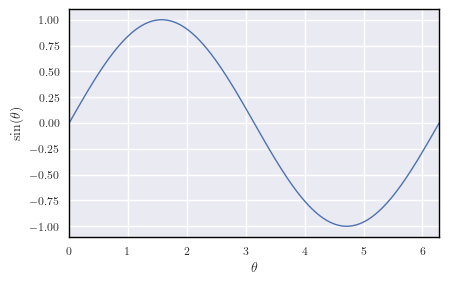

In [36]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



### Chosen best results

* Wikipedia:
    * $q=0.9$, $p_{SBT} = 0.8$, $p_{ST} = 0.6$, $\rho_0=0.2$ 
* Slashdot:
    * $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.9$
* Epinions:
    * $q=0.95$, $p_{SBT} = 0.1$, $p_{ST} = 0.9$, $\rho_0=0.6$

In [37]:
def get_inds(df, sets):
    """Finds inds looking for indexes but not exact values
    """
    inds = []
    for set_ in sets:
        q, p, ps, rho_init = set_
        ind_p = np.where((np.abs(df.q - q) < 1e-8) & (np.abs(df.p - p) < 1e-8) & 
                         (np.abs(df.ps - ps) < 1e-8) & (np.abs(df.rho_init - rho_init) < 1e-8) )
        if len(ind_p[0]) == 0:
            print("No index for " + set_)
        else:
            if len(ind_p[0]) > 1:
                print("Multiple points for " + set_)
            inds.extend(ind_p[0])
    return inds

In [38]:
sets_wiki = [(0.9, 0.8, 0.6, 0.2)]
sets_slash = [(0.875, 0.0, 0.8, 0.9)]
sets_slash = [(0.9, 0.1, 0.7, 0.9)]
sets_epinions = [(0.95, 0.0, 0.9, 0.4)]
sets_epinions = [(0.925, 0.1, 0.9, 0.6)]
sets_epinions = [(0.95, 0.1, 0.9, 0.6)]

inds_wiki = get_inds(df2_wrho_correct_g, sets_wiki)
df2_wrho_correct_g.iloc[inds_wiki]

,,,,q,p,ps,rho_init,repetitions,rho_lvl,rho_lvl_std,rho_lvl_valid,rho_sim_std,rho_lvl2,...,closest_to_four_triads_rho_transformed_mean,closest_to_four_triads_rho_transformed_std,closest_to_six_triads_relative_min,closest_to_six_triads_relative_max,closest_to_six_triads_relative_mean,closest_to_six_triads_relative_std,closest_to_four_triads_relative_min,closest_to_four_triads_relative_max,closest_to_four_triads_relative_mean,closest_to_four_triads_relative_std
0.9,0.8,0.6,0.2,0.9,0.8,0.6,0.2,5,0.893451,0.001058,5,0.005095,0.893451,...,0.027913,0.000561,3.084433,3.345889,3.207172,0.087948,2.063688,2.237926,2.141938,0.058537


In [39]:
inds_slash = get_inds(df2_srho_correct_g, sets_slash)
df2_srho_correct_g.iloc[inds_slash]

,,,,q,p,ps,rho_init,repetitions,rho_lvl,rho_lvl_std,rho_lvl_valid,rho_sim_std,rho_lvl2,...,closest_to_four_triads_rho_transformed_mean,closest_to_four_triads_rho_transformed_std,closest_to_six_triads_relative_min,closest_to_six_triads_relative_max,closest_to_six_triads_relative_mean,closest_to_six_triads_relative_std,closest_to_four_triads_relative_min,closest_to_four_triads_relative_max,closest_to_four_triads_relative_mean,closest_to_four_triads_relative_std
0.9,0.1,0.7,0.9,0.9,0.1,0.7,0.9,5,0.734377,0.001005,5,0.000282,0.734377,...,0.007674,0.000319,5.77978,5.956508,5.843064,0.064213,3.432488,3.541709,3.481937,0.035396


In [40]:
inds_epinions = get_inds(df2_erho_correct_g, sets_epinions)
df2_erho_correct_g.iloc[inds_epinions]

,,,,q,p,ps,rho_init,repetitions,rho_lvl,rho_lvl_std,rho_lvl_valid,rho_sim_std,rho_lvl2,...,closest_to_four_triads_rho_transformed_mean,closest_to_four_triads_rho_transformed_std,closest_to_six_triads_relative_min,closest_to_six_triads_relative_max,closest_to_six_triads_relative_mean,closest_to_six_triads_relative_std,closest_to_four_triads_relative_min,closest_to_four_triads_relative_max,closest_to_four_triads_relative_mean,closest_to_four_triads_relative_std
0.95,0.1,0.9,0.6,0.95,0.1,0.9,0.6,6,0.952475,0.00246,6,0.00002,0.952475,...,0.016391,0.000319,5.497291,5.52735,5.516461,0.013597,3.677754,3.699028,3.691315,0.00962


In [41]:
df2_wrho_correct_g.iloc[inds_wiki].columns[40:100]
df2_srho_correct_g.iloc[inds_slash][['tr0_lvl3', 'tr0_lvl3_std', 'tr0_sim_std3', 'tr1_lvl3',
       'tr1_lvl3_std', 'tr1_sim_std3', 'tr2_lvl3', 'tr2_lvl3_std',
       'tr2_sim_std3', 'tr3_lvl3', 'tr3_lvl3_std', 'tr3_sim_std3', 'tr4_lvl3',
       'tr4_lvl3_std', 'tr4_sim_std3', 'tr5_lvl3', 'tr5_lvl3_std',
       'tr5_sim_std3', 'tr6_lvl3', 'tr6_lvl3_std', 'tr6_sim_std3', 'tr7_lvl3',
       'tr7_lvl3_std', 'tr7_sim_std3']]

,,,,tr0_lvl3,tr0_lvl3_std,tr0_sim_std3,tr1_lvl3,tr1_lvl3_std,tr1_sim_std3,tr2_lvl3,tr2_lvl3_std,tr2_sim_std3,tr3_lvl3,...,tr4_sim_std3,tr5_lvl3,tr5_lvl3_std,tr5_sim_std3,tr6_lvl3,tr6_lvl3_std,tr6_sim_std3,tr7_lvl3,tr7_lvl3_std,tr7_sim_std3
0.9,0.1,0.7,0.9,0.009785,0.000221,0.000064,0.043005,0.000275,0.00009,0.010474,0.000177,0.000063,0.079857,...,0.000089,0.051091,0.000549,0.000272,0.075213,0.000609,0.000389,0.707514,0.002327,0.001079


In [42]:
wiki_high_bests = pd.read_hdf(Path(outputs_wiki_rhoinits_2000, "ave_best.df5"))
wiki_high_bests

,q,p,ps,rho,tr0,tr1,tr2,tr3,tr4,tr5,...,rho_std,tr0_std,tr1_std,tr2_std,tr3_std,tr4_std,tr5_std,tr6_std,tr7_std,repetitions
school,,,,,,,,,,,,,,,,,,,,,
WikiElections,0.9,0.8,0.6,0.894264,0.001283,0.005689,0.0039,0.05068,0.011534,0.037577,...,0.003548,0.000213,0.000863,0.000625,0.00548,0.000739,0.002952,0.003898,0.012294,5


In [43]:
slash_high_bests = pd.read_hdf(Path(outputs_slash_rhoinits, "ave_best.df5"))
slash_high_bests

,q,p,ps,rho,tr0,tr1,tr2,tr3,tr4,tr5,...,rho_std,tr0_std,tr1_std,tr2_std,tr3_std,tr4_std,tr5_std,tr6_std,tr7_std,repetitions
school,,,,,,,,,,,,,,,,,,,,,
Slashdot,0.9,0.12,0.7,0.731459,0.010883,0.044964,0.010968,0.082633,0.024213,0.052727,...,0.000107,0.00003,0.00006,0.00003,0.000144,0.000041,0.000127,0.000165,0.000483,25


In [44]:
epi_high_bests = pd.read_hdf(Path(outputs_epi_rhoinits, "ave_best.df5"))
epi_high_bests

,q,p,ps,rho,tr0,tr1,tr2,tr3,tr4,tr5,...,rho_std,tr0_std,tr1_std,tr2_std,tr3_std,tr4_std,tr5_std,tr6_std,tr7_std,repetitions
school,,,,,,,,,,,,,,,,,,,,,
Epinions,0.95,0.1,0.9,0.953895,0.000057,0.000762,0.000062,0.002723,0.000763,0.001699,...,0.000035,9.628205e-07,0.000002,0.000002,0.000024,0.000002,0.000028,0.000024,0.000067,6


In [45]:
df2_high_bests = pd.read_hdf("spanish_ave_best3.h5")
df2_high_bests

,q,p,ps,rho,tr0,tr1,tr2,tr3,tr4,tr5,...,rho_std,tr0_std,tr1_std,tr2_std,tr3_std,tr4_std,tr5_std,tr6_std,tr7_std,repetitions
school,,,,,,,,,,,,,,,,,,,,,
t11_10_1,0.900000,0.000000,0.750000,0.873860,0.004580,0.027000,0.007756,0.062953,0.014008,0.046471,...,0.021034,0.002023,0.008118,0.002708,0.013946,0.004499,0.009069,0.014697,0.048440,1
t11_10_2,0.962500,0.725000,0.525000,0.731951,0.031651,0.091444,0.021266,0.130140,0.048538,0.063170,...,0.019184,0.006102,0.007838,0.003678,0.008270,0.006722,0.004953,0.008012,0.032862,2
t11_10_3,0.956250,0.762500,0.512500,0.678185,0.046147,0.119032,0.026963,0.130599,0.064236,0.063624,...,0.012519,0.005753,0.007307,0.002782,0.004829,0.005993,0.003310,0.007356,0.025149,5
t11_10_4,0.933333,0.625000,0.550000,0.755349,0.025068,0.081036,0.020771,0.111955,0.042769,0.066822,...,0.009858,0.002731,0.004465,0.002019,0.004572,0.003436,0.003031,0.005318,0.020142,8
t11_9_1,0.750000,0.150000,1.000000,0.921573,0.000891,0.008887,0.003647,0.033412,0.005782,0.029956,...,0.009831,0.000348,0.002368,0.001053,0.006608,0.001345,0.005754,0.007594,0.023203,2
t11_9_2,0.850000,0.100000,0.775000,0.844948,0.007948,0.041151,0.012871,0.081448,0.020285,0.062451,...,0.020638,0.002473,0.006663,0.003221,0.010204,0.004981,0.007256,0.012084,0.041454,2
t11_9_3,0.975000,0.800000,0.500000,0.742375,0.047138,0.129795,0.010878,0.098350,0.047165,0.037083,...,0.029739,0.015242,0.033465,0.004316,0.015873,0.015642,0.010346,0.018126,0.054709,1
t11_9_4,0.900000,0.750000,0.550000,0.935037,0.001804,0.013196,0.002364,0.035896,0.008060,0.023950,...,0.016122,0.001409,0.006101,0.001571,0.015041,0.002827,0.009208,0.014720,0.045565,1
t11_8_1,0.937500,0.750000,0.625000,0.972693,0.000391,0.003387,0.000710,0.011020,0.001730,0.008970,...,0.008539,0.000351,0.002639,0.000663,0.005945,0.001105,0.004407,0.006969,0.019476,2


['$q=0.775,p_{SBT}=0.8,p_{ST}=0.6,\\rho_{0}=0.0$$,\\rho=0.84$', '$q=0.8,p_{SBT}=1.0,p_{ST}=0.5,\\rho_{0}=0.0$$,\\rho=0.84$', '$q=0.9,p_{SBT}=0.1,p_{ST}=0.7,\\rho_{0}=0.9$$,\\rho=0.73$']


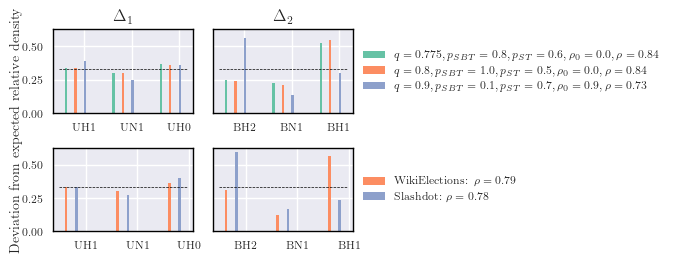

In [53]:

"""Let us have moved values around 0. 
"""

save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl3"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = False
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


sim_pos = 0
real_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1])
fig, axes = plt.subplots(2, 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

sim_labels = []
for i, set_ in enumerate(sets_wiki):
    q, p, ps, rho_init = set_
    label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,3),p=round(p,3),ps=round(ps,3), rho_init=round(rho_init,3))
    if show_rho:
        rho = df2_wrho_correct_g.iloc[inds_wiki].rho.values[i]
        label += r"$,\rho={rho}$".format(rho = round(rho, 2))
    sim_labels.append(label)

for i, set_ in enumerate(sets_slash):
    q, p, ps, rho_init = set_
    label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,3),p=round(p,3),ps=round(ps,3), rho_init=round(rho_init,3))
    if show_rho:
        rho = df2_srho_correct_g.iloc[inds_slash].rho.values[i]
        label += r"$,\rho={rho}$".format(rho = round(rho, 2))
    sim_labels.append(label)

print(sim_labels)

triads_set = n1_triads
ydata_wiki, yerr = fun_prepare_data(df2_wrho_correct_g.iloc[inds_wiki], triads_set, std_data = df2_wrho_correct_g.iloc[inds_wiki])
ydata_wiki = ydata_wiki[ydata_wiki.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata_wiki.columns.duplicated()].copy() 
else:
    yerr = None
ydata_wiki = ydata_wiki.loc[:,~ydata_wiki.columns.duplicated()].copy() 

ydata_slash, _ = fun_prepare_data(df2_srho_correct_g.iloc[inds_slash], triads_set, std_data = None)
ydata_slash = ydata_slash[ydata_slash.columns[group_size*which_group:group_size*(which_group+1)]]
# if show_error:
#     yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
#     yerr = yerr.loc[:,~ydata_wiki.columns.duplicated()].copy() 
# else:
#     yerr = None
ydata_slash = ydata_slash.loc[:,~ydata_slash.columns.duplicated()].copy() 

ydata = pd.concat([ydata_wiki, ydata_slash], join='inner', axis =1)

title = r'$\Delta_1$'
plot_bar_nets(axes[sim_pos, 0], ydata, None, triads_set, title, labels = sim_labels, 
              line_level = line_level, linewidth = linewidth, colors=colors)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads

ydata_wiki, yerr = fun_prepare_data(df2_wrho_correct_g.iloc[inds_wiki], triads_set, std_data = df2_wrho_correct_g.iloc[inds_wiki])
ydata_wiki = ydata_wiki[ydata_wiki.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata_wiki.columns.duplicated()].copy() 
else:
    yerr = None
ydata_wiki = ydata_wiki.loc[:,~ydata_wiki.columns.duplicated()].copy() 

ydata_slash, _ = fun_prepare_data(df2_srho_correct_g.iloc[inds_slash], triads_set, std_data = None)
ydata_slash = ydata_slash[ydata_slash.columns[group_size*which_group:group_size*(which_group+1)]]
# if show_error:
#     yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
#     yerr = yerr.loc[:,~ydata_wiki.columns.duplicated()].copy() 
# else:
#     yerr = None
ydata_slash = ydata_slash.loc[:,~ydata_slash.columns.duplicated()].copy() 

ydata = pd.concat([ydata_wiki, ydata_slash], join='inner', axis =1)

title = r'$\Delta_2$'

plot_bar_nets(axes[sim_pos, 1], ydata, None, triads_set, title, labels = sim_labels, 
              line_level = line_level, linewidth = linewidth, colors=colors)

# axes[sim_pos, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Realnets
triads_set = n1_triads
ydata_wiki, _ = fun_prepare_data(wiki, triads_set)
ydata_slash, _ = fun_prepare_data(slash, triads_set)

ydata = pd.concat([ydata_wiki, ydata_slash], join='inner', axis =1)

labels = [r"WikiElections: $\rho={rho}$".format(rho=round(wiki.rho.values[0], 2)), 
          r"Slashdot: $\rho={rho}$".format(rho=round(slash.rho.values[0], 2))]

plot_bar_nets(axes[real_pos, 0], ydata, None, triads_set, None, labels = labels, 
              line_level = line_level, colors=colors[1:4], linewidth = linewidth)
# plot_bar_realnets(ax=axes[real_pos, 1], triads_set=n2_triads, title='')
triads_set = n2_triads

ydata_wiki, _ = fun_prepare_data(wiki, triads_set)
ydata_slash, _ = fun_prepare_data(slash, triads_set)

ydata = pd.concat([ydata_wiki, ydata_slash], join='inner', axis =1)

plot_bar_nets(axes[real_pos, 1], ydata, None, triads_set, None, labels = labels, 
              line_level = line_level, colors=colors[1:4], linewidth = linewidth)

# axes[real_pos, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in (sim_pos, real_pos):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
ticks = axes[i,0].get_yticklabels()
ticks = axes[i,0].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_real_rhoinit'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

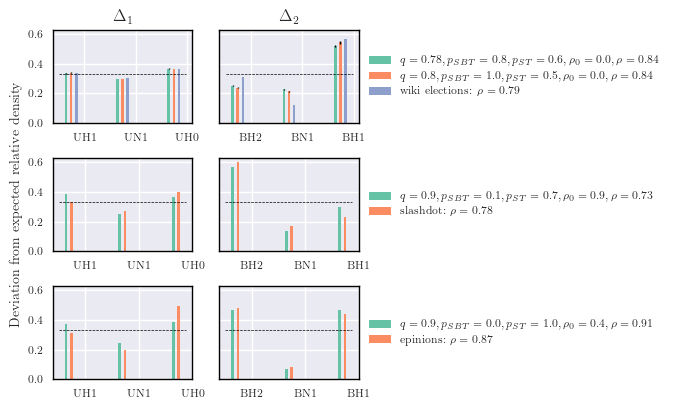

In [74]:

"""Let us have moved values around 0. 
"""

save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl3"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


wiki_pos = 0
slash_pos = 1
epinions_pos = 2

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1] * 1.5)
fig, axes = plt.subplots(3, 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

# sim_labels = []
# for i, set_ in enumerate(sets_wiki):
#     q, p, ps, rho_init = set_
#     label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,3),p=round(p,3),ps=round(ps,3), rho_init=round(rho_init,3))
#     if show_rho:
#         rho = df2_wrho_correct_g.iloc[inds_wiki].rho.values[i]
#         label += r"$,\rho={rho}$".format(rho = round(rho, 2))
#     sim_labels.append(label)

# for i, set_ in enumerate(sets_slash):
#     q, p, ps, rho_init = set_
#     label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,3),p=round(p,3),ps=round(ps,3), rho_init=round(rho_init,3))
#     if show_rho:
#         rho = df2_srho_correct_g.iloc[inds_slash].rho.values[i]
#         label += r"$,\rho={rho}$".format(rho = round(rho, 2))
#     sim_labels.append(label)

# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_wrho_correct_g.iloc[inds_wiki],  triads_set, 
                               std_data = df2_wrho_correct_g.iloc[inds_wiki], addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(wiki,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_wrho_correct_g.iloc[inds_wiki].rho.values
    wiki_rho = wiki.rho.values[0]
else:
    rhos = None
    wiki_rho = None

title = r'$\Delta_1$'
plot_bar_nets(axes[wiki_pos, 0], ydata, yerr, triads_set, title, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = wiki_rho)

# title = r'$\Delta_1$'
# plot_bar_nets(axes[sim_pos, 0], ydata, None, triads_set, title, labels = sim_labels, 
#               line_level = line_level, linewidth = linewidth, colors=colors)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads

ydata, yerr = fun_prepare_data(df2_wrho_correct_g.iloc[inds_wiki],  triads_set, 
                               std_data = df2_wrho_correct_g.iloc[inds_wiki], addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(wiki,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_wrho_correct_g.iloc[inds_wiki].rho.values
    wiki_rho = wiki.rho.values[0]
else:
    rhos = None
    wiki_rho = None

title = r'$\Delta_2$'
plot_bar_nets(axes[wiki_pos, 1], ydata, yerr, triads_set, title, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = wiki_rho)

# axes[sim_pos, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

########################## Slashdot
triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_srho_correct_g.iloc[inds_slash],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# if show_error:
#     yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
#     yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
# else:
#     yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(slash,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_srho_correct_g.iloc[inds_slash].rho.values
    slash_rho = slash.rho.values[0]
else:
    rhos = None
    slash_rho = None

title = r'$\Delta_1$'
plot_bar_nets(axes[slash_pos, 0], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, 
              real_net_additional_label_data = slash_rho)

# title = r'$\Delta_1$'
# plot_bar_nets(axes[sim_pos, 0], ydata, None, triads_set, title, labels = sim_labels, 
#               line_level = line_level, linewidth = linewidth, colors=colors)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads

ydata, yerr = fun_prepare_data(df2_srho_correct_g.iloc[inds_slash],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# if show_error:
#     yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
#     yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
# else:
#     yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(slash,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_srho_correct_g.iloc[inds_slash].rho.values
    slash_rho = slash.rho.values[0]
else:
    rhos = None
    slash_rho = None

title = r'$\Delta_2$'
plot_bar_nets(axes[slash_pos, 1], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = slash_rho)

########################## Epinions
triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds_epinions],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# if show_error:
#     yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
#     yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
# else:
#     yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(epinions,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_erho_correct_g.iloc[inds_epinions].rho.values
    epinions_rho = epinions.rho.values[0]
else:
    rhos = None
    epinions_rho = None

title = r'$\Delta_1$'
plot_bar_nets(axes[epinions_pos, 0], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, 
              real_net_additional_label_data = epinions_rho)

# title = r'$\Delta_1$'
# plot_bar_nets(axes[sim_pos, 0], ydata, None, triads_set, title, labels = sim_labels, 
#               line_level = line_level, linewidth = linewidth, colors=colors)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads

ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds_epinions],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# if show_error:
#     yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
#     yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
# else:
#     yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(epinions,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_erho_correct_g.iloc[inds_epinions].rho.values
    epinions_rho = epinions.rho.values[0]
else:
    rhos = None
    epinions_rho = None

title = r'$\Delta_2$'
plot_bar_nets(axes[epinions_pos, 1], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epinions_rho)

# axes[real_pos, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in (wiki_pos, slash_pos, epinions_pos):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
ticks = axes[i,0].get_yticklabels()
ticks = axes[i,0].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_real_rhoinit3'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

#### New paper plot

In [79]:
mean_data.transpose()
# df2_wrho_correct_g.iloc[inds_wiki]
std_data

q,0.95,0.80,0.10
p,0.500000,0.500000,0.500000
ps,0.500000,0.500000,0.600000
tr0,0.018472,0.021720,0.003107
tr1,0.004706,0.008454,0.003179
tr2,0.015700,0.004305,0.003281
tr3,0.005874,0.006526,0.003878
tr4,0.007341,0.006802,0.000856
tr5,0.006988,0.009772,0.001327
tr6,0.013848,0.005550,0.001098
tr7,0.023018,0.019287,0.005187


In [116]:
ydata, yerr = fun_prepare_data(df2_wrho_correct_g.iloc[inds_wiki],  triads_set, 
                               std_data = df2_wrho_correct_g.iloc[inds_wiki], addon = addon)
ydata
# df2_wrho_correct_g.iloc[inds_wiki]
# mean_data

,0.775,0.800
,0.8,1.0
,0.6,0.5
,0.0,0.0
q,0.775,0.800
p,0.8,1.0
ps,0.6,0.5
tr3_lvl3,0.001447,0.005523
tr5_lvl3,-0.034417,-0.034765
tr6_lvl3,0.032970,0.029242


In [167]:
sns.color_palette("tab10").as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [119]:
ydata, yerr = fun_prepare_data(df2_wrho_correct_g.iloc[inds_wiki],  triads_set, 
                               std_data = df2_wrho_correct_g.iloc[inds_wiki], addon = addon)
fun_prepare_data = prepare_data5
ydata


fun_prepare_data(mean_data.transpose(),  triads_set, 
                               std_data = std_data.transpose(), addon = "")

(q        0.95      0.80      0.10
 tr3  0.041551  0.006008  0.004618
 tr5 -0.133797 -0.030976 -0.001598
 tr6  0.092247  0.024968 -0.003021,
 q        0.95      0.80      0.10
 tr3  0.016899  0.018195  0.010398
 tr5  0.020105  0.027244  0.003558
 tr6  0.039842  0.015474  0.002944)

In [32]:
triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_wrho_correct_g.iloc[inds_wiki],  triads_set, 
                               std_data = df2_wrho_correct_g.iloc[inds_wiki], addon = addon)
ydata
yerr
df2_wrho_correct_g.iloc[inds_wiki]

,,,,q,p,ps,rho_init,repetitions,rho_lvl,rho_lvl_std,rho_lvl_valid,rho_sim_std,rho_lvl2,...,closest_to_four_triads_rho_transformed_mean,closest_to_four_triads_rho_transformed_std,closest_to_six_triads_relative_min,closest_to_six_triads_relative_max,closest_to_six_triads_relative_mean,closest_to_six_triads_relative_std,closest_to_four_triads_relative_min,closest_to_four_triads_relative_max,closest_to_four_triads_relative_mean,closest_to_four_triads_relative_std
0.9,0.8,0.6,0.2,0.9,0.8,0.6,0.2,5,0.893451,0.001058,5,0.005095,0.893451,...,0.027913,0.000561,3.084433,3.345889,3.207172,0.087948,2.063688,2.237926,2.141938,0.058537


In [35]:

df2_wrho_correct_g.columns[20:40]

Index(['rho_lvl4_valid', 'rho_sim_std4', 'tr0_lvl', 'tr0_lvl_std',
       'tr0_sim_std', 'tr1_lvl', 'tr1_lvl_std', 'tr1_sim_std', 'tr2_lvl',
       'tr2_lvl_std', 'tr2_sim_std', 'tr3_lvl', 'tr3_lvl_std', 'tr3_sim_std',
       'tr4_lvl', 'tr4_lvl_std', 'tr4_sim_std', 'tr5_lvl', 'tr5_lvl_std',
       'tr5_sim_std'],
      dtype='object')

In [247]:
inds_wiki[0]

288

In [248]:
dd = df2_wrho_correct_g.iloc[[inds_wiki[0]]]
ydata, yerr = prepare_data3(dd, all_sets, all_triads, dd, "_lvl3", fun_prepare_data)

ydata
yerr


,0.775
,0.8
,0.6
,0.0
tr2_lvl3_std,0.002938
tr6_lvl3_std,0.002328
tr5_lvl3_std,0.001328
tr1_lvl3_std,0.003853


In [46]:
import matplotlib
matplotlib.colors.ColorConverter.to_rgb("navy")

(0.0, 0.0, 0.5019607843137255)

In [151]:
sim_yerr

,0.900,0.875,0.925
,0.8,0.0,0.1
,0.6,0.8,0.9
,0.2,0.9,0.6
tr2_sim_std,0.000749,0.000930,0.000007
tr6_sim_std,0.004695,0.004739,0.000316
tr5_sim_std,0.003834,0.004559,0.000282
tr1_sim_std,0.000961,0.001521,0.000012


In [47]:
schools_t11_2 = ["t11_2_1", "t11_2_3", "t11_2_4", "t11_2_2"]
schools_t11_9 = ["t11_9_1", "t11_9_2", "t11_9_4", "t11_9_3"]
best_high_schools = ["t11_4_1", "t11_2_1", "t11_5_4", "t11_9_4"]
chosen_high_schools = ["t11_4_1", "t11_9_2", "t11_9_4", "t11_9_3"]
chosen_high_schools12 = ["t11_4_1", "t11_6", "t11_9_4", "t11_9_3"]
chosen_high_schools13 = ["t11_4_1", "t11_6", "t11_9_4", "t2"]
chosen_high_schools14 = ["t11_4_1", "t11_6", "t11_9_4", "t11_2_4"]
chosen_high_schools2 = ["t11_4_1", "t11_8_3", "t11_9_4", "t11_9_3"]

chosen_high_schools32 = ["t11_4_1", "t11_6", "t11_9_4"]


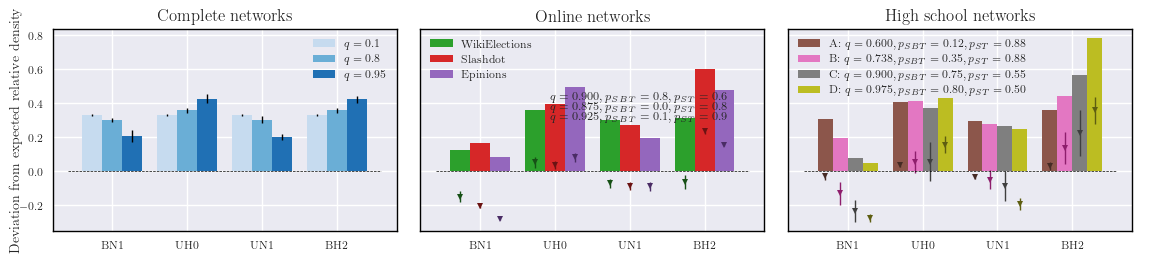

In [120]:

"""Let us have moved values around 0. 
"""

save_ = False
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl3"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
# group_size = 7
add_sim_ticks = True
show_error = True
all_triads_flag = False

high_schools_choice = schools_t11_2 # schools_t11_2 or best_high_schools or chosen_high_schools
high_schools_choice = schools_t11_9 
high_schools_choice = best_high_schools
high_schools_choice = chosen_high_schools
high_schools_choice = chosen_high_schools12
# high_schools_choice = chosen_high_schools2

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3

# plot_param_width = 0.15
# plot_param_m = 1
plot_param_total_width = 0.8
plot_param_single_width = 1.

cmpl_pos = 0
large_pos = 1
high_pos = 2

# wiki_pos = 0
# slash_pos = 1
# epinions_pos = 2

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 2.5 , figsize[1])
fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]
if all_triads_flag:
    # all_triads = [*n1_triads, *n2_triads]
    all_triads = ["tr2", "tr6", "tr3", "tr5", "tr1", "tr4"]
else:
    all_triads = ["tr2", "tr6", "tr5", "tr1"]

# Simulated nets
cmpl_colors = sns.color_palette("Blues", 3).as_hex()

ydata, yerr = prepare_data3(mean_data.transpose(), all_sets, all_triads, std_data.transpose(), "", "", fun_prepare_data)
# triads_set = n1_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")
# triads_set = n2_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")

if not show_error:
    yerr = None

# reordering
qs = ydata.columns.values
inds = qs.argsort()
qs = qs[inds]
ydata = ydata[qs]
if yerr is not None:
    yerr = yerr[qs]

cmpl_labels = [r'$q={q}$'.format(q=round(q,2)) for q in qs]

title = r'Complete networks'
plot_bar_nets(axes[cmpl_pos], ydata, yerr, all_triads, title, 
              labels = cmpl_labels, line_level = line_level, 
              linewidth = linewidth, colors=cmpl_colors, 
              smallest_edge = True, legend_elem = 1,
              total_width=plot_param_total_width, single_width=plot_param_single_width)

axes[cmpl_pos].legend(loc='best')


############# Wiki, Epinions, Slashdot

large_colors = sns.color_palette("tab10").as_hex()[2:5]

large_data = pd.concat([wiki, slash, epinions])
ydata, yerr = prepare_data3(large_data, all_sets, all_triads, None, "", "", fun_prepare_data)

large_labels = [r"WikiElections", r"Slashdot", r"Epinions"]

# fitting
# df2_wrho_correct_g
sim_large_data = pd.concat([df2_wrho_correct_g.iloc[[inds_wiki[0]]], df2_srho_correct_g.iloc[inds_slash], df2_erho_correct_g.iloc[inds_epinions]], join = "inner")
sim_ydata, sim_yerr = prepare_data3(sim_large_data, all_sets, all_triads, sim_large_data, addon = addon, norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns


plot_bar_nets(axes[large_pos], ydata, None, all_triads, r"Online networks", labels = large_labels, 
              line_level = line_level, colors=large_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

axes[large_pos].legend(loc='upper left')

axes[large_pos].text(x = 1.2, y = 0.42, s = param_labels[0], fontsize = 'small')
axes[large_pos].text(x = 1.2, y = 0.36, s = param_labels[1], fontsize = 'small')
axes[large_pos].text(x = 1.2, y = 0.3, s = param_labels[2], fontsize = 'small')

############# Spanish

high_colors = sns.color_palette("tab10").as_hex()[5:10]

high_data = pd.concat(real_datasets_all).loc[high_schools_choice]
ydata, yerr = prepare_data3(high_data, all_sets, all_triads, None, "", "", fun_prepare_data)

high_labels = [r"A", r"B", r"C", r"D"]

# fitting
# df2_wrho_correct_g
# sim_high_data = pd.concat(df2_high_bests.loc[high_schools_choice], join = "inner")
sim_high_data = df2_high_bests.loc[high_schools_choice]
sim_ydata, sim_yerr = prepare_data3(sim_high_data, all_sets, all_triads, sim_high_data, addon = "", err_addon = "", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[1],3):.3f}',p=f'{round(col[2],2):.2f}',ps=f'{round(col[3],2):.2f}') for col in sim_ydata.columns]
# param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

labels = [hl + ": " + pl for hl, pl in zip(high_labels,param_labels)]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns

plot_bar_nets(axes[high_pos], ydata, None, all_triads, r"High school networks", labels = labels, 
              line_level = line_level, colors=high_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

axes[high_pos].legend(loc='upper left')


# # fix tick rotations
# for ax in axes.flatten():
#     for tick in ax.get_xticklabels():
#         tick.set_rotation(0)

# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])

for i, ax in enumerate(axes.flatten()):
    # if i != 0: 
    ax.set_ylabel("")
    
# ticks = axes[i].get_yticklabels()
# ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal" and fun_prepare_data == prepare_data5:
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_cmpl_large_high_v3'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if not show_error:
    fname = fname + "_noterr"
# if show_rho:
#     fname = fname + "_rho"
if all_triads_flag:
    fname = fname + "_all" 
if fun_prepare_data == prepare_data4:
    fname += "_nodev"
    
if high_schools_choice == schools_t11_2:
    fname += "_t11_2"
elif high_schools_choice == schools_t11_9:
    fname += "_t11_9"
elif high_schools_choice == best_high_schools:
    fname += "_best"
elif high_schools_choice == chosen_high_schools:
    fname += "_chosen"
elif high_schools_choice == chosen_high_schools12:
    fname += "_chosen12"
elif high_schools_choice == chosen_high_schools2:
    fname += "_chosen2"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

In [55]:
high_colors

['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

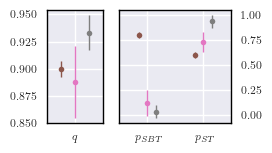

In [74]:
width = 345
figsize = set_size(width)
figsize = (figsize[0] / 2, figsize[1] / 2)
fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [1,2]})

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]

x = np.ones(3)
r1 = (np.random.random(3) - 0.5) / 10
r2 = (np.random.random(3) - 0.5) / 10
r3 = (np.random.random(3) - 0.5) / 10
r1 = [-0.05, 0, 0.05]

cols = ['q']
cols_std = [col + "_std" for col in cols]

for i, col in enumerate(cols):
    col_std = cols_std[i]
    for j, net in enumerate(large_bests2):
        
        axes[0].errorbar(i + r1[j], net[col], net[col_std], marker = 'o',color = high_colors[j])
        
cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

for i, col in enumerate(cols):
    col_std = cols_std[i]
    for j, net in enumerate(large_bests2):
        
        axes[1].errorbar(i + r1[j], net[col], net[col_std], marker = 'o',color = high_colors[j])
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

axes[0].set_xticks([0])
axes[0].set_xticklabels([r'$q$'])
axes[0].set_xlim([-0.1,0.1])


axes[1].set_xticks([0,1])
axes[1].set_xticklabels([r'$p_{SBT}$',r'$p_{ST}$'])
axes[1].set_xlim([-0.5,1.5])
axes[1].yaxis.tick_right()

In [77]:
np.arange(len(cols))

array([0, 1])

In [81]:
r'$' + cols[1] + '$'

'$ps$'

In [48]:
def fill_axis(ax, df_bests, cols, colors, spacing = 1, ytick_left = True):
    # r1 = np.array([-0.05, 0, 0.05]) * spacing
    
    rows = len(df_bests)
    
    r1 = (np.arange(rows) - (rows-1)/2 ) / 20 * spacing

    cols_std = [col + "_std" for col in cols]

    for i, col in enumerate(cols):
        col_std = cols_std[i]
        for j, net in enumerate(df_bests):
            
            ax.errorbar(i + r1[j], net[col], net[col_std], marker = 'o',color = colors[j])


    ax.set_xticks(np.arange(len(cols)))
    
    xlabels = []
    for col in cols:
        if col == 'p':
            xlabels.append(r'$p_{SBT}$')
        elif col == 'ps':
            xlabels.append(r'$p_{ST}$')
        else:
            xlabels.append(r'$' + col + '$')
            
    ax.set_xticklabels(xlabels)
    xlims = np.array([r1[0], r1[-1]]) * 2 * spacing
    xlims[1] += len(cols) - 1
    ax.set_xlim(xlims)
    
    ylims = list(ax.get_ylim())
    if ylims[0] < 0:
        ylims[0] = 0
    if ylims[1] > 1:
        ylims[1] = 1
    
    ax.set_ylim(ylims)

    if not ytick_left:
        ax.yaxis.tick_right()
    return ax        

/tmp/ipykernel_67773/2376432951.py:154: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
/tmp/ipykernel_67773/2376432951.py:300: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


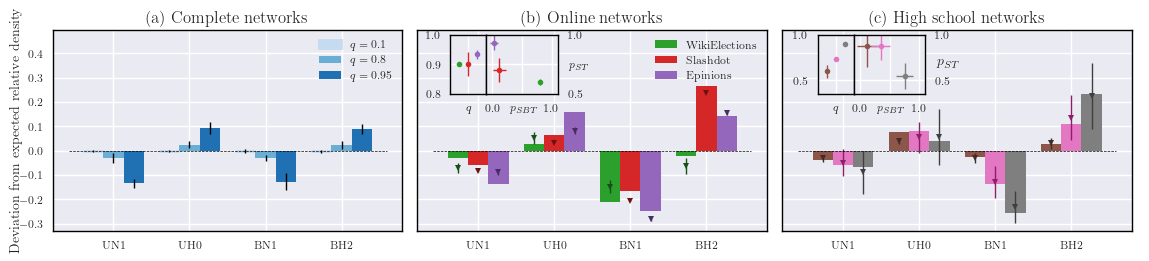

In [45]:

"""Let us have moved values around 0. 
"""

save_ = True
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl3"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
# group_size = 7
add_sim_ticks = True
show_error = True
all_triads_flag = False

large_inset = True
high_inset = True
psbt_vs_pst = True

high_schools_choice = schools_t11_2 # schools_t11_2 or best_high_schools or chosen_high_schools
high_schools_choice = schools_t11_9 
high_schools_choice = best_high_schools
# high_schools_choice = chosen_high_schools
# high_schools_choice = chosen_high_schools12
# high_schools_choice = chosen_high_schools13
high_schools_choice = chosen_high_schools14
# high_schools_choice = chosen_high_schools2
high_schools_choice = chosen_high_schools32

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3

# plot_param_width = 0.15
# plot_param_m = 1
plot_param_total_width = 0.8
plot_param_single_width = 1.

cmpl_pos = 0
large_pos = 1
high_pos = 2

# wiki_pos = 0
# slash_pos = 1
# epinions_pos = 2

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 2.5 , figsize[1])
fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]
if all_triads_flag:
    # all_triads = [*n1_triads, *n2_triads]
    all_triads = ["tr2", "tr6", "tr3", "tr5", "tr1", "tr4"]
else:
    all_triads = ["tr5", "tr6", "tr2", "tr1"]

# Simulated nets
cmpl_colors = sns.color_palette("Blues", 3).as_hex()

ydata, yerr = prepare_data3(mean_data.transpose(), all_sets, all_triads, std_data.transpose(), "", "", "", fun_prepare_data)
# triads_set = n1_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")
# triads_set = n2_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")

if not show_error:
    yerr = None

# reordering
qs = ydata.columns.values
inds = qs.argsort()
qs = qs[inds]
ydata = ydata[qs]
if yerr is not None:
    yerr = yerr[qs]

cmpl_labels = [r'$q={q}$'.format(q=round(q,2)) for q in qs]

title = r'(a) Complete networks'
plot_bar_nets(axes[cmpl_pos], ydata, yerr, all_triads, title, 
              labels = cmpl_labels, line_level = line_level, 
              linewidth = linewidth, colors=cmpl_colors, 
              smallest_edge = True, legend_elem = 1,
              total_width=plot_param_total_width, single_width=plot_param_single_width)

axes[cmpl_pos].legend(loc='best')


############# Wiki, Epinions, Slashdot

large_colors = sns.color_palette("tab10").as_hex()[2:5]

large_data = pd.concat([wiki, slash, epinions])
ydata, yerr = prepare_data3(large_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

large_labels = [r"WikiElections", r"Slashdot", r"Epinions"]

# fitting
# df2_wrho_correct_g
sim_large_data = pd.concat([df2_wrho_correct_g.iloc[[inds_wiki[0]]], df2_srho_correct_g.iloc[inds_slash], df2_erho_correct_g.iloc[inds_epinions]], join = "inner")
sim_ydata, sim_yerr = prepare_data3(sim_large_data, all_sets, all_triads, sim_large_data, addon = addon, std_addon = "_std3", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns


plot_bar_nets(axes[large_pos], ydata, None, all_triads, r"(b) Online networks", labels = large_labels, 
              line_level = line_level, colors=large_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

if not large_inset:
    axes[large_pos].legend(loc='upper left')
    # lower right

    axes[large_pos].text(x = 1.2, y = 0.42, s = param_labels[0], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.36, s = param_labels[1], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.3, s = param_labels[2], fontsize = 'small')
else:
    axes[large_pos].legend(loc='upper right')

    df_bests = [wiki_high_bests, slash_high_bests, epi_high_bests]

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.41, 0.65, 0.03, 0.2]
    ax21 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax21, df_bests, cols, large_colors)
    ax21.set_yticks([0.8, 0.9, 1.])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = 0.06

    ax22 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax22, df_bests, cols, large_colors, 2, False)
    else:
        for j, net in enumerate(df_bests):
            ax22.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = large_colors[j])
            ax22.set_xticks([0, 0.5, 1])
            ax22.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax22.set_xlim([-0.1,1.1])
            ax22.set_ylim([0.5,1])
            ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax22.yaxis.tick_right()
            # ax22.set_ylabel(r'$p_{ST}$')
            # ax22.yaxis.set_label_position("right")

############# Spanish

high_colors = sns.color_palette("tab10").as_hex()[5:10]

high_data = pd.concat(real_datasets_all).loc[high_schools_choice]
ydata, yerr = prepare_data3(high_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

high_labels = [r"A", r"B", r"C", r"D"]

# fitting
# df2_wrho_correct_g
# sim_high_data = pd.concat(df2_high_bests.loc[high_schools_choice], join = "inner")
sim_high_data = df2_high_bests.loc[high_schools_choice]
sim_ydata, sim_yerr = prepare_data3(sim_high_data, all_sets, all_triads, sim_high_data, addon = "", err_addon = "", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[1],3):.3f}',p=f'{round(col[2],2):.2f}',ps=f'{round(col[3],2):.2f}') for col in sim_ydata.columns]
# param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

labels = [hl + ": " + pl for hl, pl in zip(high_labels,param_labels)]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns

plot_bar_nets(axes[high_pos], ydata, None, all_triads, r"(c) High school networks", labels = labels, 
              line_level = line_level, colors=high_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

if axes[high_pos].get_ylim()[1] < 0.5:
    ylims = axes[high_pos].get_ylim()
    axes[high_pos].set_ylim([ylims[0], ylims[1] + 0.1])

if not high_inset:
    axes[high_pos].legend(loc='upper left')
    # lower right
else:
    # axes[high_pos].legend(loc='upper right')

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.718, 0.65, 0.03, 0.2]
    ax31 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax31, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors)

    ax31.set_ylim([0.5, 1.])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = 0.06

    ax32 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax32, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors, 2, False)
    else:
        for j, (ind, net) in enumerate(sim_high_data.iterrows()):
            ax32.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = high_colors[j])
            ax32.set_xticks([0, 0.5, 1])
            ax32.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax32.set_xlim([-0.1,1.1])
            ax32.set_ylim([0.35,1])
            ax31.set_ylim([0.35,1])
            # ax32.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax32.yaxis.tick_right()
            ax32.set_ylabel(r'$p_{ST}$', rotation=0)
            ax32.yaxis.set_label_position("right")
            ax32.yaxis.set_label_coords(1.3,0.65)


# # fix tick rotations
# for ax in axes.flatten():
#     for tick in ax.get_xticklabels():
#         tick.set_rotation(0)

# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])

for i, ax in enumerate(axes.flatten()):
    # if i != 0: 
    ax.set_ylabel("")
    
# ticks = axes[i].get_yticklabels()
# ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal" and fun_prepare_data == prepare_data5:
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_cmpl_large_high_v4'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if not show_error:
    fname = fname + "_noterr"
# if show_rho:
#     fname = fname + "_rho"
if all_triads_flag:
    fname = fname + "_all" 
if fun_prepare_data == prepare_data4:
    fname += "_nodev"
    
if large_inset and high_inset:
    fname += "_b"
elif not large_inset:
    fname += "_h"
if psbt_vs_pst:
    fname += "_vs"
    
if high_schools_choice == schools_t11_2:
    fname += "_t11_2"
elif high_schools_choice == schools_t11_9:
    fname += "_t11_9"
elif high_schools_choice == best_high_schools:
    fname += "_best"
elif high_schools_choice == chosen_high_schools:
    fname += "_chosen"
elif high_schools_choice == chosen_high_schools12:
    fname += "_chosen12"
elif high_schools_choice == chosen_high_schools13:
    fname += "_chosen13"
elif high_schools_choice == chosen_high_schools14:
    fname += "_chosen14"
elif high_schools_choice == chosen_high_schools2:
    fname += "_chosen2"
elif high_schools_choice == chosen_high_schools32:
    fname += "_chosen32"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

In [122]:
sim_ydata, sim_yerr = prepare_data3(sim_large_data, all_sets, all_triads, sim_large_data, addon = addon, std_addon = "_std3", norm_fun = fun_prepare_data)

sim_ydata

,0.900,0.875,0.925
,0.8,0.0,0.1
,0.6,0.8,0.9
,0.2,0.9,0.6
q,0.900,0.875,0.925
p,0.8,0.0,0.1
ps,0.6,0.8,0.9
tr5_lvl3,-0.071392,-0.085846,-0.088789
tr6_lvl3,0.051444,0.034835,0.082579
tr2_lvl3,-0.148686,-0.204584,-0.282968
tr1_lvl3,-0.063997,0.235421,0.153378


In [130]:
sim_yerr
sim_ydata
schools_t11_2

['t11_2_1', 't11_2_3', 't11_2_4', 't11_2_2']

In [49]:
df2_high_bests.p_std

school
t11_10_1    0.014434
t11_10_2    0.318525
t11_10_3    0.217945
t11_10_4    0.304891
t11_9_1     0.014434
t11_9_2     0.072169
t11_9_3     0.014434
t11_9_4     0.014434
t11_8_1     0.072169
t11_8_2     0.107044
t11_8_3     0.014434
t11_8_4     0.014434
t11_7       0.427444
t11_6       0.072169
t11_5_1     0.014434
t11_5_2     0.353848
t11_5_3     0.014434
t11_5_4     0.234965
t11_4_1     0.107044
t11_4_2     0.014434
t11_4_3     0.078186
t11_4_4     0.014434
t11_3_1     0.072169
t11_3_2     0.014434
t11_2_1     0.014434
t11_2_2     0.014434
t11_2_3     0.014434
t11_2_4     0.014434
t11_1_1     0.098531
t11_1_2     0.014434
t1          0.014434
t2          0.495185
t6          0.107044
Name: p_std, dtype: float64

/tmp/ipykernel_155307/3136289980.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])


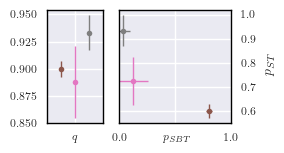

In [93]:
width = 345
figsize = set_size(width)
figsize = (figsize[0] / 2, figsize[1] / 2)
fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [1,2]})

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]

x = np.ones(3)
r1 = (np.random.random(3) - 0.5) / 10
r2 = (np.random.random(3) - 0.5) / 10
r3 = (np.random.random(3) - 0.5) / 10
r1 = [-0.05, 0, 0.05]

cols = ['q']
cols_std = [col + "_std" for col in cols]

for i, col in enumerate(cols):
    col_std = cols_std[i]
    for j, net in enumerate(large_bests2):
        
        axes[0].errorbar(i + r1[j], net[col], net[col_std], marker = 'o',color = high_colors[j])
        
cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

# for i, col in enumerate(cols):
    # col_std = cols_std[i]
for j, net in enumerate(large_bests2):

    axes[1].errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = high_colors[j])
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

axes[0].set_xticks([0])
axes[0].set_xticklabels([r'$q$'])
axes[0].set_xlim([-0.1,0.1])

# axes[0].set_ylim([0.6, 1.])

# axes[1].set_xticks([0,1.])
axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
axes[1].set_xlim([0,1])
axes[1].yaxis.tick_right()
axes[1].set_ylabel(r'$p_{ST}$')
axes[1].yaxis.set_label_position("right")

In [54]:
ind = 0
errcol = yerr.columns[ind]
datacol = ydata.columns[ind]

a = ydata[datacol]
a
b_c = n_sum.values - a
b_c
sum_of_deltas_b_c = np.sum(yerr ** 2, axis = 1) - yerr[errcol]**2
sum_of_deltas_b_c

np.sqrt(b_c**2 * yerr[errcol]**2 + a**2 * sum_of_deltas_b_c) / n_sum.values ** 2

0.900  0.8  0.6  0.2    0.027483
0.875  0.0  0.8  0.9    0.023942
0.925  0.1  0.9  0.6    0.014698
dtype: float64

## psbt vs pst vs q


/tmp/ipykernel_155307/3136289980.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])


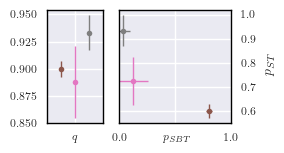

In [142]:
width = 345
figsize = set_size(width)
figsize = (figsize[0] / 2, figsize[1] / 2)
fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [1,2]})

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]

x = np.ones(3)
r1 = (np.random.random(3) - 0.5) / 10
r2 = (np.random.random(3) - 0.5) / 10
r3 = (np.random.random(3) - 0.5) / 10
r1 = [-0.05, 0, 0.05]

cols = ['q']
cols_std = [col + "_std" for col in cols]

for i, col in enumerate(cols):
    col_std = cols_std[i]
    for j, net in enumerate(large_bests2):
        
        axes[0].errorbar(i + r1[j], net[col], net[col_std], marker = 'o',color = high_colors[j])
        
cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

# for i, col in enumerate(cols):
    # col_std = cols_std[i]
for j, net in enumerate(large_bests2):

    axes[1].errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = high_colors[j])
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

axes[0].set_xticks([0])
axes[0].set_xticklabels([r'$q$'])
axes[0].set_xlim([-0.1,0.1])

# axes[0].set_ylim([0.6, 1.])

# axes[1].set_xticks([0,1.])
axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
axes[1].set_xlim([0,1])
axes[1].yaxis.tick_right()
axes[1].set_ylabel(r'$p_{ST}$')
axes[1].yaxis.set_label_position("right")

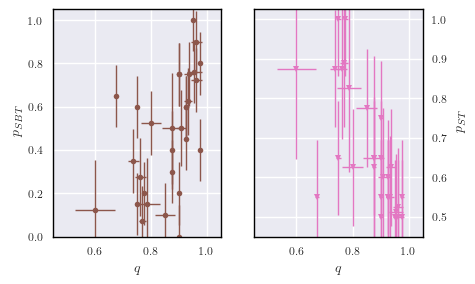

In [168]:
width = 345
figsize = set_size(width)
figsize = (figsize[0] , figsize[1] )
fig, axes = plt.subplots(1, 2, figsize=figsize)

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
# large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]


cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

# for i, col in enumerate(cols):
    # col_std = cols_std[i]
for j, (ind, net) in enumerate(df2_high_bests.iterrows()):

    axes[0].errorbar(net.q, net.p, yerr = net.ps_std, xerr = net.q_std, marker = 'o',color = high_colors[0])
    axes[1].errorbar(net.q, net.ps, yerr = net.ps_std, xerr = net.q_std, marker = 'v',color = high_colors[1])
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

# axes[0].set_xticks([0])
# axes[0].set_xticklabels([r'$q$'])
axes[0].set_xlim([0.45,1.05])
axes[1].set_xlim([0.45,1.05])

axes[0].set_ylim([0., 1.05])
axes[1].set_ylim([0.45, 1.025])

axes[0].set_xlabel(r'$q$')
axes[1].set_xlabel(r'$q$')
axes[0].set_ylabel(r'$p_{SBT}$')
axes[1].set_ylabel(r'$p_{ST}$')

# # axes[1].set_xticks([0,1.])
# axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
# axes[1].set_xlim([0,1])
axes[1].yaxis.tick_right()
# axes[1].set_ylabel(r'$p_{ST}$')
axes[1].yaxis.set_label_position("right")

In [52]:
inds_to_large_tg_dens = ['t11_4_1', 't11_4_2', 't11_4_3', 't11_4_4', 't11_8_4', 't11_8_3']
# df2_high_bests.loc[df2_high_bests.index not in inds_to_large_tg_dens]
good_inds = [not(ind in inds_to_large_tg_dens) for i, ind in enumerate(df2_high_bests.index) ]
df2_high_bests.loc[good_inds]

,q,p,ps,rho,tr0,tr1,tr2,tr3,tr4,tr5,...,rho_std,tr0_std,tr1_std,tr2_std,tr3_std,tr4_std,tr5_std,tr6_std,tr7_std,repetitions
school,,,,,,,,,,,,,,,,,,,,,
t11_10_1,0.900000,0.0000,0.7500,0.873860,0.004580,0.027000,0.007756,0.062953,0.014008,0.046471,...,0.021034,0.002023,0.008118,0.002708,0.013946,0.004499,0.009069,0.014697,0.048440,1
t11_10_2,0.962500,0.7250,0.5250,0.731951,0.031651,0.091444,0.021266,0.130140,0.048538,0.063170,...,0.019184,0.006102,0.007838,0.003678,0.008270,0.006722,0.004953,0.008012,0.032862,2
t11_10_3,0.956250,0.7625,0.5125,0.678185,0.046147,0.119032,0.026963,0.130599,0.064236,0.063624,...,0.012519,0.005753,0.007307,0.002782,0.004829,0.005993,0.003310,0.007356,0.025149,5
t11_10_4,0.933333,0.6250,0.5500,0.755349,0.025068,0.081036,0.020771,0.111955,0.042769,0.066822,...,0.009858,0.002731,0.004465,0.002019,0.004572,0.003436,0.003031,0.005318,0.020142,8
t11_9_1,0.750000,0.1500,1.0000,0.921573,0.000891,0.008887,0.003647,0.033412,0.005782,0.029956,...,0.009831,0.000348,0.002368,0.001053,0.006608,0.001345,0.005754,0.007594,0.023203,2
t11_9_2,0.850000,0.1000,0.7750,0.844948,0.007948,0.041151,0.012871,0.081448,0.020285,0.062451,...,0.020638,0.002473,0.006663,0.003221,0.010204,0.004981,0.007256,0.012084,0.041454,2
t11_9_3,0.975000,0.8000,0.5000,0.742375,0.047138,0.129795,0.010878,0.098350,0.047165,0.037083,...,0.029739,0.015242,0.033465,0.004316,0.015873,0.015642,0.010346,0.018126,0.054709,1
t11_9_4,0.900000,0.7500,0.5500,0.935037,0.001804,0.013196,0.002364,0.035896,0.008060,0.023950,...,0.016122,0.001409,0.006101,0.001571,0.015041,0.002827,0.009208,0.014720,0.045565,1
t11_8_1,0.937500,0.7500,0.6250,0.972693,0.000391,0.003387,0.000710,0.011020,0.001730,0.008970,...,0.008539,0.000351,0.002639,0.000663,0.005945,0.001105,0.004407,0.006969,0.019476,2


Text(0, 0.5, '${\\bigtriangledown}~p_{ST}$')

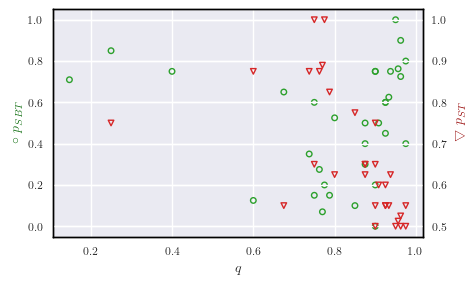

In [99]:
diff_axes = True

width = 345
figsize = set_size(width)
figsize = (figsize[0] , figsize[1] )
fig, axes = plt.subplots(1, 1, figsize=figsize)

large_colors = sns.color_palette("tab10").as_hex()[2:5]

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
# large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]

if diff_axes:
    ax2 = axes.twinx()
else:
    ax2 = axes

cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

# for i, col in enumerate(cols):
    # col_std = cols_std[i]
for j, (ind, net) in enumerate(df2_high_bests.iterrows()):

    axes.scatter(net.q, net.p, marker = 'o',edgecolor = large_colors[0], facecolor = 'none', linestyle = '')
    ax2.scatter(net.q, net.ps,  marker = 'v',color = large_colors[1], facecolor = 'none', linestyle = '')
    
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

# axes[0].set_xticks([0])
# axes[0].set_xticklabels([r'$q$'])
# axes.set_xlim([0.55,1.05])
# axes.set_xlim([0.45,1.05])

# axes.set_ylim([0., 1.05])
if diff_axes:
    ylims = axes.get_ylim()
    ax2.set_ylim([0.5 + ylims[0]/2, (ylims[1]-1)/2 + 1])

# # axes[1].set_xticks([0,1.])
# axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
# axes[1].set_xlim([0,1])
# axes[1].yaxis.tick_right()
# axes[1].set_ylabel(r'$p_{ST}$')
# axes[1].yaxis.set_label_position("right")

axes.set_xlabel(r'$q$')
# axes[1].set_xlabel(r'$q$')
axes.set_ylabel(r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75))
ax2.set_ylabel(r'${\bigtriangledown}~p_{ST}$', color = scale_lightness(large_colors[1], 0.75))

In [53]:
x = sm.add_constant(df2_high_bests.loc[good_inds].q)

y_sbt = df2_high_bests.loc[good_inds].p
y_st = df2_high_bests.loc[good_inds].ps

model_sbt = sm.OLS(y_sbt, x)
results_sbt = model_sbt.fit()

model_st = sm.OLS(y_st, x)
results_st = model_st.fit()

print(results_st.summary())

                            OLS Regression Results                            
Dep. Variable:                     ps   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     103.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.26e-10
Time:                        13:37:26   Log-Likelihood:                 34.328
No. Observations:                  27   AIC:                            -64.66
Df Residuals:                      25   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3083      0.163     14.194      0.0

Text(0, 0.5, '${\\bigtriangledown}~p_{ST}$')

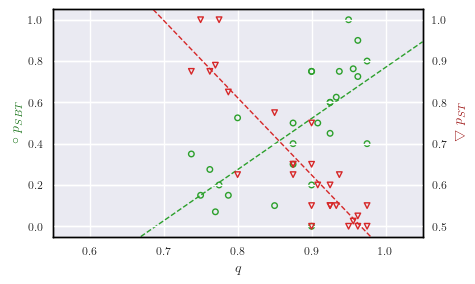

In [59]:
diff_axes = True

width = 345
figsize = set_size(width)
figsize = (figsize[0] , figsize[1] )
fig, axes = plt.subplots(1, 1, figsize=figsize)

large_colors = sns.color_palette("tab10").as_hex()[2:5]

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
# large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]

if diff_axes:
    ax2 = axes.twinx()
else:
    ax2 = axes

cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

# for i, col in enumerate(cols):
    # col_std = cols_std[i]
for j, (ind, net) in enumerate(df2_high_bests.loc[good_inds].iterrows()):

    axes.scatter(net.q, net.p, marker = 'o',edgecolor = large_colors[0], facecolor = 'none', linestyle = '')
    ax2.scatter(net.q, net.ps,  marker = 'v',color = large_colors[1], facecolor = 'none', linestyle = '')
    
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

ylims = axes.get_ylim()

b, m = results_sbt.params
axes.axline(xy1=(0, b), slope=m, label=None, color = large_colors[0], linestyle = '--')

axes.set_ylim(ylims)

b, m = results_st.params
ax2.axline(xy1=(0, b), slope=m, label=None, color = large_colors[1], linestyle = '--')

# axes[0].set_xticks([0])
# axes[0].set_xticklabels([r'$q$'])
axes.set_xlim([0.55,1.05])
# axes.set_xlim([0.45,1.05])

# axes.set_ylim([0., 1.05])
if diff_axes:
    ylims = axes.get_ylim()
    ax2.set_ylim([0.5 + ylims[0]/2, (ylims[1]-1)/2 + 1])

# # axes[1].set_xticks([0,1.])
# axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
# axes[1].set_xlim([0,1])
# axes[1].yaxis.tick_right()
# axes[1].set_ylabel(r'$p_{ST}$')
# axes[1].yaxis.set_label_position("right")

axes.set_xlabel(r'$q$')
# axes[1].set_xlabel(r'$q$')
axes.set_ylabel(r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75))
ax2.set_ylabel(r'${\bigtriangledown}~p_{ST}$', color = scale_lightness(large_colors[1], 0.75))

In [100]:
df2_high_bests

,q,p,ps,rho,tr0,tr1,tr2,tr3,tr4,tr5,...,rho_std,tr0_std,tr1_std,tr2_std,tr3_std,tr4_std,tr5_std,tr6_std,tr7_std,repetitions
school,,,,,,,,,,,,,,,,,,,,,
t11_10_1,0.900000,0.000000,0.750000,0.873860,0.004580,0.027000,0.007756,0.062953,0.014008,0.046471,...,0.021034,0.002023,0.008118,0.002708,0.013946,0.004499,0.009069,0.014697,0.048440,1
t11_10_2,0.962500,0.725000,0.525000,0.731951,0.031651,0.091444,0.021266,0.130140,0.048538,0.063170,...,0.019184,0.006102,0.007838,0.003678,0.008270,0.006722,0.004953,0.008012,0.032862,2
t11_10_3,0.956250,0.762500,0.512500,0.678185,0.046147,0.119032,0.026963,0.130599,0.064236,0.063624,...,0.012519,0.005753,0.007307,0.002782,0.004829,0.005993,0.003310,0.007356,0.025149,5
t11_10_4,0.933333,0.625000,0.550000,0.755349,0.025068,0.081036,0.020771,0.111955,0.042769,0.066822,...,0.009858,0.002731,0.004465,0.002019,0.004572,0.003436,0.003031,0.005318,0.020142,8
t11_9_1,0.750000,0.150000,1.000000,0.921573,0.000891,0.008887,0.003647,0.033412,0.005782,0.029956,...,0.009831,0.000348,0.002368,0.001053,0.006608,0.001345,0.005754,0.007594,0.023203,2
t11_9_2,0.850000,0.100000,0.775000,0.844948,0.007948,0.041151,0.012871,0.081448,0.020285,0.062451,...,0.020638,0.002473,0.006663,0.003221,0.010204,0.004981,0.007256,0.012084,0.041454,2
t11_9_3,0.975000,0.800000,0.500000,0.742375,0.047138,0.129795,0.010878,0.098350,0.047165,0.037083,...,0.029739,0.015242,0.033465,0.004316,0.015873,0.015642,0.010346,0.018126,0.054709,1
t11_9_4,0.900000,0.750000,0.550000,0.935037,0.001804,0.013196,0.002364,0.035896,0.008060,0.023950,...,0.016122,0.001409,0.006101,0.001571,0.015041,0.002827,0.009208,0.014720,0.045565,1
t11_8_1,0.937500,0.750000,0.625000,0.972693,0.000391,0.003387,0.000710,0.011020,0.001730,0.008970,...,0.008539,0.000351,0.002639,0.000663,0.005945,0.001105,0.004407,0.006969,0.019476,2


Text(0, 0.5, '$p_{ST}$')

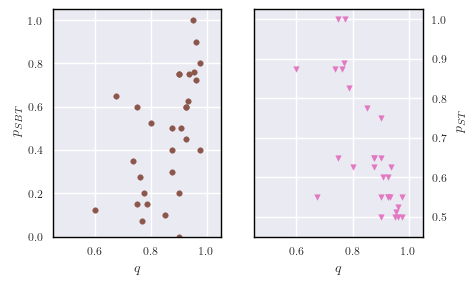

In [169]:
width = 345
figsize = set_size(width)
figsize = (figsize[0] , figsize[1] )
fig, axes = plt.subplots(1, 2, figsize=figsize)

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
# large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]


cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

# for i, col in enumerate(cols):
    # col_std = cols_std[i]
for j, (ind, net) in enumerate(df2_high_bests.iterrows()):

    axes[0].scatter(net.q, net.p, marker = 'o',color = high_colors[0])
    axes[1].scatter(net.q, net.ps,  marker = 'v',color = high_colors[1])
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

# axes[0].set_xticks([0])
# axes[0].set_xticklabels([r'$q$'])
axes[0].set_xlim([0.45,1.05])
axes[1].set_xlim([0.45,1.05])

axes[0].set_ylim([0., 1.05])
axes[1].set_ylim([0.45, 1.025])

# # axes[1].set_xticks([0,1.])
# axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
# axes[1].set_xlim([0,1])
axes[1].yaxis.tick_right()
# axes[1].set_ylabel(r'$p_{ST}$')
axes[1].yaxis.set_label_position("right")

axes[0].set_xlabel(r'$q$')
axes[1].set_xlabel(r'$q$')
axes[0].set_ylabel(r'$p_{SBT}$')
axes[1].set_ylabel(r'$p_{ST}$')

Text(0, 0.5, '$p_{ST}$')

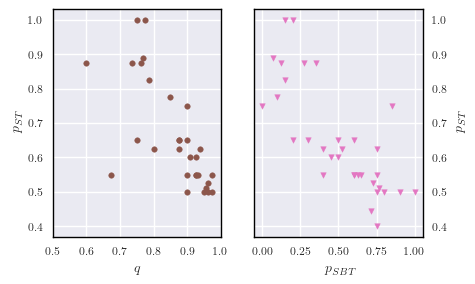

In [172]:
width = 345
figsize = set_size(width)
figsize = (figsize[0] , figsize[1] )
fig, axes = plt.subplots(1, 2, figsize=figsize)

# large_bests = pd.concat([wiki_high_bests, slash_high_bests, epi_high_bests])
# large_bests2 = [wiki_high_bests, slash_high_bests, epi_high_bests]


cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

r1 = np.array([-0.05, 0, 0.05]) * 3

# for i, col in enumerate(cols):
    # col_std = cols_std[i]
for j, (ind, net) in enumerate(df2_high_bests.iterrows()):

    axes[0].scatter(net.q, net.ps, marker = 'o',color = high_colors[0])
    axes[1].scatter(net.p, net.ps,  marker = 'v',color = high_colors[1])
# plt.errorbar(x + 1 + r1, large_bests.p, large_bests.p_std, marker = 'o')

# axes[0].set_xticks([0])
# axes[0].set_xticklabels([r'$q$'])
# axes[0].set_xlim([0.45,1.05])
# axes[1].set_xlim([0.45,1.05])

axes[0].set_xlim([0.5, 1.0])
# axes[1].set_ylim([0.45, 1.025])

# # axes[1].set_xticks([0,1.])
# axes[1].set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
# axes[1].set_xlim([0,1])
axes[1].yaxis.tick_right()
# axes[1].set_ylabel(r'$p_{ST}$')
axes[1].yaxis.set_label_position("right")
axes[0].set_xlabel(r'$q$')
axes[0].set_ylabel(r'$p_{ST}$')
axes[1].set_xlabel(r'$p_{SBT}$')
axes[1].set_ylabel(r'$p_{ST}$')

## Combining tohave 4 panels

/tmp/ipykernel_352577/1660784313.py:161: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
/tmp/ipykernel_352577/1660784313.py:265: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  [ax1.get_shared_y_axes().remove(axis) for axis in axes.ravel()]
/tmp/ipykernel_352577/1660784313.py:398: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


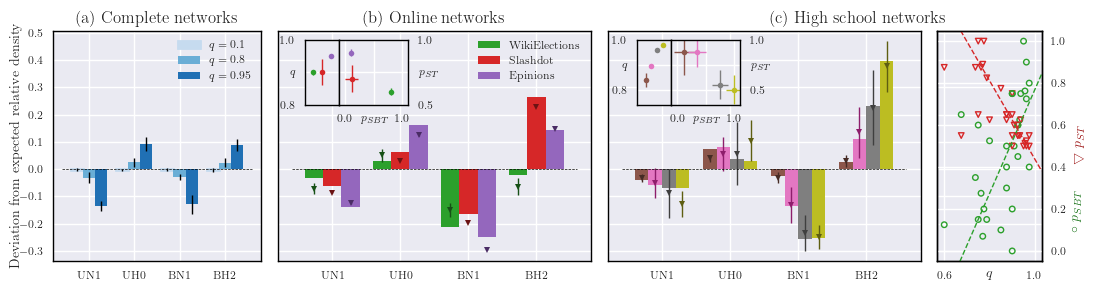

In [62]:

"""Let us have moved values around 0. 
"""

save_ = True
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl3"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
# group_size = 7
add_sim_ticks = True
show_error = True
all_triads_flag = False

large_inset = True
high_inset = True
psbt_vs_pst = True

high_schools_choice = schools_t11_2 # schools_t11_2 or best_high_schools or chosen_high_schools
high_schools_choice = schools_t11_9 
high_schools_choice = best_high_schools
# high_schools_choice = chosen_high_schools
# high_schools_choice = chosen_high_schools12
# high_schools_choice = chosen_high_schools13
high_schools_choice = chosen_high_schools14
# high_schools_choice = chosen_high_schools2
# high_schools_choice = chosen_high_schools32

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3

# plot_param_width = 0.15
# plot_param_m = 1
plot_param_total_width = 0.8
plot_param_single_width = 1.

cmpl_pos = 0
large_pos = 1
high_pos = 2
psbt_pst_pos = 3

# wiki_pos = 0
# slash_pos = 1
# epinions_pos = 2

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 2.4 , figsize[1] * 1.1)
fig, axes = plt.subplots(1, 4, figsize=figsize, sharey=True, gridspec_kw={'width_ratios': [2,3,3,1]})
# fig, axes = plt.subplots(1, 4, figsize=figsize, gridspec_kw={'width_ratios': [2,3,3,2]})

all_sets = [n1_triads, n2_triads]
if all_triads_flag:
    # all_triads = [*n1_triads, *n2_triads]
    all_triads = ["tr2", "tr6", "tr3", "tr5", "tr1", "tr4"]
else:
    all_triads = ["tr5", "tr6", "tr2", "tr1"]

# Simulated nets
cmpl_colors = sns.color_palette("Blues", 3).as_hex()

ydata, yerr = prepare_data3(mean_data.transpose(), all_sets, all_triads, std_data.transpose(), "", "", "", fun_prepare_data)
# triads_set = n1_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")
# triads_set = n2_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")

if not show_error:
    yerr = None

# reordering
qs = ydata.columns.values
inds = qs.argsort()
qs = qs[inds]
ydata = ydata[qs]
if yerr is not None:
    yerr = yerr[qs]

cmpl_labels = [r'$q={q}$'.format(q=round(q,2)) for q in qs]

title = r'(a) Complete networks'
plot_bar_nets(axes[cmpl_pos], ydata, yerr, all_triads, title, 
              labels = cmpl_labels, line_level = line_level, 
              linewidth = linewidth, colors=cmpl_colors, 
              smallest_edge = True, legend_elem = 1,
              total_width=plot_param_total_width, single_width=plot_param_single_width)

axes[cmpl_pos].legend(loc='best')


############# Wiki, Epinions, Slashdot

large_colors = sns.color_palette("tab10").as_hex()[2:5]

large_data = pd.concat([wiki, slash, epinions])
ydata, yerr = prepare_data3(large_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

large_labels = [r"WikiElections", r"Slashdot", r"Epinions"]

# fitting
# df2_wrho_correct_g
sim_large_data = pd.concat([df2_wrho_correct_g.iloc[[inds_wiki[0]]], df2_srho_correct_g.iloc[inds_slash], df2_erho_correct_g.iloc[inds_epinions]], join = "inner")
sim_ydata, sim_yerr = prepare_data3(sim_large_data, all_sets, all_triads, sim_large_data, addon = addon, std_addon = "_std3", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns


plot_bar_nets(axes[large_pos], ydata, None, all_triads, r"(b) Online networks", labels = large_labels, 
              line_level = line_level, colors=large_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

if not large_inset:
    axes[large_pos].legend(loc='upper left')
    # lower right

    axes[large_pos].text(x = 1.2, y = 0.42, s = param_labels[0], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.36, s = param_labels[1], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.3, s = param_labels[2], fontsize = 'small')
else:
    axes[large_pos].legend(loc='upper right')

    df_bests = [wiki_high_bests, slash_high_bests, epi_high_bests]

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.41, 0.65, 0.03, 0.2]
    if len(axes) == 4:
        high_ins_left = 0.30
    
    ax21 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax21, df_bests, cols, large_colors)
    ax21.set_yticks([0.8, 0.9, 1.])
    ax21.set_yticklabels([r'0.8', r'$q$', r'1.0'])
    ax21.set_xticks([])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = 0.06

    ax22 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax22, df_bests, cols, large_colors, 2, False)
    else:
        for j, net in enumerate(df_bests):
            ax22.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = large_colors[j])
            ax22.set_xticks([0, 0.5, 1])
            ax22.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax22.set_xlim([-0.1,1.1])
            ax22.set_ylim([0.5,1])
            ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax22.yaxis.tick_right()
            # ax22.set_ylabel(r'$p_{ST}$')
            # ax22.yaxis.set_label_position("right")

############# Spanish

high_colors = sns.color_palette("tab10").as_hex()[5:10]

high_data = pd.concat(real_datasets_all).loc[high_schools_choice]
ydata, yerr = prepare_data3(high_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

high_labels = [r"A", r"B", r"C", r"D"]

# fitting
# df2_wrho_correct_g
# sim_high_data = pd.concat(df2_high_bests.loc[high_schools_choice], join = "inner")
sim_high_data = df2_high_bests.loc[high_schools_choice]
sim_ydata, sim_yerr = prepare_data3(sim_high_data, all_sets, all_triads, sim_high_data, addon = "", err_addon = "", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[1],3):.3f}',p=f'{round(col[2],2):.2f}',ps=f'{round(col[3],2):.2f}') for col in sim_ydata.columns]
# param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

labels = [hl + ": " + pl for hl, pl in zip(high_labels,param_labels)]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns

plot_bar_nets(axes[high_pos], ydata, None, all_triads, r"(c) High school networks", labels = labels, 
              line_level = line_level, colors=high_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

axes[high_pos].set_title(r"(c) High school networks", y=1.0, x = 0.8)

if axes[high_pos].get_ylim()[1] < 0.5:
    ylims = axes[high_pos].get_ylim()
    axes[high_pos].set_ylim([ylims[0], ylims[1] + 0.1])

if not high_inset:
    axes[high_pos].legend(loc='upper left')
    # lower right
else:
    # axes[high_pos].legend(loc='upper right')

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.718, 0.65, 0.03, 0.2]
    if len(axes) == 4:
        high_ins_left = 0.59
    ax31 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax31, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors)

    ax31.set_ylim([0.5, 1.])
    ax31.set_yticks([0.5, 0.75, 1.])
    ax31.set_yticklabels([r'0.8', r'$q$', r'1.0'])
    ax31.set_xticks([])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = 0.06

    ax32 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax32, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors, 2, False)
    else:
        for j, (ind, net) in enumerate(sim_high_data.iterrows()):
            ax32.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = high_colors[j])
            ax32.set_xticks([0, 0.5, 1])
            ax32.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax32.set_xlim([-0.1,1.1])
            ax32.set_ylim([0.35,1])
            ax31.set_ylim([0.35,1])
            # ax32.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax32.yaxis.tick_right()
            ax32.set_yticks([0.5, 0.75, 1])
            ax32.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            # ax32.set_ylabel(r'$p_{ST}$', rotation=0)
            # ax32.yaxis.set_label_position("right")
            # ax32.yaxis.set_label_coords(1.3,0.65)
            
            
            # ax22.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            # ax22.set_xlim([-0.1,1.1])
            # ax22.set_ylim([0.5,1])
            # ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            # ax22.yaxis.tick_right()


################### q vs psbt,pst ###############
diff_axes = True

bbox = axes[psbt_pst_pos].get_position()
# begs = bbox[0]
# ends = bbox[1]
# high_ins_left, high_ins_bottom = begs
# high_ins_width = ends[0] - high_ins_left
# high_ins_height = ends[1] - high_ins_bottom

high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = bbox.bounds
# ax1 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])
ax1 = axes[psbt_pst_pos]
[ax1.get_shared_y_axes().remove(axis) for axis in axes.ravel()]

# ax1 = fig.add_subplot(155, position = [0.8, 0.11, 0.2, 0.77])
if diff_axes:
    ax2 = ax1.twinx()
else:
    ax2 = ax1

cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

# for j, (ind, net) in enumerate(df2_high_bests.loc[good_inds].iterrows()):
for j, (ind, net) in enumerate(df2_high_bests.iterrows()):

    ax2.scatter(net.q, net.p, marker = 'o',edgecolor = large_colors[0], facecolor = 'none', linestyle = '',)
    ax2.scatter(net.q, net.ps,  marker = 'v',color = large_colors[1], facecolor = 'none', linestyle = '',)


# ax2.scatter(df2_high_bests.loc[good_inds].q, df2_high_bests.loc[good_inds].p, marker = 'o',
#             edgecolor = large_colors[0], facecolor = 'none', linestyle = '', label = r'$p_{SBT}$')
# ax2.scatter(df2_high_bests.loc[good_inds].q, df2_high_bests.loc[good_inds].ps,  marker = 'v',
#             color = large_colors[1], facecolor = 'none', linestyle = '', label = r'$p_{ST}$')
    
ylims = ax2.get_ylim()

b, m = results_sbt.params
ax2.axline(xy1=(0, b), slope=m, label=None, color = large_colors[0], linestyle = '--')


b, m = results_st.params
ax2.axline(xy1=(0, b), slope=m, label=None, color = large_colors[1], linestyle = '--')

ax2.set_ylim(ylims)


# ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0.57, 1.03])
ax1.set_xticks([0.6, 1.])

# ax1.yaxis.set_tick_params(which='both', labelbottom=True)
# ax1.set_yticks([0,0.2, 0.4, 0.6, 0.8, 1.])
# ax1.get_yaxis().set_visible(True)

# axes.set_ylim([0., 1.05])
# if diff_axes:
#     ylims = ax1.get_ylim()
#     ax2.set_ylim([0.5 + ylims[0]/2, (ylims[1]-1)/2 + 1])


ax1.set_xlabel(r'$q$', labelpad = -10)
# axes[1].set_xlabel(r'$q$')
# ax1.set_ylabel(r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75))
ax2.set_ylabel(r'${\bigtriangledown}~p_{ST}$', color = scale_lightness(large_colors[1], 0.75))
pst_pos = ax2.yaxis.get_label().get_position()
# ax2.text(pst_pos[0], pst_pos[1], r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75), rotation = 90)

ax2.text(1.15,0.1, r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75), rotation = 90)

# ax2.legend(ncol = 2, bbox_to_anchor=(1.1, 1.05), rotation = 90)


# # fix tick rotations
# for ax in axes.flatten():
#     for tick in ax.get_xticklabels():
#         tick.set_rotation(0)

# fix tick labels
axes_bars = [axes[cmpl_pos], axes[large_pos], axes[high_pos]]
for ax in axes_bars:
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])

for i, ax in enumerate(axes_bars):
    # if i != 0: 
    ax.set_ylabel("")
    
# ticks = axes[i].get_yticklabels()
# ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal" and fun_prepare_data == prepare_data5:
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[0].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[0].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_4p_v5'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if not show_error:
    fname = fname + "_noterr"
# if show_rho:
#     fname = fname + "_rho"
if all_triads_flag:
    fname = fname + "_all" 
if fun_prepare_data == prepare_data4:
    fname += "_nodev"
    
if large_inset and high_inset:
    fname += "_b"
elif not large_inset:
    fname += "_h"
if psbt_vs_pst:
    fname += "_vs"
    
if high_schools_choice == schools_t11_2:
    fname += "_t11_2"
elif high_schools_choice == schools_t11_9:
    fname += "_t11_9"
elif high_schools_choice == best_high_schools:
    fname += "_best"
elif high_schools_choice == chosen_high_schools:
    fname += "_chosen"
elif high_schools_choice == chosen_high_schools12:
    fname += "_chosen12"
elif high_schools_choice == chosen_high_schools13:
    fname += "_chosen13"
elif high_schools_choice == chosen_high_schools14:
    fname += "_chosen14"
elif high_schools_choice == chosen_high_schools2:
    fname += "_chosen2"
elif high_schools_choice == chosen_high_schools32:
    fname += "_chosen32"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

/tmp/ipykernel_439565/454484546.py:161: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
/tmp/ipykernel_439565/454484546.py:266: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  [ax1.get_shared_y_axes().remove(axis) for axis in axes.ravel()]
/tmp/ipykernel_439565/454484546.py:400: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


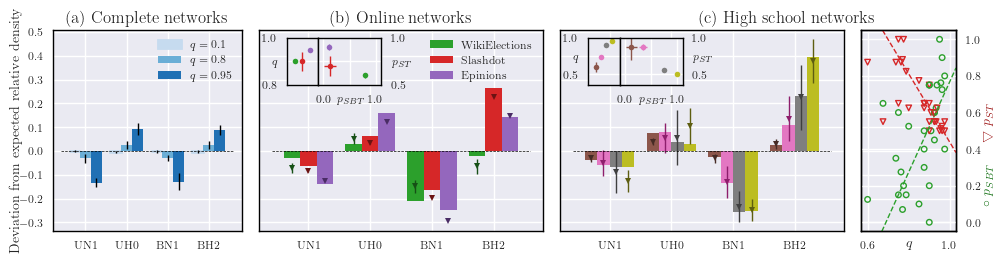

In [55]:

"""Let us have moved values around 0. 
"""

save_ = True
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl3"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
# group_size = 7
add_sim_ticks = True
show_error = True
all_triads_flag = False

large_inset = True
high_inset = True
psbt_vs_pst = True

high_schools_choice = schools_t11_2 # schools_t11_2 or best_high_schools or chosen_high_schools
high_schools_choice = schools_t11_9 
high_schools_choice = best_high_schools
# high_schools_choice = chosen_high_schools
# high_schools_choice = chosen_high_schools12
# high_schools_choice = chosen_high_schools13
high_schools_choice = chosen_high_schools14
# high_schools_choice = chosen_high_schools2
# high_schools_choice = chosen_high_schools32

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3

# plot_param_width = 0.15
# plot_param_m = 1
plot_param_total_width = 0.8
plot_param_single_width = 1.

cmpl_pos = 0
large_pos = 1
high_pos = 2
psbt_pst_pos = 3

# wiki_pos = 0
# slash_pos = 1
# epinions_pos = 2

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 2.2 , figsize[1])
fig, axes = plt.subplots(1, 4, figsize=figsize, sharey=True, gridspec_kw={'width_ratios': [2,3,3,1]})
# fig, axes = plt.subplots(1, 4, figsize=figsize, gridspec_kw={'width_ratios': [2,3,3,2]})

all_sets = [n1_triads, n2_triads]
if all_triads_flag:
    # all_triads = [*n1_triads, *n2_triads]
    all_triads = ["tr2", "tr6", "tr3", "tr5", "tr1", "tr4"]
else:
    all_triads = ["tr5", "tr6", "tr2", "tr1"]

# Simulated nets
cmpl_colors = sns.color_palette("Blues", 3).as_hex()

ydata, yerr = prepare_data3(mean_data.transpose(), all_sets, all_triads, std_data.transpose(), "", "", "", fun_prepare_data)
# triads_set = n1_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")
# triads_set = n2_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")

if not show_error:
    yerr = None

# reordering
qs = ydata.columns.values
inds = qs.argsort()
qs = qs[inds]
ydata = ydata[qs]
if yerr is not None:
    yerr = yerr[qs]

cmpl_labels = [r'$q={q}$'.format(q=round(q,2)) for q in qs]

title = r'(a) Complete networks'
plot_bar_nets(axes[cmpl_pos], ydata, yerr, all_triads, title, 
              labels = cmpl_labels, line_level = line_level, 
              linewidth = linewidth, colors=cmpl_colors, 
              smallest_edge = True, legend_elem = 1,
              total_width=plot_param_total_width, single_width=plot_param_single_width)

axes[cmpl_pos].legend(loc='best')


############# Wiki, Epinions, Slashdot

large_colors = sns.color_palette("tab10").as_hex()[2:5]

large_data = pd.concat([wiki, slash, epinions])
ydata, yerr = prepare_data3(large_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

large_labels = [r"WikiElections", r"Slashdot", r"Epinions"]

# fitting
# df2_wrho_correct_g
sim_large_data = pd.concat([df2_wrho_correct_g.iloc[[inds_wiki[0]]], df2_srho_correct_g.iloc[inds_slash], df2_erho_correct_g.iloc[inds_epinions]], join = "inner")
sim_ydata, sim_yerr = prepare_data3(sim_large_data, all_sets, all_triads, sim_large_data, addon = addon, std_addon = "_std3", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns


plot_bar_nets(axes[large_pos], ydata, None, all_triads, r"(b) Online networks", labels = large_labels, 
              line_level = line_level, colors=large_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

if not large_inset:
    axes[large_pos].legend(loc='upper left')
    # lower right

    axes[large_pos].text(x = 1.2, y = 0.42, s = param_labels[0], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.36, s = param_labels[1], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.3, s = param_labels[2], fontsize = 'small')
else:
    axes[large_pos].legend(loc='upper right')

    df_bests = [wiki_high_bests, slash_high_bests, epi_high_bests]

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.41, 0.68, 0.03, 0.16]
    if len(axes) == 4:
        high_ins_left = 0.31
    
    ax21 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax21, df_bests, cols, large_colors)
    ax21.set_yticks([0.8, 0.9, 1.])
    ax21.set_yticklabels([r'0.8', r'$q$', r'1.0'])
    ax21.set_xticks([])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = 0.06

    ax22 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax22, df_bests, cols, large_colors, 2, False)
    else:
        for j, net in enumerate(df_bests):
            ax22.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = large_colors[j])
            ax22.set_xticks([0, 0.5, 1])
            ax22.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax22.set_xlim([-0.1,1.1])
            ax22.set_ylim([0.5,1])
            ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax22.yaxis.tick_right()
            # ax22.set_ylabel(r'$p_{ST}$')
            # ax22.yaxis.set_label_position("right")

############# Spanish

high_colors = sns.color_palette("tab10").as_hex()[5:10]

high_data = pd.concat(real_datasets_all).loc[high_schools_choice]
ydata, yerr = prepare_data3(high_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

high_labels = [r"A", r"B", r"C", r"D"]

# fitting
# df2_wrho_correct_g
# sim_high_data = pd.concat(df2_high_bests.loc[high_schools_choice], join = "inner")
sim_high_data = df2_high_bests.loc[high_schools_choice]
sim_ydata, sim_yerr = prepare_data3(sim_high_data, all_sets, all_triads, sim_high_data, addon = "", err_addon = "", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[1],3):.3f}',p=f'{round(col[2],2):.2f}',ps=f'{round(col[3],2):.2f}') for col in sim_ydata.columns]
# param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

labels = [hl + ": " + pl for hl, pl in zip(high_labels,param_labels)]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns

plot_bar_nets(axes[high_pos], ydata, None, all_triads, r"(c) High school networks", labels = labels, 
              line_level = line_level, colors=high_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

axes[high_pos].set_title(r"(c) High school networks", y=1.0, x = 0.8)

if axes[high_pos].get_ylim()[1] < 0.5:
    ylims = axes[high_pos].get_ylim()
    axes[high_pos].set_ylim([ylims[0], ylims[1] + 0.1])

if not high_inset:
    axes[high_pos].legend(loc='upper left')
    # lower right
else:
    # axes[high_pos].legend(loc='upper right')

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.718, 0.68, 0.03, 0.16]
    if len(axes) == 4:
        
        high_ins_left = 0.597
    ax31 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax31, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors)

    ax31.set_ylim([0.5, 1.])
    ax31.set_yticks([0.5, 0.75, 1.])
    ax31.set_yticklabels([r'0.5', r'$q$', r'1.0'])
    ax31.set_xticks([])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = 0.06

    ax32 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax32, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors, 2, False)
    else:
        for j, (ind, net) in enumerate(sim_high_data.iterrows()):
            ax32.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = high_colors[j])
            ax32.set_xticks([0, 0.5, 1])
            ax32.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax32.set_xlim([-0.1,1.1])
            ax32.set_ylim([0.35,1])
            ax31.set_ylim([0.35,1])
            # ax32.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax32.yaxis.tick_right()
            ax32.set_yticks([0.5, 0.75, 1])
            ax32.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            # ax32.set_ylabel(r'$p_{ST}$', rotation=0)
            # ax32.yaxis.set_label_position("right")
            # ax32.yaxis.set_label_coords(1.3,0.65)
            
            
            # ax22.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            # ax22.set_xlim([-0.1,1.1])
            # ax22.set_ylim([0.5,1])
            # ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            # ax22.yaxis.tick_right()


################### q vs psbt,pst ###############
diff_axes = True

bbox = axes[psbt_pst_pos].get_position()
# begs = bbox[0]
# ends = bbox[1]
# high_ins_left, high_ins_bottom = begs
# high_ins_width = ends[0] - high_ins_left
# high_ins_height = ends[1] - high_ins_bottom

high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = bbox.bounds
# ax1 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])
ax1 = axes[psbt_pst_pos]
[ax1.get_shared_y_axes().remove(axis) for axis in axes.ravel()]

# ax1 = fig.add_subplot(155, position = [0.8, 0.11, 0.2, 0.77])
if diff_axes:
    ax2 = ax1.twinx()
else:
    ax2 = ax1

cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

# for j, (ind, net) in enumerate(df2_high_bests.loc[good_inds].iterrows()):
for j, (ind, net) in enumerate(df2_high_bests.iterrows()):

    ax2.scatter(net.q, net.p, marker = 'o',edgecolor = large_colors[0], facecolor = 'none', linestyle = '',)
    ax2.scatter(net.q, net.ps,  marker = 'v',color = large_colors[1], facecolor = 'none', linestyle = '',)


# ax2.scatter(df2_high_bests.loc[good_inds].q, df2_high_bests.loc[good_inds].p, marker = 'o',
#             edgecolor = large_colors[0], facecolor = 'none', linestyle = '', label = r'$p_{SBT}$')
# ax2.scatter(df2_high_bests.loc[good_inds].q, df2_high_bests.loc[good_inds].ps,  marker = 'v',
#             color = large_colors[1], facecolor = 'none', linestyle = '', label = r'$p_{ST}$')
    
ylims = ax2.get_ylim()

b, m = results_sbt.params
ax2.axline(xy1=(0, b), slope=m, label=None, color = large_colors[0], linestyle = '--')


b, m = results_st.params
ax2.axline(xy1=(0, b), slope=m, label=None, color = large_colors[1], linestyle = '--')

ax2.set_ylim(ylims)


# ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0.57, 1.03])
ax1.set_xticks([0.6, 1.])

# ax1.yaxis.set_tick_params(which='both', labelbottom=True)
# ax1.set_yticks([0,0.2, 0.4, 0.6, 0.8, 1.])
# ax1.get_yaxis().set_visible(True)

# axes.set_ylim([0., 1.05])
# if diff_axes:
#     ylims = ax1.get_ylim()
#     ax2.set_ylim([0.5 + ylims[0]/2, (ylims[1]-1)/2 + 1])


ax1.set_xlabel(r'$q$', labelpad = -10)
# axes[1].set_xlabel(r'$q$')
# ax1.set_ylabel(r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75))
# ax2.set_ylabel(r'${\bigtriangledown}~p_{ST}$', color = scale_lightness(large_colors[1], 0.75))
# pst_pos = ax2.yaxis.get_label().get_position()
# ax2.text(pst_pos[0], pst_pos[1], r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75), rotation = 90)

ax2.text(1.15,0.1, r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75), rotation = 90)
ax2.text(1.15,0.45, r'${\bigtriangledown}~p_{ST}$', color = scale_lightness(large_colors[1], 0.75), rotation = 90)

# ax2.legend(ncol = 2, bbox_to_anchor=(1.1, 1.05), rotation = 90)


# # fix tick rotations
# for ax in axes.flatten():
#     for tick in ax.get_xticklabels():
#         tick.set_rotation(0)

# fix tick labels
axes_bars = [axes[cmpl_pos], axes[large_pos], axes[high_pos]]
for ax in axes_bars:
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])

for i, ax in enumerate(axes_bars):
    # if i != 0: 
    ax.set_ylabel("")
    
# ticks = axes[i].get_yticklabels()
# ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal" and fun_prepare_data == prepare_data5:
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[0].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[0].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_4p_v7'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if not show_error:
    fname = fname + "_noterr"
# if show_rho:
#     fname = fname + "_rho"
if all_triads_flag:
    fname = fname + "_all" 
if fun_prepare_data == prepare_data4:
    fname += "_nodev"
    
if large_inset and high_inset:
    fname += "_b"
elif not large_inset:
    fname += "_h"
if psbt_vs_pst:
    fname += "_vs"
    
if high_schools_choice == schools_t11_2:
    fname += "_t11_2"
elif high_schools_choice == schools_t11_9:
    fname += "_t11_9"
elif high_schools_choice == best_high_schools:
    fname += "_best"
elif high_schools_choice == chosen_high_schools:
    fname += "_chosen"
elif high_schools_choice == chosen_high_schools12:
    fname += "_chosen12"
elif high_schools_choice == chosen_high_schools13:
    fname += "_chosen13"
elif high_schools_choice == chosen_high_schools14:
    fname += "_chosen14"
elif high_schools_choice == chosen_high_schools2:
    fname += "_chosen2"
elif high_schools_choice == chosen_high_schools32:
    fname += "_chosen32"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

### Two rows

In [110]:
GridSpec

NameError: name 'GridSpec' is not defined

In [118]:
ax.set_pos

(0.2818181818181818, 0.4227272727272728)

In [160]:
bl, br

(Bbox([[0.125, 0.10999999999999999], [0.5477272727272726, 0.46]]),
 Bbox([[0.618181818181818, 0.10999999999999999], [0.8999999999999999, 0.46]]))

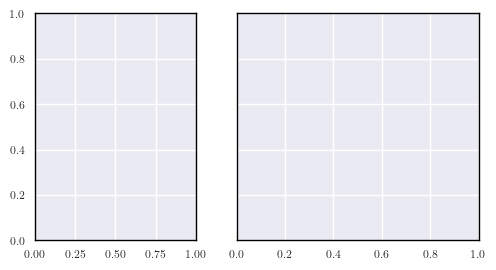

In [200]:
save_ = True
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl3"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
# group_size = 7
add_sim_ticks = True
show_error = True
all_triads_flag = False

large_inset = True
high_inset = True
psbt_vs_pst = True

high_schools_choice = schools_t11_2 # schools_t11_2 or best_high_schools or chosen_high_schools
high_schools_choice = schools_t11_9 
high_schools_choice = best_high_schools
# high_schools_choice = chosen_high_schools
# high_schools_choice = chosen_high_schools12
# high_schools_choice = chosen_high_schools13
high_schools_choice = chosen_high_schools14
# high_schools_choice = chosen_high_schools2
# high_schools_choice = chosen_high_schools32


if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3

# plot_param_width = 0.15
# plot_param_m = 1
plot_param_total_width = 0.8
plot_param_single_width = 1.

cmpl_pos = 0
large_pos = 1
high_pos = 2
psbt_pst_pos = 3

# wiki_pos = 0
# slash_pos = 1
# epinions_pos = 2

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.2 , figsize[1])
fig, axes_grid = plt.subplots(1, 2, figsize=figsize, sharey=True, gridspec_kw={'width_ratios': [2,3]})

axes = axes_grid.flatten()

# ax2_l = axes[2]
# ax2_r = axes[3]
# bl = ax2_l.get_position()
# br = ax2_r.get_position()
# # ?b.set_points
# bbl = bl.get_points()
# bbr = br.get_points()

# width_l = bbl[1,0] - bbl[0,0]
# width_r = bbr[1,0] - bbr[0,0]

# width_change = bbl[1,0] - (bbl[0,0] + width_r)
# bbl[1,0] = bbl[0,0] + width_r
# bbr[0,0] -= width_change
# bl.update_from_data_xy(bbl)
# br.update_from_data_xy(bbr)

# ax2_l.set_position(bl.bounds)
# ax2_r.set_position(br.bounds)
# fig, axes = plt.subplots(1, 4, figsize=figsize, gridspec_kw={'width_ratios': [2,3,3,2]})

all_sets = [n1_triads, n2_triads]
if all_triads_flag:
    # all_triads = [*n1_triads, *n2_triads]
    all_triads = ["tr2", "tr6", "tr3", "tr5", "tr1", "tr4"]
else:
    all_triads = ["tr5", "tr6", "tr2", "tr1"]

/tmp/ipykernel_67773/3383981189.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
/tmp/ipykernel_67773/3383981189.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


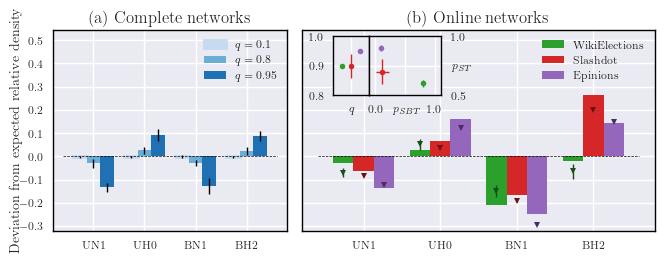

In [201]:
"""Part 1
"""


width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1])
fig, axes_grid = plt.subplots(1, 2, figsize=figsize, sharey=True, gridspec_kw={'width_ratios': [2,3]})

axes = axes_grid.flatten()

# Simulated nets
cmpl_colors = sns.color_palette("Blues", 3).as_hex()

ydata, yerr = prepare_data3(mean_data.transpose(), all_sets, all_triads, std_data.transpose(), "", "", "", fun_prepare_data)
# triads_set = n1_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")
# triads_set = n2_triads
# ydata1, yerr1 = fun_prepare_data(mean_data.transpose(),  triads_set, 
#                                std_data = std_data.transpose(), addon = "")

if not show_error:
    yerr = None

# reordering
qs = ydata.columns.values
inds = qs.argsort()
qs = qs[inds]
ydata = ydata[qs]
if yerr is not None:
    yerr = yerr[qs]

cmpl_labels = [r'$q={q}$'.format(q=round(q,2)) for q in qs]

title = r'(a) Complete networks'
plot_bar_nets(axes[cmpl_pos], ydata, yerr, all_triads, title, 
              labels = cmpl_labels, line_level = line_level, 
              linewidth = linewidth, colors=cmpl_colors, 
              smallest_edge = True, legend_elem = 1,
              total_width=plot_param_total_width, single_width=plot_param_single_width)

axes[cmpl_pos].legend(loc='best')


############# Wiki, Epinions, Slashdot

large_colors = sns.color_palette("tab10").as_hex()[2:5]

large_data = pd.concat([wiki, slash, epinions])
ydata, yerr = prepare_data3(large_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

large_labels = [r"WikiElections", r"Slashdot", r"Epinions"]

# fitting
# df2_wrho_correct_g
sim_large_data = pd.concat([df2_wrho_correct_g.iloc[[inds_wiki[0]]], df2_srho_correct_g.iloc[inds_slash], df2_erho_correct_g.iloc[inds_epinions]], join = "inner")
sim_ydata, sim_yerr = prepare_data3(sim_large_data, all_sets, all_triads, sim_large_data, addon = addon, std_addon = "_std3", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns


plot_bar_nets(axes[large_pos], ydata, None, all_triads, r"(b) Online networks", labels = large_labels, 
              line_level = line_level, colors=large_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

if not large_inset:
    axes[large_pos].legend(loc='upper left')
    # lower right

    axes[large_pos].text(x = 1.2, y = 0.42, s = param_labels[0], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.36, s = param_labels[1], fontsize = 'small')
    axes[large_pos].text(x = 1.2, y = 0.3, s = param_labels[2], fontsize = 'small')
else:
    axes[large_pos].legend(loc='upper right')

    df_bests = [wiki_high_bests, slash_high_bests, epi_high_bests]

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.41, 0.645, 0.03, 0.2]
    if len(axes) == 4:
        high_ins_left = 0.30
    elif len(axes) == 2:
        high_ins_left = 0.52
        high_ins_width = 0.05
    
    ax21 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax21, df_bests, cols, large_colors)
    ax21.set_yticks([0.8, 0.9, 1.])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = high_ins_width * 2
    # if len(axes) == 2:
    #     high_ins_width = 0.09

    ax22 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax22, df_bests, cols, large_colors, 2, False)
    else:
        for j, net in enumerate(df_bests):
            ax22.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = large_colors[j])
            ax22.set_xticks([0, 0.5, 1])
            ax22.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax22.set_xlim([-0.1,1.1])
            ax22.set_ylim([0.5,1])
            ax22.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax22.yaxis.tick_right()
            # ax22.set_ylabel(r'$p_{ST}$')
            # ax22.yaxis.set_label_position("right")

if axes[large_pos].get_ylim()[1] < 0.5:
    ylims = axes[large_pos].get_ylim()
    axes[large_pos].set_ylim([ylims[0], ylims[1] + 0.25])


# fix tick labels
axes_bars = [axes[cmpl_pos], axes[large_pos]]
for ax in axes_bars:
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])

for i, ax in enumerate(axes_bars):
    # if i != 0: 
    ax.set_ylabel("")
    
# ticks = axes[i].get_yticklabels()
# ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal" and fun_prepare_data == prepare_data5:
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[0].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[0].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_4p_2r_v1_r1'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if not show_error:
    fname = fname + "_noterr"
# if show_rho:
#     fname = fname + "_rho"
if all_triads_flag:
    fname = fname + "_all" 
if fun_prepare_data == prepare_data4:
    fname += "_nodev"
    
if large_inset and high_inset:
    fname += "_b"
elif not large_inset:
    fname += "_h"
if psbt_vs_pst:
    fname += "_vs"
    
if high_schools_choice == schools_t11_2:
    fname += "_t11_2"
elif high_schools_choice == schools_t11_9:
    fname += "_t11_9"
elif high_schools_choice == best_high_schools:
    fname += "_best"
elif high_schools_choice == chosen_high_schools:
    fname += "_chosen"
elif high_schools_choice == chosen_high_schools12:
    fname += "_chosen12"
elif high_schools_choice == chosen_high_schools13:
    fname += "_chosen13"
elif high_schools_choice == chosen_high_schools14:
    fname += "_chosen14"
elif high_schools_choice == chosen_high_schools2:
    fname += "_chosen2"
elif high_schools_choice == chosen_high_schools32:
    fname += "_chosen32"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

/tmp/ipykernel_67773/985664097.py:100: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  [ax1.get_shared_y_axes().remove(axis) for axis in axes.ravel()]
/tmp/ipykernel_67773/985664097.py:221: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


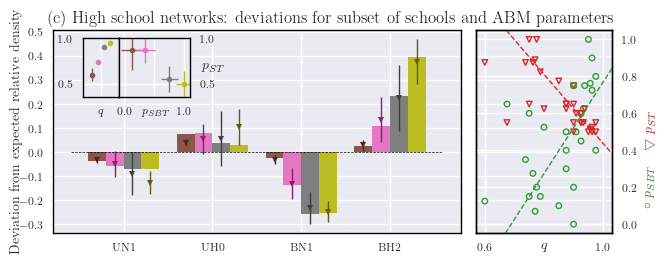

In [202]:
"""Part 2
"""

# width = 345
# figsize = set_size(width)
# figsize = (figsize[0] * 2.4 , figsize[1] * 1.1)
fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True, gridspec_kw={'width_ratios': [3,1]})
# fig, axes = plt.subplots(1, 4, figsize=figsize, gridspec_kw={'width_ratios': [2,3,3,2]})

high_pos = 0
psbt_pst_pos = 1

############# Spanish

high_colors = sns.color_palette("tab10").as_hex()[5:10]

high_data = pd.concat(real_datasets_all).loc[high_schools_choice]
ydata, yerr = prepare_data3(high_data, all_sets, all_triads, None, "", "", "", fun_prepare_data)

high_labels = [r"A", r"B", r"C", r"D"]

# fitting
# df2_wrho_correct_g
# sim_high_data = pd.concat(df2_high_bests.loc[high_schools_choice], join = "inner")
sim_high_data = df2_high_bests.loc[high_schools_choice]
sim_ydata, sim_yerr = prepare_data3(sim_high_data, all_sets, all_triads, sim_high_data, addon = "", err_addon = "", norm_fun = fun_prepare_data)

param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[1],3):.3f}',p=f'{round(col[2],2):.2f}',ps=f'{round(col[3],2):.2f}') for col in sim_ydata.columns]
# param_labels = [r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=f'{round(col[0],3):.3f}',p=round(col[1],2),ps=round(col[2],2)) for col in sim_ydata.columns]

labels = [hl + ": " + pl for hl, pl in zip(high_labels,param_labels)]

sim_ydata.columns = ydata.columns
sim_yerr.columns = ydata.columns

plot_bar_nets(axes[high_pos], ydata, None, all_triads, r'(c) High school networks: deviations of chosen schools and ABM parameters', labels = labels, 
              line_level = line_level, colors=high_colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,
              marker_data=sim_ydata, marker_errdata=sim_yerr)

if axes[high_pos].get_ylim()[1] < 0.5:
    ylims = axes[high_pos].get_ylim()
    axes[high_pos].set_ylim([ylims[0], ylims[1] + 0.1])

if not high_inset:
    axes[high_pos].legend(loc='upper left')
    # lower right
else:
    # axes[high_pos].legend(loc='upper right')

    high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = [0.718, 0.645, 0.05, 0.2]
    if len(axes) == 4:
        high_ins_left = 0.59
    elif len(axes) == 2:
        high_ins_left = 0.17
    ax31 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    cols = ['q']
    fill_axis(ax31, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors)

    ax31.set_ylim([0.5, 1.])

    high_ins_left = high_ins_left + high_ins_width
    high_ins_width = high_ins_width * 2

    ax32 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])

    if not psbt_vs_pst:
        cols = ['p', 'ps']
        fill_axis(ax32, [pd.DataFrame(row).transpose() for ind, row in sim_high_data.iterrows()], cols, high_colors, 2, False)
    else:
        for j, (ind, net) in enumerate(sim_high_data.iterrows()):
            ax32.errorbar(net.p, net.ps, yerr = net.ps_std, xerr = net.p_std, marker = 'o',color = high_colors[j])
            ax32.set_xticks([0, 0.5, 1])
            ax32.set_xticklabels([r'$0.0$',r'$p_{SBT}$', '1.0'])
            ax32.set_xlim([-0.1,1.1])
            ax32.set_ylim([0.35,1])
            ax31.set_ylim([0.35,1])
            # ax32.set_yticklabels([r'$0.5$',r'$p_{ST}$', '1.0'])
            ax32.yaxis.tick_right()
            ax32.set_ylabel(r'$p_{ST}$', rotation=0)
            ax32.yaxis.set_label_position("right")
            ax32.yaxis.set_label_coords(1.3,0.65)


################### q vs psbt,pst ###############
diff_axes = True

bbox = axes[psbt_pst_pos].get_position()
# begs = bbox[0]
# ends = bbox[1]
# high_ins_left, high_ins_bottom = begs
# high_ins_width = ends[0] - high_ins_left
# high_ins_height = ends[1] - high_ins_bottom

high_ins_left, high_ins_bottom, high_ins_width, high_ins_height = bbox.bounds
# ax1 = fig.add_axes([high_ins_left, high_ins_bottom, high_ins_width, high_ins_height])
ax1 = axes[psbt_pst_pos]
[ax1.get_shared_y_axes().remove(axis) for axis in axes.ravel()]

# ax1 = fig.add_subplot(155, position = [0.8, 0.11, 0.2, 0.77])
if diff_axes:
    ax2 = ax1.twinx()
else:
    ax2 = ax1

cols = ['p', 'ps']
cols_std = [col + "_std" for col in cols]

# for j, (ind, net) in enumerate(df2_high_bests.loc[good_inds].iterrows()):
for j, (ind, net) in enumerate(df2_high_bests.iterrows()):

    ax2.scatter(net.q, net.p, marker = 'o',edgecolor = large_colors[0], facecolor = 'none', linestyle = '',)
    ax2.scatter(net.q, net.ps,  marker = 'v',color = large_colors[1], facecolor = 'none', linestyle = '',)


# ax2.scatter(df2_high_bests.loc[good_inds].q, df2_high_bests.loc[good_inds].p, marker = 'o',
#             edgecolor = large_colors[0], facecolor = 'none', linestyle = '', label = r'$p_{SBT}$')
# ax2.scatter(df2_high_bests.loc[good_inds].q, df2_high_bests.loc[good_inds].ps,  marker = 'v',
#             color = large_colors[1], facecolor = 'none', linestyle = '', label = r'$p_{ST}$')
    
ylims = ax2.get_ylim()

b, m = results_sbt.params
ax2.axline(xy1=(0, b), slope=m, label=None, color = large_colors[0], linestyle = '--')


b, m = results_st.params
ax2.axline(xy1=(0, b), slope=m, label=None, color = large_colors[1], linestyle = '--')

ax2.set_ylim(ylims)


# ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0.57, 1.03])
ax1.set_xticks([0.6, 1.])

ax1.set_xlabel(r'$q$', labelpad = -10)
# axes[1].set_xlabel(r'$q$')
# ax1.set_ylabel(r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75))
ax2.set_ylabel(r'${\bigtriangledown}~p_{ST}$', color = scale_lightness(large_colors[1], 0.75))
pst_pos = ax2.yaxis.get_label().get_position()
# ax2.text(pst_pos[0], pst_pos[1], r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75), rotation = 90)

ax2.text(1.13,0.1, r'${\circ}~p_{SBT}$', color = scale_lightness(large_colors[0], 0.75), rotation = 90)

# ax2.legend(ncol = 2, bbox_to_anchor=(1.1, 1.05), rotation = 90)



# fix tick labels
axes_bars = [ axes[high_pos]]
for ax in axes_bars:
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])

for i, ax in enumerate(axes_bars):
    # if i != 0: 
    ax.set_ylabel("")
    
# ticks = axes[i].get_yticklabels()
# ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal" and fun_prepare_data == prepare_data5:
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[0].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[0].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel(r"Deviation from expected relative density")
axes[high_pos].set_title("")
plt.title(r'(c) High school networks: deviations for subset of schools and ABM parameters')

save_fig_path = Path("figs")
fname = 'barplots_2r_4p_v1_r2'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if not show_error:
    fname = fname + "_noterr"
# if show_rho:
#     fname = fname + "_rho"
if all_triads_flag:
    fname = fname + "_all" 
if fun_prepare_data == prepare_data4:
    fname += "_nodev"
    
if large_inset and high_inset:
    fname += "_b"
elif not large_inset:
    fname += "_h"
if psbt_vs_pst:
    fname += "_vs"
    
if high_schools_choice == schools_t11_2:
    fname += "_t11_2"
elif high_schools_choice == schools_t11_9:
    fname += "_t11_9"
elif high_schools_choice == best_high_schools:
    fname += "_best"
elif high_schools_choice == chosen_high_schools:
    fname += "_chosen"
elif high_schools_choice == chosen_high_schools12:
    fname += "_chosen12"
elif high_schools_choice == chosen_high_schools13:
    fname += "_chosen13"
elif high_schools_choice == chosen_high_schools14:
    fname += "_chosen14"
elif high_schools_choice == chosen_high_schools2:
    fname += "_chosen2"
elif high_schools_choice == chosen_high_schools32:
    fname += "_chosen32"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

In [75]:
q = 0.95
# q=0.15
ps = 0.55
pb = 0.1833910034602075
rho = 0.85

plus,minus = pi_plus_minus(pb, ps, q, rho = rho)

# assert(abs(plus - minus) < 1e-5)
print(plus-minus, plus)

# q=0.95
row = df2_g.loc[(q,pb,ps)]

BN1 = row[triad_names_map['BN1'] + '_lvl']
UN1 = row[triad_names_map['UN1'] + '_lvl']
UH0 = row[triad_names_map['UH0'] + '_lvl']
UH1 = row[triad_names_map['UH1'] + '_lvl']
UH2 = row[triad_names_map['UH2'] + '_lvl']

# q=0.15
plus,minus = pi_plus_minus(pb, ps, q, BN1 = BN1, UN1=UN1, UH0=UH0, UH1=UH1, UH2=UH2)

# assert(abs(plus - minus) < 1e-5)
plus-minus, plus

0.0 0.068775


(0.00011295027692963255, 0.07286826851545948)

In [ ]:
301,603

In [80]:
df2.iloc[[301]]

,index,q,p,ps,rho_init,steps,rho,bp,tr0,tr1,...,tr5_qs_b,tr5_qs_f,tr6_qs_m,tr6_qs_s,tr6_qs_b,tr6_qs_f,tr7_qs_m,tr7_qs_s,tr7_qs_b,tr7_qs_f
301,0,0.95,0.183391,0.55,0.85,4000,"[0.8366935483870968, 0.8205645161290323, 0.819...",279.0,"[0.004737903225806452, 0.00625, 0.006989247311...","[0.021740591397849462, 0.02896505376344086, 0....",...,2001.0,3999.0,0.167669,0.007611,2004.0,3971.0,0.302656,0.073614,2000.0,3971.0


In [127]:
row.p.values

array([0.72260669])

In [198]:
row = df2.iloc[[512]]
pb = row.p.values[0]
ps = row.ps.values[0]
q = row.q.values[0]

s = row.steps.values[0]

pluss = np.zeros(s)
minuss = np.zeros(s)

for i in range(s):
    BN1 = row[triad_names_map['BN1']].values[0][i]
    UN1 = row[triad_names_map['UN1']].values[0][i]
    UH0 = row[triad_names_map['UH0']].values[0][i]
    UH1 = row[triad_names_map['UH1']].values[0][i]
    UH2 = row[triad_names_map['UH2']].values[0][i]
    # print(UH2)
    # break
    
    try:
        pluss[i], minuss[i] = pi_plus_minus(pb, ps, q, BN1 = BN1, UN1=UN1, UH0=UH0, UH1=UH1, UH2=UH2)
    except ValueError:
        print(i)
        break

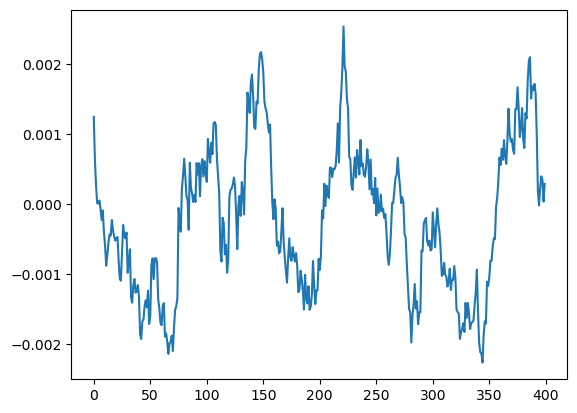

In [199]:
plt.plot(minuss - pluss)

In [130]:
beg = 200
np.mean(-pluss[beg:] + minuss[beg:])

0.0016557634083045026

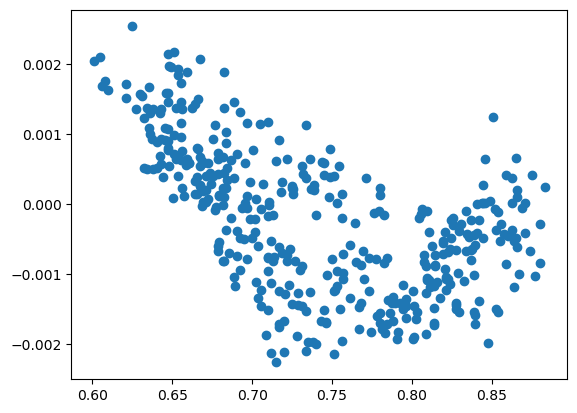

In [200]:
rho = row.rho.values[0]
# rho
# row.rho.values[0]
plt.scatter(rho, minuss - pluss)

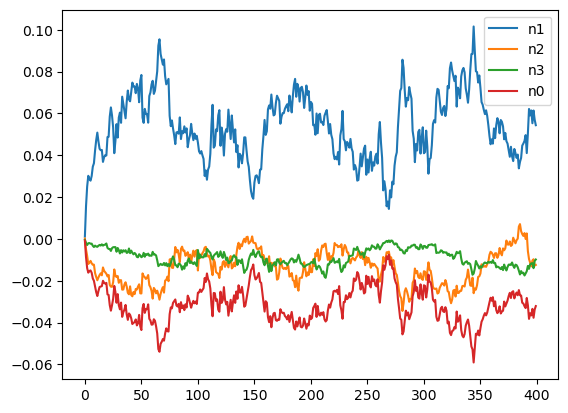

In [201]:
n1_rho = 3*rho**2*(1-rho) 
n2_rho = 3*rho*(1-rho)**2
n3_rho = (1-rho)**3 
n0_rho = rho**3

n2_true = row[triad_names_map['BN1']].values[0] + row[triad_names_map['BH1']].values[0] + row[triad_names_map['BH2']].values[0]
n1_true = row[triad_names_map['UN1']].values[0] + row[triad_names_map['UH1']].values[0] + row[triad_names_map['UH0']].values[0]
n3_true = row[triad_names_map['UH2']].values[0]
n0_true = row[triad_names_map['BH0']].values[0]

plt.plot(n1_rho - n1_true)
plt.plot(n2_rho - n2_true)
plt.plot(n3_rho - n3_true)
plt.plot(n0_rho - n0_true)

plt.legend(['n1', 'n2', 'n3', 'n0'])

/tmp/ipykernel_76370/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

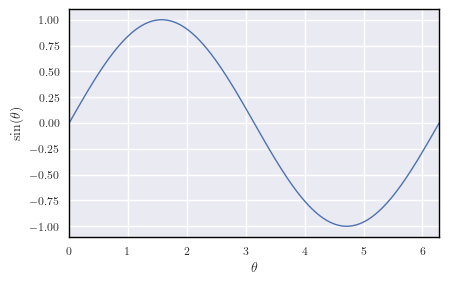

In [129]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



In [130]:
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])
figsize = (figsize[0] * 1.7, figsize[1] * 1.7)
# figsize = 

In [ ]:
"""Four triads
"""


save_ = True
fun_prepare_data = prepare_data2
linewidth = None
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'

reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

sim_data = mean_data.copy()
sim_data_std = std_data.copy()
real_data = results_realnet.copy()
if reverse:
    order = results_realnet.columns.tolist()
    order.reverse()
    real_data = results_realnet[order]
    
    order = mean_data.columns.tolist()
    order.reverse()
    sim_data = sim_data[order]
    std_data_std = std_data[order]

triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0] , figsize[1])
# figsize = 

if fun_prepare_data == prepare_data2:
    line_level = 0
else:
    line_level = 1/3


sim_pos = 0
real_pos = 1
if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)


# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:8]
sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
print(sim_labels)
# plot_bar_simulatednets(ax=axes[sim_pos, 0], triads_set=n1_triads, title='n1', labels=sim_labels, colors=colors)
triads_set = triads
ydata, yerr = prepare_data3(sim_data, all_sets, triads_set, std_data = sim_data_std)
print(ydata)
title = r'$\Delta_1$'
plot_bar_nets(axes[sim_pos], ydata, yerr, triads_set, None, labels = sim_labels, line_level = line_level, linewidth = linewidth, colors=colors[0:3][::-1], width = 0.2, smallest_edge = True)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
# triads_set = n2_triads
# ydata, yerr = fun_prepare_data(mean_data, triads_set, std_data = std_data)
# title = r'$\Delta_2$'

# plot_bar_nets(axes[sim_pos, 1], ydata, yerr, triads_set, title, labels = sim_labels, line_level = line_level, colors=colors, linewidth = linewidth)

# Realnets
triads_set = triads
ydata, _ = prepare_data3(real_data, all_sets, triads_set)

plot_bar_nets(axes[real_pos], ydata, None, triads_set, None, labels = None, line_level = line_level, colors=colors[3:], linewidth = linewidth, width = 0.2)
# plot_bar_realnets(ax=axes[real_pos, 1], triads_set=n2_triads, title='')
# triads_set = n2_triads

# ydata, _ = fun_prepare_data(results_realnet, triads_set)

# plot_bar_nets(axes[real_pos, 1], ydata, None, triads_set, None, labels = None, line_level = line_level, colors=colors, linewidth = linewidth)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in (sim_pos, real_pos):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    axes[i].legend(loc='upper left')
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_sim_real'
fname = fname + "_down"
fname = fname + "_down_nx"
fname = fname + "_v2"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

if reverse is True:
    fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, format='pdf', bbox_inches='tight') 

### Time series of specific triad densities

In [ ]:

outputs_dir_triads_wiki2 = Path("../../outputs/LtdReal/outputs/wiki2-s400-triads")
outputs_dir_triads_wiki2_1000 = Path("../../outputs/LtdReal/outputs/wiki2-s1000-triads")

In [54]:
# df, rho_inits = process_folder(outputs_dir_test)
df_w2 = process_folder(outputs_dir_triads_wiki2, no_triad_stats=False)
# df.head(3)
df_w2_1000 = process_folder(outputs_dir_triads_wiki2_1000, no_triad_stats=False)
# df.head(3)
df_w2

,index,q,p,ps,rho_init,steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0,0.8,1.0,1.0,0.794729,400,"[0.7905982007734993, 0.8482428115015974, 0.873...","[0.008964818904505015, 0.0041653903414844255, ...","[0.03393442118597251, 0.0231517585197214, 0.01...","[0.03433437356622422, 0.019660535401136187, 0....","[0.12985209787730959, 0.11106236180575156, 0.0...","[0.03431297143216393, 0.021628194101304326, 0....","[0.12943341862975513, 0.11174187956216584, 0.0...","[0.13076971437514462, 0.1045574506848014, 0.08...","[0.495107605917155, 0.6007418514718649, 0.6631...","[75227.0, 80712.0, 83113.0, 84673.0, 85902.0, ..."
1,1,0.8,1.0,1.0,0.794729,400,"[0.7962418025895409, 0.853371447788801, 0.8789...","[0.008188991544819413, 0.0036223111897045034, ...","[0.032602138340719296, 0.02187298100961892, 0....","[0.03272386297818721, 0.018075439847295774, 0....","[0.12632342102411886, 0.1076741364573315, 0.09...","[0.03322948839536162, 0.020282534922263437, 0....","[0.12943743152989143, 0.11000295616976707, 0.0...","[0.1288783007775663, 0.10135916927616645, 0.08...","[0.5053257872975659, 0.6138198930160824, 0.675...","[75764.0, 81200.0, 83631.0, 85276.0, 86389.0, ..."
2,0,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8318164620817219, 0.851...","[0.012419925921863483, 0.0069623817364888995, ...","[0.02741479609785591, 0.020056474881251597, 0....","[0.01068902832973733, 0.007189779410879507, 0....","[0.07192053387623414, 0.0634921059566152, 0.05...","[0.04946166944671471, 0.03921941066548598, 0.0...","[0.0648712059701253, 0.05916084907616351, 0.05...","[0.07746903713136497, 0.06540893458839014, 0.0...","[0.6824632251143342, 0.7352194855729552, 0.771...","[75446.0, 79149.0, 80981.0, 82270.0, 83252.0, ..."
3,1,0.8,1.0,1.0,-0.500000,400,"[0.7929102909029763, 0.8312384395493526, 0.850...","[0.01241591302172718, 0.007276725580499446, 0....","[0.02741345846447714, 0.01987589437511788, 0.0...","[0.010690365963116098, 0.007045315005972533, 0...","[0.0719218715096129, 0.06312291914407515, 0.05...","[0.04946300708009348, 0.03939731590486217, 0.0...","[0.0648712059701253, 0.05971329166159481, 0.05...","[0.07747037476474374, 0.06528453468416469, 0.0...","[0.6824632251143342, 0.7349934255319434, 0.767...","[75447.0, 79094.0, 80888.0, 82113.0, 83105.0, ..."
4,2,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8314486295611233, 0.850...","[0.012419925921863483, 0.007098820341123265, 0...","[0.02741479609785591, 0.0199467889441926, 0.01...","[0.01068902832973733, 0.007183091243985666, 0....","[0.07192053387623414, 0.061977904971849504, 0....","[0.04946166944671471, 0.038729836848856794, 0....","[0.0648712059701253, 0.059132758775209376, 0.0...","[0.07746903713136497, 0.06457291372665996, 0.0...","[0.6824632251143342, 0.7380673070363528, 0.774...","[75446.0, 79114.0, 80956.0, 82249.0, 83252.0, ..."
5,3,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8307550025222802, 0.850...","[0.012419925921863483, 0.007375710450528298, 0...","[0.02741479609785591, 0.02028788545577851, 0.0...","[0.01068902832973733, 0.007045315005972533, 0....","[0.07192053387623414, 0.06359109082664405, 0.0...","[0.04946166944671471, 0.03900538932488306, 0.0...","[0.0648712059701253, 0.06028312348095009, 0.05...","[0.07746903713136497, 0.0657607321670062, 0.05...","[0.6824632251143342, 0.7333601751764672, 0.769...","[75446.0, 79048.0, 80937.0, 82295.0, 83321.0, ..."
6,4,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8313330250546495, 0.851...","[0.012419925921863483, 0.0074305534190577975, ...","[0.02741479609785591, 0.02013138235046262, 0.0...","[0.01068902832973733, 0.007181753610606897, 0....","[0.07192053387623414, 0.06326069538208828, 0.0...","[0.04946166944671471, 0.03866964334681222, 0.0...","[0.0648712059701253, 0.059535386422218624, 0.0...","[0.07746903713136497, 0.06499961877448705, 0.0...","[0.6824632251143342, 0.7355003885824966, 0.769...","[75446.0, 79103.0, 81003.0, 82313.0, 83292.0, ..."
7,5,0.8,1.0,1.0,-0.500000,400,"[0.7928997814023877, 0.8319530855893728, 0.852..."

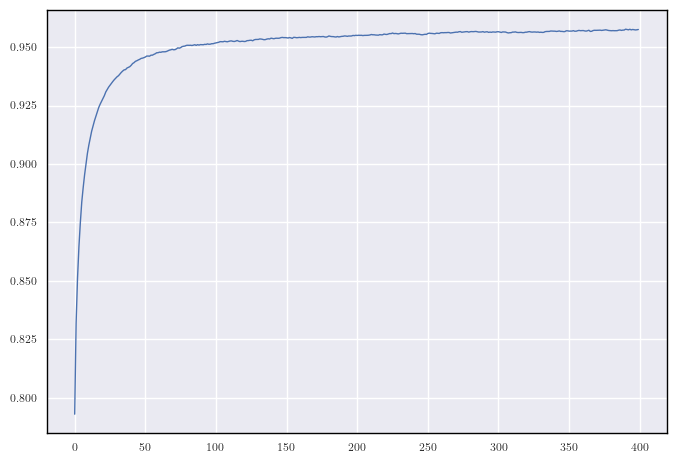

In [39]:
df_one = df_w2.iloc[0].rho
df_one
plt.plot(df_one)

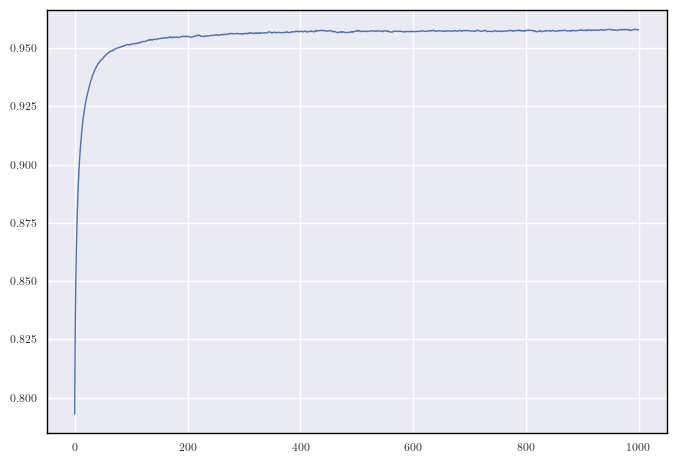

In [41]:
df_one = df_w2_1000.iloc[0].rho
df_one
plt.plot(df_one)

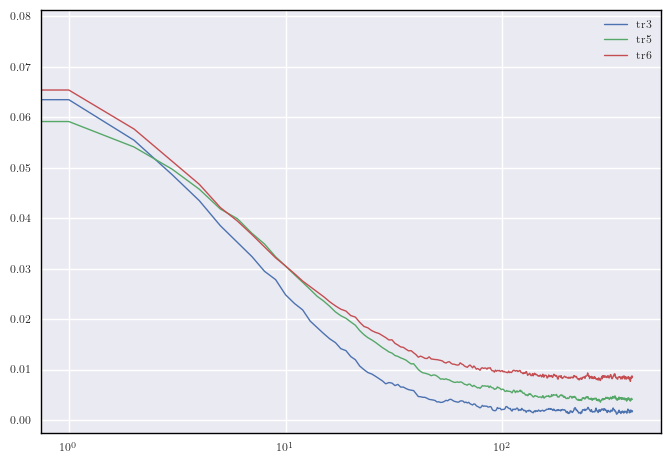

In [46]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in n1_triads:
    plt.plot(df_w2.iloc[0][triad])
    
plt.legend(n1_triads)
plt.xscale('log')

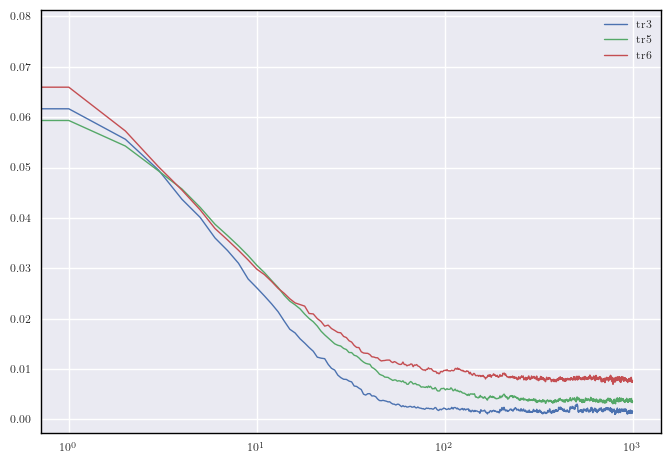

In [48]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in n1_triads:
    plt.plot(df_w2_1000.iloc[0][triad])
    
plt.legend(n1_triads)
plt.xscale('log')

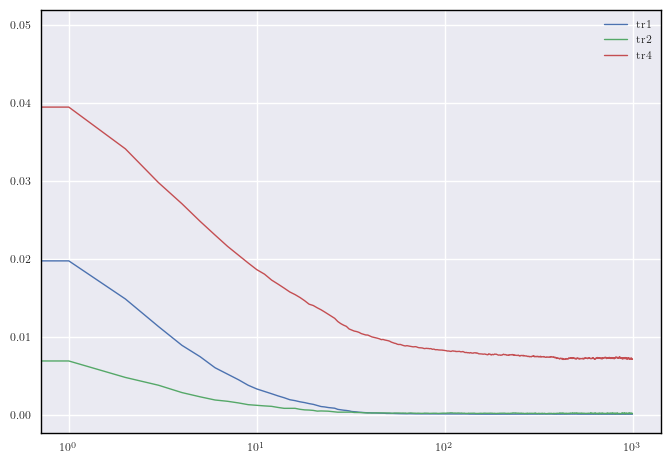

In [51]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in n2_triads:
    plt.plot(df_w2_1000.iloc[0][triad])
    
plt.legend(n2_triads)
plt.xscale('log')

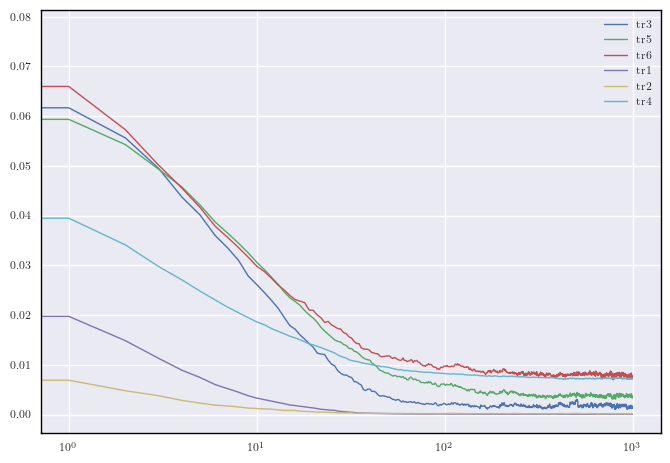

In [55]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in deg_triads:
    plt.plot(df_w2_1000.iloc[0][triad])
    
plt.legend(deg_triads)
plt.xscale('log')

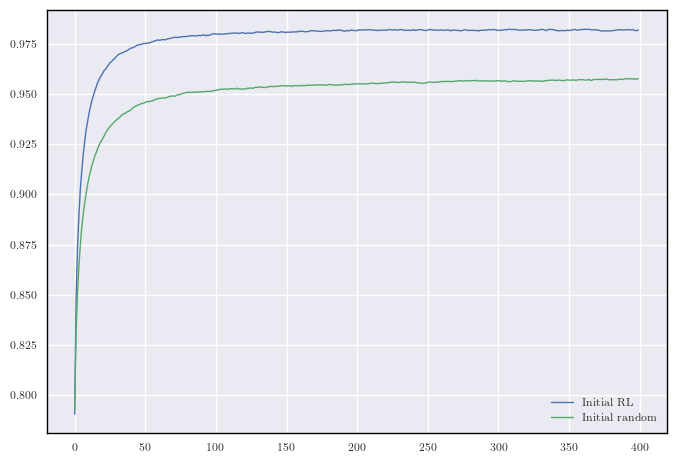

In [63]:
inds = np.where(df_w2.rho_init > 0)[0]
inds2 = np.where(df_w2.rho_init < 0)[0]

df_one = df_w2.loc[inds[0]].rho
df_one
plt.plot(df_one)
plt.plot(df_w2.loc[inds2[0]].rho)

plt.legend(["Initial RL", "Initial random"])

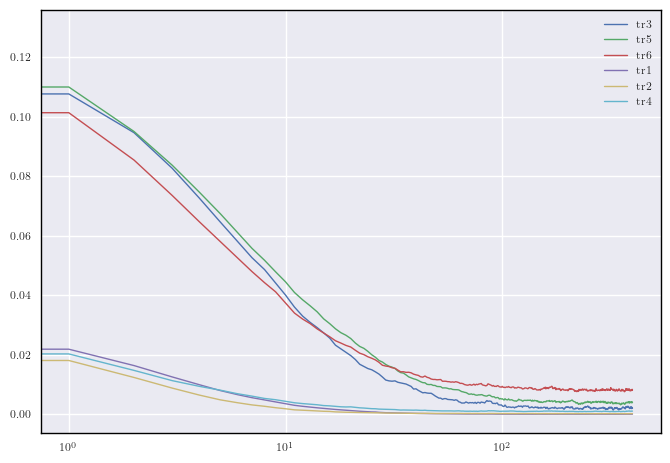

In [70]:
inds = np.where(df_w2.rho_init > 0)[0]
inds2 = np.where(df_w2.rho_init < 0)[0]

for triad in deg_triads:
    plt.plot(df_w2.loc[inds[1]][triad])
    
plt.legend(deg_triads)
plt.xscale('log')

In [51]:
wiki

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,rho
0,0.012999,0.027805,0.010694,0.071937,0.049472,0.064931,0.078229,0.683932,0.794729


In [53]:
wiki_trans

,tr1,tr2,tr3,tr4,tr5,tr6,rho
0,-0.017263,-0.211768,0.001105,0.229031,-0.031463,0.030358,0.794729


# Checking strange result of transformed error functions. 

Eg when q=0 or q=1

In [89]:
df2_w1000_g.columns

Index(['q', 'p', 'ps', 'repetitions', 'rho_lvl', 'rho_lvl_std',
       'rho_lvl_valid', 'rho_lvl2', 'rho_lvl2_std', 'rho_lvl2_valid',
       'rho_lvl_exp', 'tr_valid', 'tr0_lvl', 'tr0_lvl_std', 'tr1_lvl',
       'tr1_lvl_std', 'tr2_lvl', 'tr2_lvl_std', 'tr3_lvl', 'tr3_lvl_std',
       'tr4_lvl', 'tr4_lvl_std', 'tr5_lvl', 'tr5_lvl_std', 'tr6_lvl',
       'tr6_lvl_std', 'tr7_lvl', 'tr7_lvl_std', 'rho', 'tr0', 'tr1', 'tr2',
       'tr3', 'tr4', 'tr5', 'tr6', 'tr7', 'closest_to_rho',
       'closest_to_high_underrepresentation',
       'closest_to_high_underrepresentation_transformed',
       'closest_to_four_triads', 'closest_to_four_triads_transformed',
       'closest_to_six_triads', 'closest_to_six_triads_transformed',
       'closest_to_six_triads_corrdevs_transformed',
       'closest_to_four_triads_corrdevs_transformed',
       'closest_to_six_triads_rho', 'closest_to_six_triads_rho_transformed',
       'closest_to_four_triads_rho', 'closest_to_four_triads_rho_transformed'],
      d

In [94]:
triad_lbs = []
for triad in deg_triads:
    triad_lbs.append(triad + "_lvl")

df2_w1000_g.loc[(0., 1., 0.5)][triad_lbs]

tr3_lvl    0.006883
tr5_lvl    0.013687
tr6_lvl    0.015746
tr1_lvl    0.000160
tr2_lvl    0.001274
tr4_lvl    0.006462
Name: (0.0, 1.0, 0.5), dtype: float64

In [100]:
df2_w1000_g.loc[(0., 1., 0.5)][deg_triads]

tr3    0.006883
tr5    0.013687
tr6    0.015746
tr1    0.000160
tr2    0.001274
tr4    0.006462
Name: (0.0, 1.0, 0.5), dtype: float64

In [107]:
# a = transform_data(df2_w1000_g.loc[(0., 1., 0.5)], triads_groups=(n1_triads, n2_triads))
df2_w1000_g_trans.loc[(0., 1., 0.5)][deg_triads]

tr3    0.006883
tr5    0.013687
tr6    0.015746
tr1    0.000160
tr2    0.001274
tr4    0.006462
Name: (0.0, 1.0, 0.5), dtype: float64

In [136]:
i_l = np.where(df2_w1000_g_trans['rho_lvl'] != df2_w1000_g['rho_lvl'])[0]

df2_w1000_g_trans.iloc[i_l]

q    p    ps  repetitions  rho_lvl  rho_lvl_std  \
1.0 0.5 0.40  1.0  0.5  0.40            1      NaN          NaN   
        0.45  1.0  0.5  0.45            1      NaN          NaN   
        0.55  1.0  0.5  0.55            1      NaN          NaN   
        0.70  1.0  0.5  0.70            1      NaN          NaN   

              rho_lvl_valid  rho_lvl2  rho_lvl2_std  rho_lvl2_valid  ...  \
1.0 0.5 0.40              0       NaN           NaN               0  ...   
        0.45              0       NaN           NaN               0  ...   
        0.55              0       NaN           NaN               0  ...   
        0.70              0       NaN           NaN               0  ...   

              tr6_lvl_std   tr7_lvl  tr7_lvl_std  rho       tr1           tr2  \
1.0 0.5 0.40          0.0  0.004639          0.0  NaN  0.083326  8.699612e-03   
        0.45          0.0       NaN          NaN  NaN  0.169760  3.071301e-02   
        0.55          0.0  0.943591          0.0  NaN  0.005186  3.999308e-05   
        0.70          0.0  0.984968          0.0  NaN  0.000829  1.059513e-07   

                   tr3       tr4       tr5       tr6  
1.0 0.5 0.40       NaN  0.036481  0.000348  0.024119  
        0.45       NaN  0.136467  0.007304  0.097028  
        0.55  0.019391  0.000537  0.003382  0.020188  
        0.70  0.002794  0.000162  0.000093  0.011131  

[4 rows x 35 columns]

In [143]:
df_w1000_trans.columns, df_w1000.columns

(Index(['index', 'q', 'p', 'ps', 'rho_init', 'steps', 'cur_steps', 'rho', 'tr1',
        'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'Lplus'],
       dtype='object'),
 Index(['index', 'q', 'p', 'ps', 'rho_init', 'steps', 'cur_steps', 'rho', 'tr0',
        'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7', 'Lplus'],
       dtype='object'))

In [144]:
ch_cols = ['q', 'p', 'ps', 'repetitions', 'rho_lvl', 'rho_lvl_std',
        'rho_lvl_valid', 'rho_lvl2', 'rho_lvl2_std', 'rho_lvl2_valid',
        'rho_lvl_exp', 'tr_valid', 'tr0_lvl', 'tr0_lvl_std', 'tr1_lvl',
        'tr1_lvl_std', 'tr2_lvl', 'tr2_lvl_std', 'tr3_lvl', 'tr3_lvl_std',
        'tr4_lvl', 'tr4_lvl_std', 'tr5_lvl', 'tr5_lvl_std', 'tr6_lvl',
        'tr6_lvl_std', 'tr7_lvl', 'tr7_lvl_std', 'rho', 'tr1', 'tr2', 'tr3',
        'tr4', 'tr5', 'tr6']

ch_cols2 = [ 'q', 'p', 'ps', 'rho_init', 'steps', 'cur_steps', 'rho', 'tr1',
        'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'Lplus']

df2_w1000_g[ch_cols].equals(df2_w1000_g_trans[ch_cols]), df_w1000[ch_cols2].equals(df_w1000_trans[ch_cols2])

(True, False)

In [168]:
t_trans = transform_data(df2_w1000_g, triads_groups = (n1_triads, n2_triads))

df2_w1000_g[ch_cols].equals(t_trans[ch_cols])

# type(df2_w1000_g) == pd.DataFrame

# t_trans = df2_w1000_g.copy(deep=True)
# triads = n1_triads
# nn = transform_data(df2_w1000_g, triads)
# nn = nn.transpose()
# nn
# new_df = pd.DataFrame(nn, index = t_trans.index, columns=triads)
# new_df
# t_trans.update(new_df)

# df2_w1000_g[ch_cols].equals(t_trans[ch_cols])
# np.min(t_trans.tr3), np.min(new_df.tr3)

False

In [165]:
new_df.columns, t_trans.columns
new_df
t_trans.index

MultiIndex([( 0.0,  0.7,  0.5),
            ( 0.0, 0.75,  0.5),
            ( 0.0,  0.8,  0.5),
            ( 0.0,  0.9,  0.5),
            ( 0.0,  1.0,  0.5),
            ( 0.1,  0.7,  0.0),
            ( 0.1,  0.7,  0.1),
            ( 0.1,  0.7,  0.2),
            ( 0.1,  0.7,  0.3),
            ( 0.1,  0.7,  0.4),
            ...
            (0.95,  0.9, 0.45),
            (0.95,  1.0,  0.4),
            (0.95,  1.0, 0.45),
            ( 1.0,  0.5,  0.3),
            ( 1.0,  0.5,  0.4),
            ( 1.0,  0.5, 0.45),
            ( 1.0,  0.5,  0.5),
            ( 1.0,  0.5, 0.55),
            ( 1.0,  0.5,  0.6),
            ( 1.0,  0.5,  0.7)],
           length=615)

In [90]:
df2_w1000_g.loc[(0., 1., 0.5)][error_functions_names]

closest_to_rho                                     0.029148
closest_to_high_underrepresentation                0.000089
closest_to_high_underrepresentation_transformed    0.045173
closest_to_four_triads                             0.007320
closest_to_four_triads_transformed                 0.047704
closest_to_six_triads                              0.013444
closest_to_six_triads_transformed                  0.098376
closest_to_six_triads_corrdevs_transformed         1.047704
closest_to_four_triads_corrdevs_transformed        1.047704
closest_to_six_triads_rho                          0.159186
closest_to_six_triads_rho_transformed              0.156672
closest_to_four_triads_rho                         0.153062
closest_to_four_triads_rho_transformed             0.106000
Name: (0.0, 1.0, 0.5), dtype: float64

In [81]:
df2_w1000_g.loc[(0., 1., 0.5)]

q                                                  0.000000
p                                                  1.000000
ps                                                 0.500000
repetitions                                        1.000000
rho_lvl                                            0.965458
rho_lvl_std                                        0.000000
rho_lvl_valid                                      1.000000
rho_lvl2                                           0.965458
rho_lvl2_std                                       0.000000
rho_lvl2_valid                                     1.000000
rho_lvl_exp                                             NaN
tr_valid                                           1.000000
tr0_lvl                                            0.000076
tr0_lvl_std                                        0.000000
tr1_lvl                                            0.000160
tr1_lvl_std                                        0.000000
tr2_lvl                                 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbf4a1648b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbf4a1693a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbf4a164220>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf4a1697c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf4a169a60>],
 'means': []}

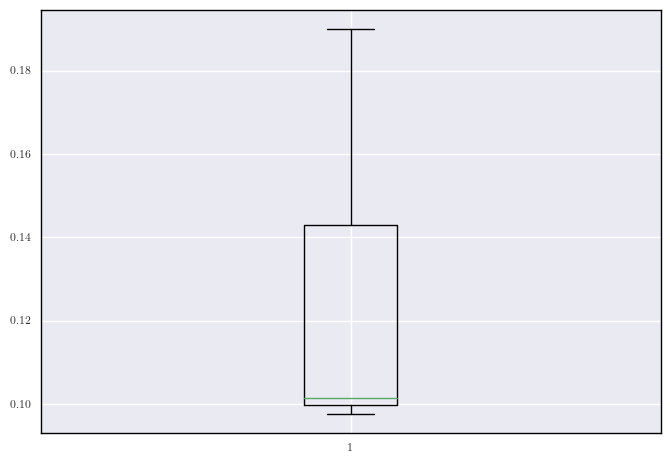

In [91]:
plt.boxplot(df2_w1000_g.closest_to_six_triads_transformed)